In [1098]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing  required libraries and the dataset

In [1099]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1100]:
path = "/content/drive/MyDrive/project data mining/LoanApprovalPrediction.csv"

In [1101]:
df = pd.read_csv(path)

In [1102]:
df.head(10)

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   
5  LP001011   Male     Yes         2.0      Graduate           Yes   
6  LP001013   Male     Yes         0.0  Not Graduate            No   
7  LP001014   Male     Yes         3.0      Graduate            No   
8  LP001018   Male     Yes         2.0      Graduate            No   
9  LP001020   Male     Yes         1.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

In [1103]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1104]:
df.shape

(598, 13)

Checking for missing values

In [1105]:
df.isnull()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
593    False   False    False       False      False          False   
594    False   False    False       False      False          False   
595    False   False    False       False      False          False   
596    False   False    False       False      False          False   
597    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False        True             False   
1              False              False       False             False   
2              False              False       False             False   
3              False              False       False             False   
4              False              False       False             False   
..               ...                ...         ...               ...   
593            False              False       False             False   
594            False              False       False             False   
595            False              False       False             False   
596            False              False       False             False   
597            False              False       False             False   

     Credit_History  Property_Area  Loan_Status  
0             False          False        False  
1             False          False        False  
2             False          False        False  
3             False          False        False  
4             False          False        False  
..              ...            ...          ...  
593           False          False        False  
594           False          False        False  
595           False          False        False  
596           False          False        False  
597           False          False        False  

[598 rows x 13 columns]

In [1106]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

Replacing empty cells with NaN

In [1107]:
df.replace(' ',np.NaN, inplace = True)

Printing all missing values

In [1108]:
missing_values = df[df.isnull().any(axis = 1)]
print(missing_values)

      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No         0.0      Graduate            No   
16   LP001034    Male      No         1.0  Not Graduate            No   
19   LP001041    Male     Yes         0.0      Graduate           Yes   
23   LP001052    Male     Yes         1.0      Graduate           Yes   
29   LP001091    Male     Yes         1.0      Graduate           Yes   
..        ...     ...     ...         ...           ...           ...   
558  LP002847    Male     Yes         NaN      Graduate            No   
569  LP002898    Male     Yes         1.0      Graduate            No   
581  LP002943    Male      No         NaN      Graduate            No   
584  LP002949  Female      No         3.0      Graduate           Yes   
589  LP002960    Male     Yes         0.0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         Na

In [1109]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

Fixing data types

All data types are marked correct so no need for typecasting

In [1110]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Handling missing values

In [1111]:
df["Dependents"].value_counts()

Dependents
0.0    338
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64

Replacing Missing values:

This column has only whole numbers but the mean is 0.755. It doesn't make sense replacing with mean so we replace it with most frequent value. The most frequent value is 0.

In [1112]:
mean_dependent = df['Dependents'].mean()
mean_dependent

0.7559726962457338

In [1113]:
df["Dependents"].value_counts().idxmax()

0.0

In [1114]:
df["Dependents"] = df["Dependents"].replace(np.NaN, 0)

In [1115]:
#df['Dependents'] = df['Dependents'].replace({0:'Zero', 1:'One',2:'Two',3:'ThreePlus'})

In [1116]:
df.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [1117]:
df["LoanAmount"].value_counts()

LoanAmount
120.0    20
110.0    16
100.0    15
187.0    12
128.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0     1
Name: count, Length: 199, dtype: int64

In [1118]:
mean_amount = df["LoanAmount"].mean()
mean_amount

144.9688041594454

In [1119]:
df["LoanAmount"] = df["LoanAmount"].replace(np.NaN,mean_amount)

In [1120]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [1121]:
mean_term = df["Loan_Amount_Term"].mean()
mean_term

341.9178082191781

In [1122]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    500
180.0     43
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

The mean value is 341.9 but the most of the loan term are multiples of 12 so replacing with mean value doesn't make sense. Replacing with most frequent number i.e., 360

In [1123]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].replace(np.NaN,360)

In [1124]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [1125]:
df["Credit_History"].value_counts()

Credit_History
1.0    463
0.0     86
Name: count, dtype: int64

In [1126]:
df["Credit_History"] =df["Credit_History"].replace(np.NaN,1)

In [1127]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1128]:
df.head(10)

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   
5  LP001011   Male     Yes         2.0      Graduate           Yes   
6  LP001013   Male     Yes         0.0  Not Graduate            No   
7  LP001014   Male     Yes         3.0      Graduate            No   
8  LP001018   Male     Yes         2.0      Graduate            No   
9  LP001020   Male     Yes         1.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  144.968804             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   
5             5417             4196.0  267.000000             360.0   
6             2333             1516.0   95.000000             360.0   
7             3036             2504.0  158.000000             360.0   
8             4006             1526.0  168.000000             360.0   
9            12841            10968.0  349.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

Drop Loan ID:

In [1129]:
df = df.drop(['Loan_ID'], axis = 1)

In [1130]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       598.000000         598.000000  598.000000        598.000000
mean       5292.252508        1631.499866  144.968804        342.341137
std        5807.265364        2953.315785   81.236564         64.494977
min         150.000000           0.000000    9.000000         12.000000
25%        2877.500000           0.000000  100.000000        360.000000
50%        3806.000000        1211.500000  128.000000        360.000000
75%        5746.000000        2324.000000  163.500000        360.000000
max       81000.000000       41667.000000  650.000000        480.000000

# Exploratory Data Analysis (EDA)

## **Distribution**

In [1131]:
from scipy import stats

In [1132]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount
count       598.000000         598.000000  598.000000
mean       5292.252508        1631.499866  144.968804
std        5807.265364        2953.315785   81.236564
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3806.000000        1211.500000  128.000000
75%        5746.000000        2324.000000  163.500000
max       81000.000000       41667.000000  650.000000

<ipython-input-1133-dd358a5a6987>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

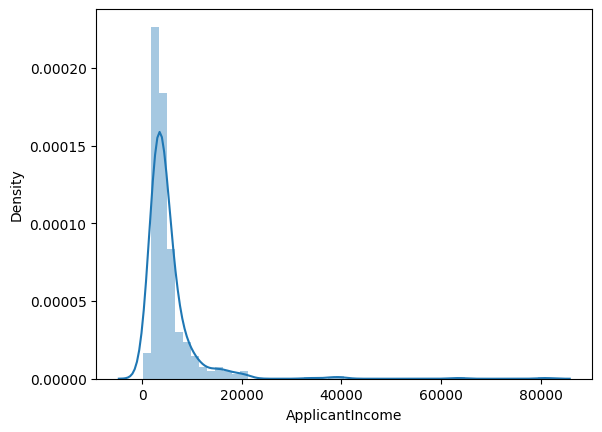

In [1133]:
sns.distplot(df['ApplicantIncome'])

In [1134]:
df['ApplicantIncome'].skew()

6.954133883235981

<ipython-input-1135-fa3d0fdb862e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

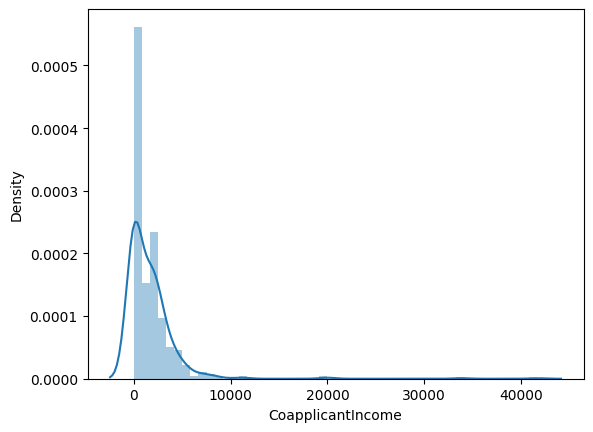

In [1135]:
sns.distplot(df['CoapplicantIncome'])

In [1136]:
df['CoapplicantIncome'].skew()

7.470981145517129

<ipython-input-1137-4fe14db8f0cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

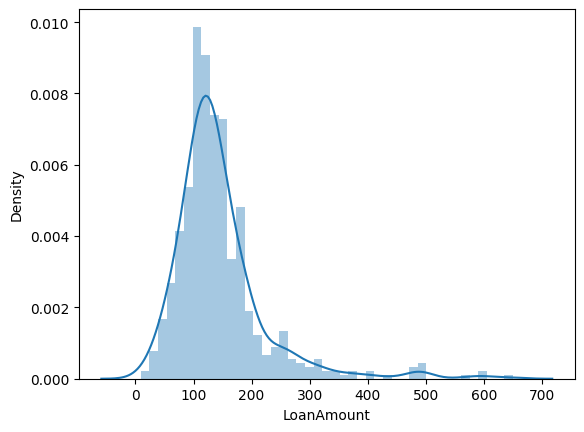

In [1137]:
sns.distplot(df['LoanAmount'])

In [1138]:
df['LoanAmount'].skew()

2.5775024406906804

In [1139]:
# from scipy.stats import shapiro

# stat, p = shapiro(df['LoanAmount'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
#     print('LoanAmount is Normally distributed (fail to reject H0)')
# else:
#     print(' LoanAmount is NOT Normally distributed(reject H0)')

## **Finding Outliers**

### Box-plot

<Axes: ylabel='ApplicantIncome'>

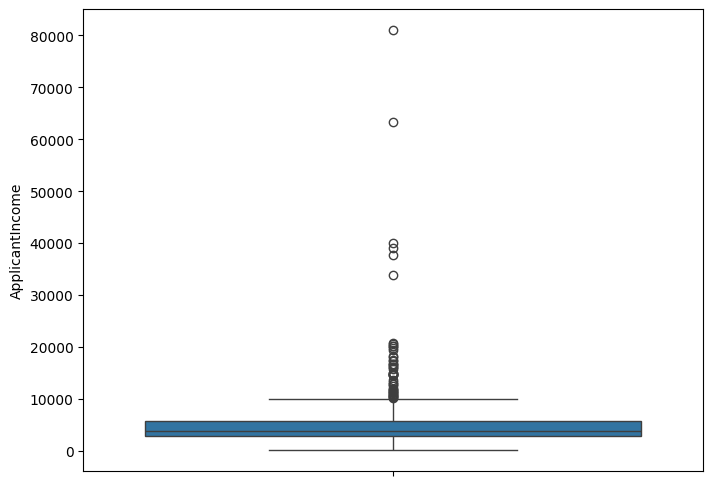

In [1140]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

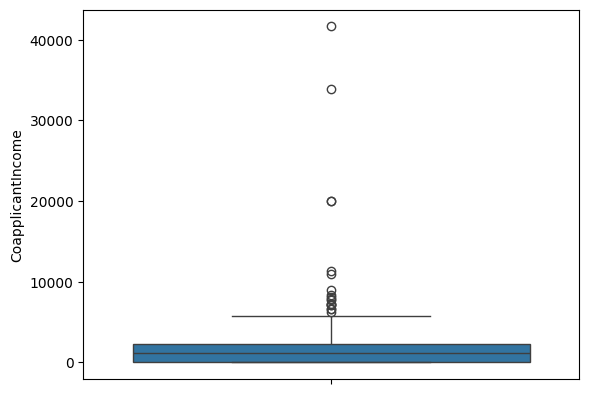

In [1141]:
sns.boxplot(df['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

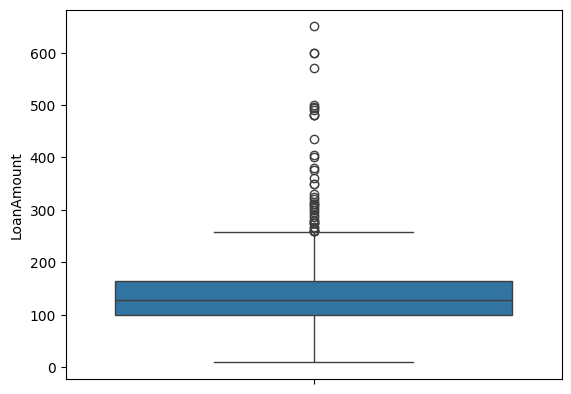

In [1142]:
sns.boxplot(df['LoanAmount'])

### Finding outliers and Calculating IQR: ApplicantIncome

In [1143]:
# Finding the IQR
percentile25 = df['ApplicantIncome'].quantile(0.25)
percentile75 = df['ApplicantIncome'].quantile(0.75)
#iqr = percentile75 - percentile25

In [1144]:
percentile75

5746.0

In [1145]:
percentile25

2877.5

In [1146]:
IQR = percentile75 - percentile25
IQR

2868.5

In [1147]:
upper = percentile75 + 1.5 * IQR
lower = percentile25 - 1.5 * IQR
print(upper)
print(lower)

10048.75
-1425.25


In [1148]:
 df[df['ApplicantIncome']> upper]

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
9      Male     Yes         1.0      Graduate            No            12841   
33     Male      No         3.0      Graduate            No            12500   
53   Female     Yes         1.0      Graduate           Yes            11500   
66     Male     Yes         1.0      Graduate            No            10750   
101    Male     Yes         0.0      Graduate            No            13650   
104    Male     Yes         2.0      Graduate            No            11417   
113    Male     Yes         1.0      Graduate            No            14583   
117  Female      No         0.0      Graduate            No            10408   
125    Male     Yes         1.0      Graduate           Yes            10513   
127    Male      No         0.0      Graduate           Yes            20166   
135    Male      No         0.0      Graduate            No            14999   
141    Male     Yes         2.0      Graduate            No            11757   
143  Female     Yes         2.0      Graduate            No            14866   
152    Male     Yes         3.0      Graduate            No            39999   
179    Male     Yes         1.0      Graduate            No            33846   
181    Male     Yes         0.0      Graduate           Yes            39147   
186    Male      No         0.0      Graduate            No            12000   
194    Male      No         0.0      Graduate           Yes            11000   
248    Male      No         0.0      Graduate           Yes            16250   
252    Male     Yes         0.0      Graduate            No            14683   
265    Male     Yes         0.0      Graduate            No            11146   
272    Male     Yes         0.0      Graduate            No            14583   
278    Male     Yes         0.0      Graduate            No            20667   
302    Male      No         0.0      Graduate            No            20233   
317    Male     Yes         3.0      Graduate            No            15000   
326    Male     Yes         0.0      Graduate           Yes            63337   
361    Male     Yes         0.0      Graduate            No            19730   
362  Female      No         0.0      Graduate           Yes            15759   
401    Male     Yes         3.0      Graduate            No            81000   
416    Male     Yes         0.0      Graduate            No            14880   
424    Male      No         0.0      Graduate           Yes            12876   
429    Male      No         0.0      Graduate           Yes            10416   
434    Male      No         1.0      Graduate            No            37719   
464    Male     Yes         2.0      Graduate           Yes            16525   
466    Male     Yes         1.0      Graduate           Yes            16667   
471    Male     Yes         0.0      Graduate            No            10833   
475    Male     Yes         1.0      Graduate            No            18333   
481  Female      No         0.0  Not Graduate           Yes            17263   
494    Male     Yes         0.0      Graduate            No            20833   
496  Female      No         1.0      Graduate            No            13262   
512    Male     Yes         2.0      Graduate           Yes            17500   
520    Male      No         1.0      Graduate            No            11250   
521  Female      No         0.0  Not Graduate           Yes            18165   
544    Male     Yes         3.0      Graduate           Yes            10139   
548  Female     Yes         1.0      Graduate           Yes            19484   
559    Male     Yes         2.0      Graduate            No            16666   
578    Male     Yes         0.0      Graduate           Yes            16120   
588  Female     Yes         1.0      Graduate            No            12000   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
9           

In [1149]:
print('Outliers in ApplicantIncome: ', df[df['ApplicantIncome']> upper].shape[0])

Outliers in ApplicantIncome:  48


In [1150]:
df[df['ApplicantIncome']< lower]

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

### **Finding outliers and Calculating IQR: CoapplicantIncome**

In [1151]:
percentile25_co = df['CoapplicantIncome'].quantile(0.25)
percentile75_co = df['CoapplicantIncome'].quantile(0.75)
IQR_co = percentile75_co - percentile25_co

In [1152]:
upper_co = percentile75_co + 1.5 * IQR_co
lower_co = percentile25_co - 1.5 * IQR_co
print(upper_co)
print(lower_co)

5810.0
-3486.0


In [1153]:
df[df['CoapplicantIncome']> upper_co]

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
9      Male     Yes         1.0      Graduate            No            12841   
12     Male     Yes         2.0      Graduate            No             3073   
37     Male      No         0.0      Graduate            No             4166   
120  Female      No         0.0      Graduate            No             2137   
132    Male     Yes         3.0      Graduate            No             4000   
173    Male     Yes         3.0      Graduate            No             5516   
176    Male     Yes         1.0      Graduate            No             6400   
247    Male     Yes         1.0  Not Graduate            No             2661   
341    Male     Yes         0.0      Graduate            No             2625   
364    Male     Yes         2.0      Graduate           Yes             9323   
394    Male      No         0.0      Graduate            No             2500   
409    Male     Yes         2.0      Graduate           Yes             1600   
435    Male     Yes         0.0      Graduate            No             7333   
494    Male     Yes         0.0      Graduate            No            20833   
500    Male     Yes         0.0      Graduate            No             2130   
510    Male     Yes         2.0      Graduate           Yes             7948   
567    Male      No         0.0      Graduate            No             1836   
584  Female      No         3.0      Graduate           Yes              416   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
9              10968.0       349.0             360.0             1.0   
12              8106.0       200.0             360.0             1.0   
37              7210.0       184.0             360.0             1.0   
120             8980.0       137.0             360.0             0.0   
132             7750.0       290.0             360.0             1.0   
173            11300.0       495.0             360.0             0.0   
176             7250.0       180.0             360.0             0.0   
247             7101.0       279.0             180.0             1.0   
341             6250.0       187.0             360.0             1.0   
364             7873.0       380.0             300.0             1.0   
394            20000.0       103.0             360.0             1.0   
409            20000.0       239.0             360.0             1.0   
435             8333.0       175.0             300.0             1.0   
494             6667.0       480.0             360.0             1.0   
500             6666.0        70.0             180.0             1.0   
510             7166.0       480.0             360.0             1.0   
567            33837.0        90.0             360.0             1.0   
584            41667.0       350.0             180.0             1.0   

    Property_Area Loan_Status  
9       Semiurban           N  
12          Urban           Y  
37          Urban           Y  
120     Semiurban           Y  
132     Semiurban           N  
173     Semiurban           N  
176         Urban           N  
247     Semiurban           Y  
341         Rural           Y  
364         Rural           Y  
394     Semiurban           Y  
409         Urban           N  
435         Rural           Y  
494         Urban           Y  
500     Semiurban           N  
510         Rural           Y  
567         Urban           N  
584         Urban           N

In [1154]:
df[df['CoapplicantIncome']> upper_co].shape[0]

18

In [1155]:
df[df['CoapplicantIncome']< lower_co]

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

In [1156]:
df[df['CoapplicantIncome']< lower_co].shape[0]

0

###**Finding outliers and Calculating IQR: LoanAmount**

In [1157]:
percentile25_la = df['LoanAmount'].quantile(0.25)
percentile75_la = df['LoanAmount'].quantile(0.75)
IQR_la = percentile75_la - percentile25_la

In [1158]:
upper_la = percentile75_la + 1.5 * IQR_la
lower_la = percentile25_la - 1.5 * IQR_la
print(upper_la)
print(lower_la)

258.75
4.75


In [1159]:
df[df['LoanAmount']> upper_la]

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
5      Male     Yes         2.0      Graduate           Yes             5417   
9      Male     Yes         1.0      Graduate            No            12841   
21     Male     Yes         1.0      Graduate            No             5955   
33     Male      No         3.0      Graduate            No            12500   
53   Female     Yes         1.0      Graduate           Yes            11500   
66     Male     Yes         1.0      Graduate            No            10750   
82     Male     Yes         0.0      Graduate            No             6000   
117  Female      No         0.0      Graduate            No            10408   
127    Male      No         0.0      Graduate           Yes            20166   
132    Male     Yes         3.0      Graduate            No             4000   
152    Male     Yes         3.0      Graduate            No            39999   
158    Male     Yes         0.0      Graduate            No             7933   
173    Male     Yes         3.0      Graduate            No             5516   
179    Male     Yes         1.0      Graduate            No            33846   
227  Female      No         0.0      Graduate            No             8333   
247    Male     Yes         1.0  Not Graduate            No             2661   
252    Male     Yes         0.0      Graduate            No            14683   
254    Male     Yes         1.0      Graduate            No             6083   
272    Male     Yes         0.0      Graduate            No            14583   
302    Male      No         0.0      Graduate            No            20233   
317    Male     Yes         3.0      Graduate            No            15000   
318    Male     Yes         1.0      Graduate           Yes             8666   
326    Male     Yes         0.0      Graduate           Yes            63337   
340    Male     Yes         0.0      Graduate            No             6333   
343    Male      No         0.0      Graduate            No             8750   
361    Male     Yes         0.0      Graduate            No            19730   
364    Male     Yes         2.0      Graduate           Yes             9323   
373    Male      No         0.0      Graduate            No             5941   
383    Male     Yes         3.0      Graduate            No             9504   
401    Male     Yes         3.0      Graduate            No            81000   
424    Male      No         0.0      Graduate           Yes            12876   
475    Male     Yes         1.0      Graduate            No            18333   
494    Male     Yes         0.0      Graduate            No            20833   
501    Male      No         0.0      Graduate            No             5815   
510    Male     Yes         2.0      Graduate           Yes             7948   
512    Male     Yes         2.0      Graduate           Yes            17500   
523    Male     Yes         0.0      Graduate            No             6133   
544    Male     Yes         3.0      Graduate           Yes            10139   
548  Female     Yes         1.0      Graduate           Yes            19484   
559    Male     Yes         2.0      Graduate            No            16666   
578    Male     Yes         0.0      Graduate           Yes            16120   
584  Female      No         3.0      Graduate           Yes              416   
588  Female     Yes         1.0      Graduate            No            12000   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
5               4196.0       267.0             360.0             1.0   
9              10968.0       349.0             360.0             1.0   
21              5625.0       315.0             360.0             1.0   
33              3000.0       320.0             360.0             1.0   
53                 0.0       286.0             360.0             0.0   
66                 0.0       312.0             360.0

In [1160]:
df[df['LoanAmount']> upper_la].shape[0]

43

In [1161]:
df[df['LoanAmount']< lower_la]

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

In [1162]:
df[df['LoanAmount']< lower_la].shape[0]

0

**We will go with capping the outliers because the dataset is small and removing data points is not desirable.**

## Treating outliers with Capping

In [1163]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome']>upper,upper,np.where(df['ApplicantIncome']<lower,lower,df['ApplicantIncome']))
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome']>upper_co,upper_co,np.where(df['CoapplicantIncome']<lower_co,lower_co,df['CoapplicantIncome']))
df['LoanAmount'] = np.where(df['LoanAmount']>upper_la,upper_la,np.where(df['LoanAmount']<lower_la,lower_la,df['LoanAmount']))

In [1164]:
df.shape

(598, 12)

## Boxplot and distribution plot after treating outliers

<ipython-input-1165-807eceb2a5c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


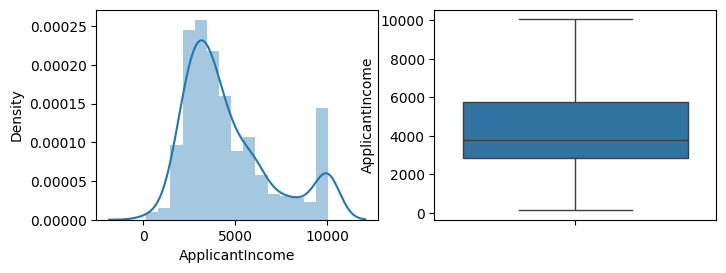

In [1165]:
#Comparing

plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
sns.distplot(df['ApplicantIncome'])

plt.subplot(2,2,2)
sns.boxplot(df['ApplicantIncome'])



plt.show()

<ipython-input-1166-7cfa14a885dc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: ylabel='CoapplicantIncome'>

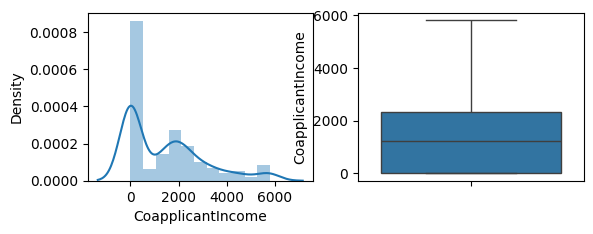

In [1166]:
plt.subplot(2,2,1)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(2,2,2)
sns.boxplot(df['CoapplicantIncome'])



<ipython-input-1167-382fcdb6617c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: ylabel='LoanAmount'>

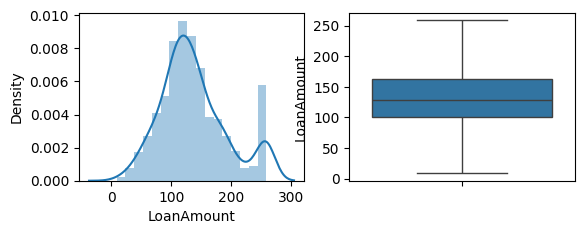

In [1167]:
plt.subplot(2,2,1)
sns.distplot(df['LoanAmount'])

plt.subplot(2,2,2)
sns.boxplot(df['LoanAmount'])

<Axes: >

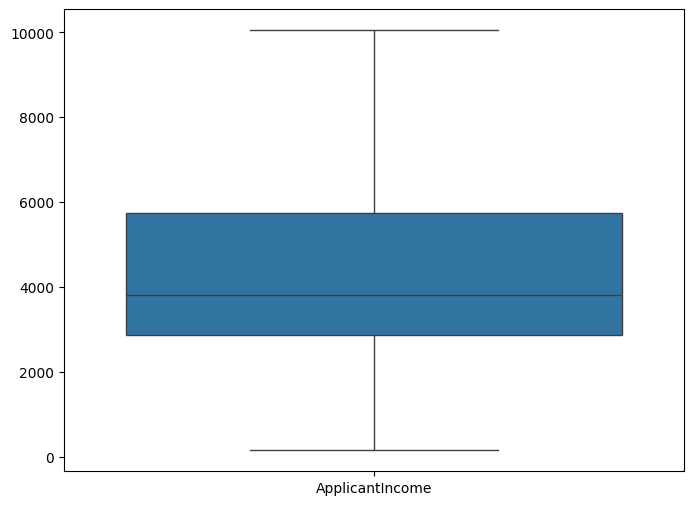

In [1168]:
plt.figure(figsize=(8, 6))
sns.boxplot(df[['ApplicantIncome']])

<Axes: >

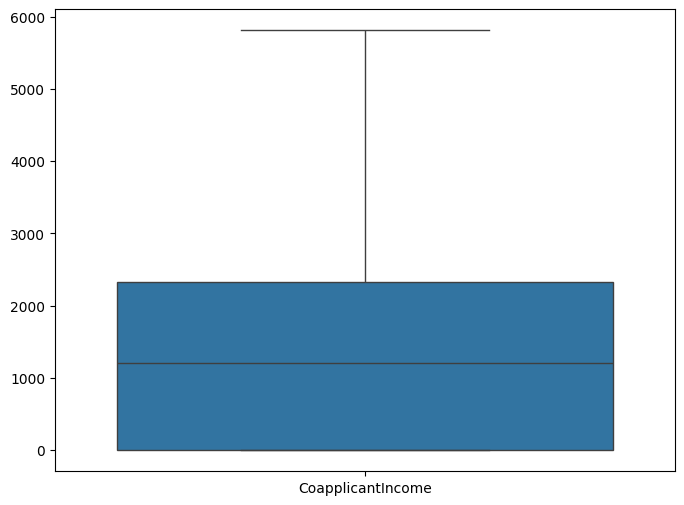

In [1169]:
plt.figure(figsize=(8, 6))
sns.boxplot(df[['CoapplicantIncome']])

<Axes: >

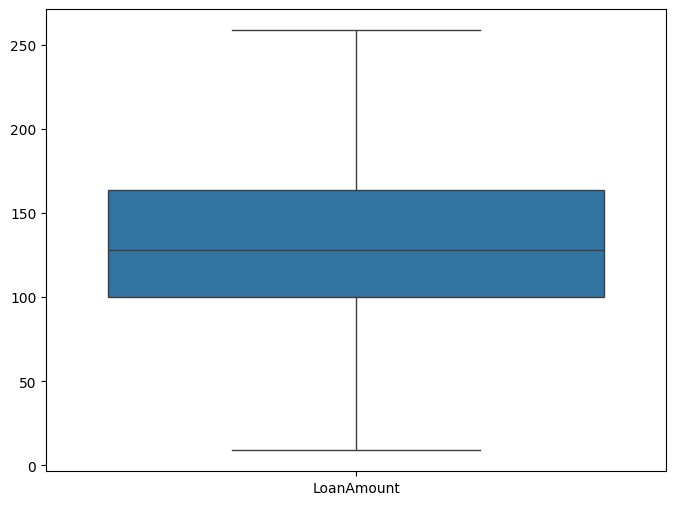

In [1170]:
plt.figure(figsize=(8, 6))
sns.boxplot(df[['LoanAmount']])

## Univariate Analysis




### **Numerical Variables**

In [1171]:
df_yes = df.loc[df['Loan_Status'] == 'Y']
df_no = df.loc[df['Loan_Status'] == 'N']

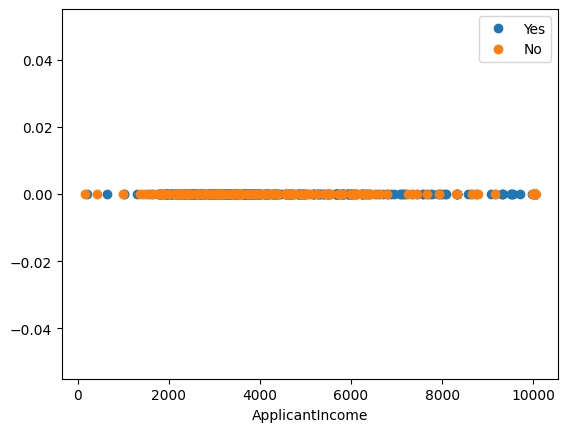

In [1172]:
plt.plot(df_yes['ApplicantIncome'], np.zeros_like(df_yes['ApplicantIncome']), 'o')
plt.plot(df_no['ApplicantIncome'], np.zeros_like(df_no['ApplicantIncome']), 'o')
plt.xlabel('ApplicantIncome')
plt.legend(['Yes', 'No'])
plt.show()

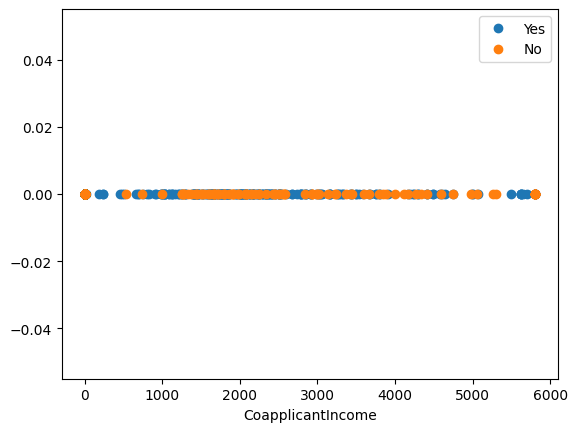

In [1173]:
plt.plot(df_yes['CoapplicantIncome'], np.zeros_like(df_yes['CoapplicantIncome']), 'o')
plt.plot(df_no['CoapplicantIncome'], np.zeros_like(df_no['CoapplicantIncome']), 'o')
plt.xlabel('CoapplicantIncome')
plt.legend(['Yes', 'No'])
plt.show()

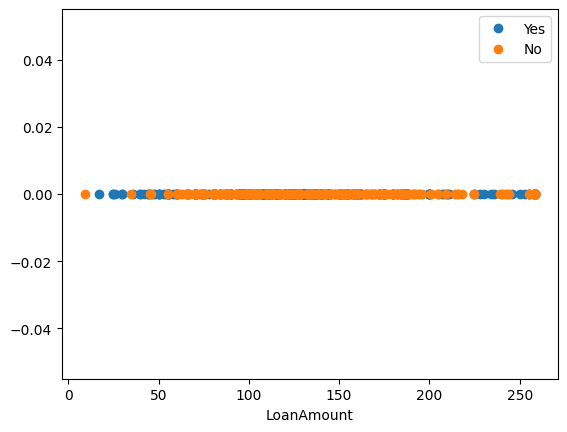

In [1174]:
plt.plot(df_yes['LoanAmount'], np.zeros_like(df_yes['LoanAmount']), 'o')
plt.plot(df_no['LoanAmount'], np.zeros_like(df_no['LoanAmount']), 'o')
plt.xlabel('LoanAmount')
plt.legend(['Yes', 'No'])
plt.show()

**Histogram**

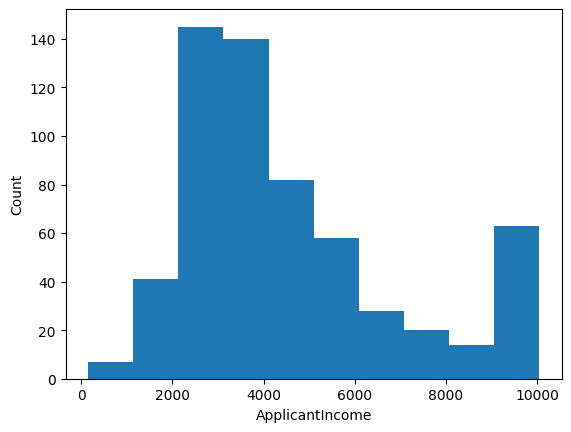

In [1175]:
plt.hist(df['ApplicantIncome'])
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.show()

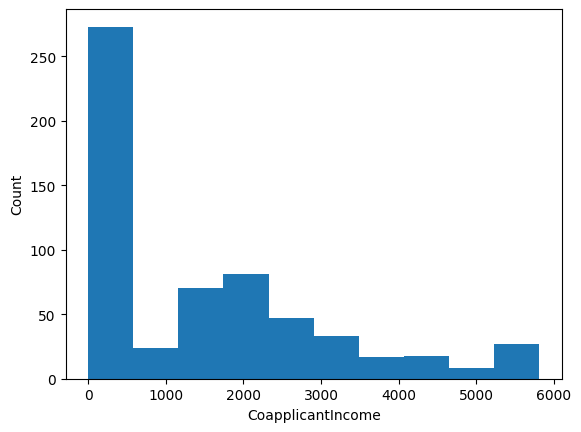

In [1176]:
plt.hist(df['CoapplicantIncome'])
plt.xlabel('CoapplicantIncome')
plt.ylabel('Count')
plt.show()

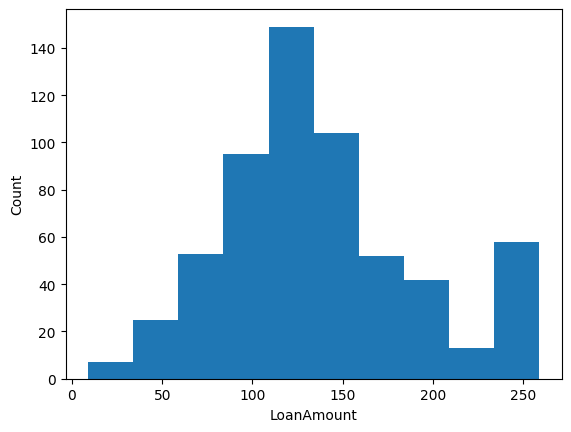

In [1177]:
plt.hist(df['LoanAmount'])
plt.xlabel('LoanAmount')
plt.ylabel('Count')
plt.show()

The histogram of Numerical variables tells us that the average loan amount is between 100 and 150.

**Distplot**

<ipython-input-1178-cd036803a126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["ApplicantIncome"]])


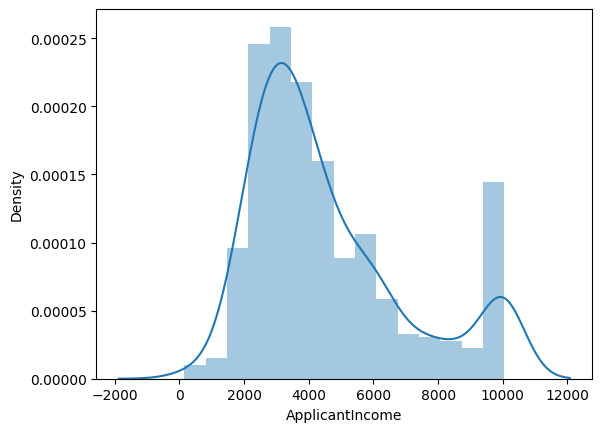

In [1178]:
sns.distplot(df[["ApplicantIncome"]])
plt.xlabel('ApplicantIncome')
plt.ylabel('Density')
plt.show()

In [1179]:
from scipy.stats import shapiro

stat, p = shapiro(df['ApplicantIncome'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.878, p=0.000
Sample does not look Gaussian (reject H0)


<ipython-input-1180-93046fe2a0f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["CoapplicantIncome"]])


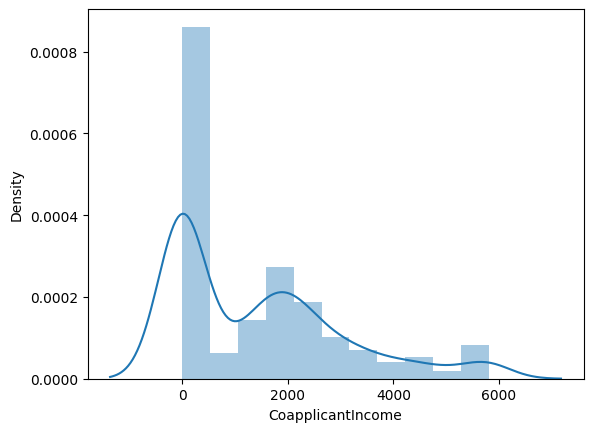

In [1180]:
sns.distplot(df[["CoapplicantIncome"]])
plt.xlabel('CoapplicantIncome')
plt.ylabel('Density')
plt.show()

In [1181]:
from scipy.stats import shapiro

stat, p = shapiro(df['CoapplicantIncome'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.825, p=0.000
Sample does not look Gaussian (reject H0)


<ipython-input-1182-929d4f241d30>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["LoanAmount"]])


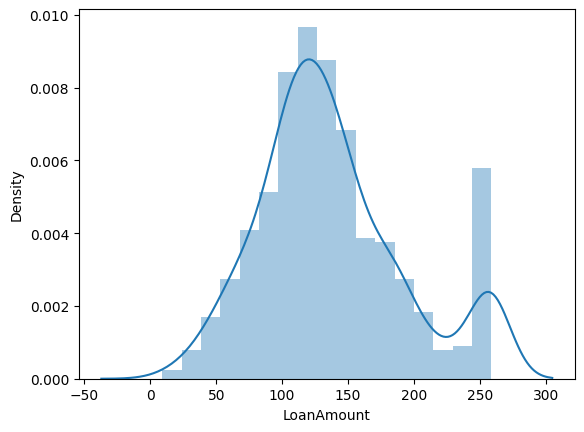

In [1182]:
sns.distplot(df[["LoanAmount"]])
plt.xlabel('LoanAmount')
plt.ylabel('Density')
plt.show()

In [1183]:
from scipy.stats import shapiro

stat, p = shapiro(df['LoanAmount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.949, p=0.000
Sample does not look Gaussian (reject H0)


<ipython-input-1184-8e80cb1a6f41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

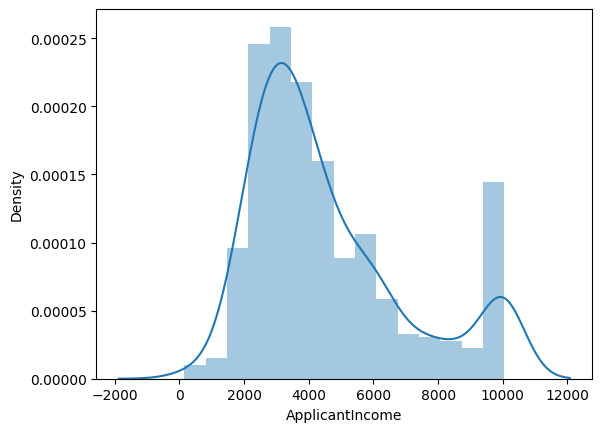

In [1184]:
import matplotlib.pyplot as plt
sns.distplot(df['ApplicantIncome'])

### **Categorical Variables**

**Countplot**

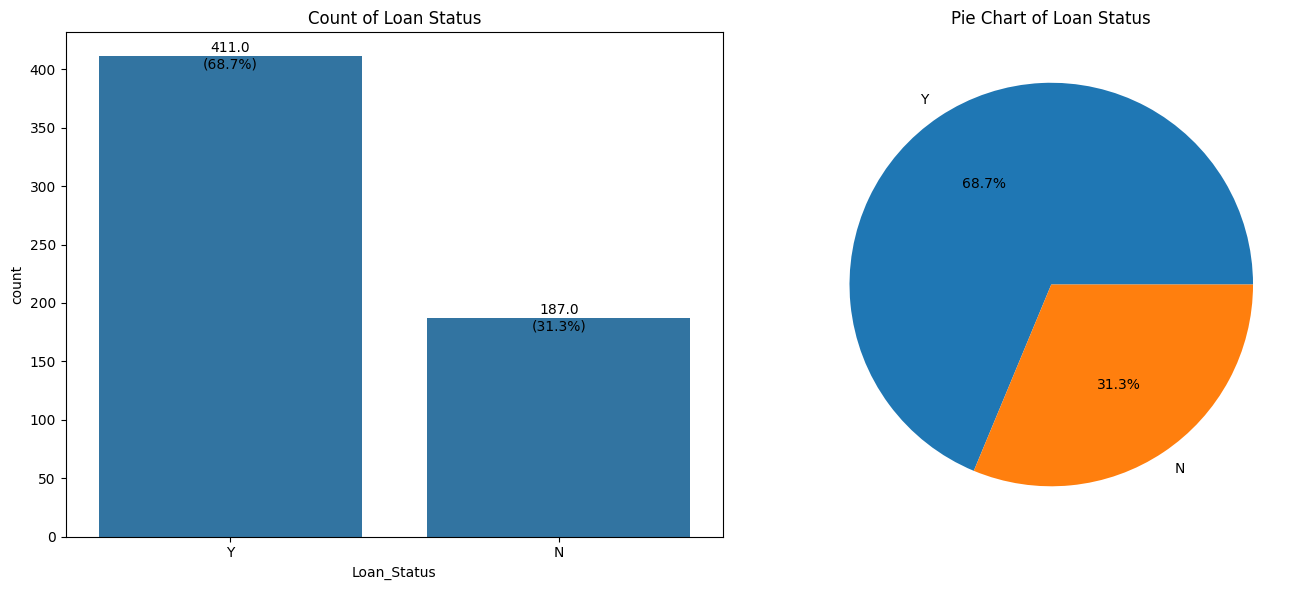

In [1185]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
ls = sns.countplot(x='Loan_Status', data=df, ax=axes[0])

total = len(df)

# Iterate over each bar to annotate count and percentage
for p in ls.patches:
    count = p.get_height()  # Count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X coordinate to center the text
    y = p.get_height()  # Y coordinate just above the top of the bar
    ls.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

# Set plot title
axes[0].set_title('Count of Loan Status')

# Pie chart
df['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Loan Status')
axes[1].set_ylabel('')  # Remove y-label for pie chart

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

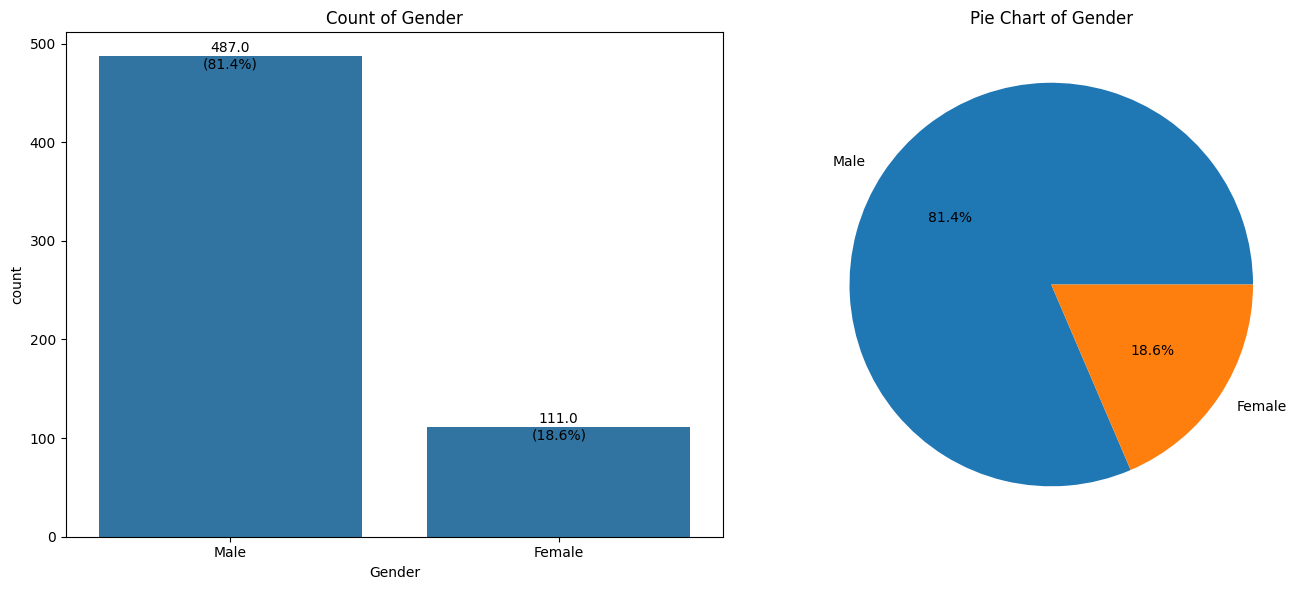

In [1186]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
gen = sns.countplot(x='Gender', data=df, ax=axes[0])

total = len(df)

# Iterate over each bar to annotate count and percentage
for p in gen.patches:
    count = p.get_height()  # Count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X coordinate to center the text
    y = p.get_height()  # Y coordinate just above the top of the bar
    gen.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

# Set plot title
axes[0].set_title('Count of Gender')

# Pie chart
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Gender')
axes[1].set_ylabel('')  # Remove y-label for pie chart

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


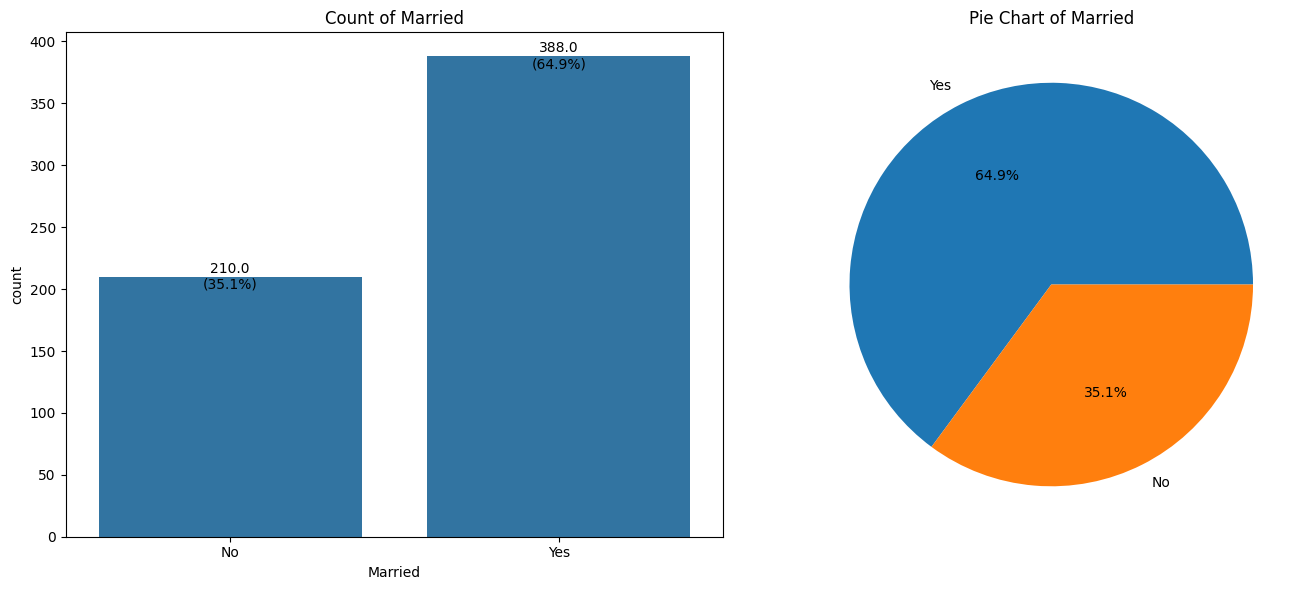

In [1187]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ma = sns.countplot(x='Married', data=df, ax=axes[0])

total = len(df)
for p in ma.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ma.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

axes[0].set_title('Count of Married')

# Pie chart
df['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Married')
axes[1].set_ylabel('')  # Remove y-label for pie chart

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

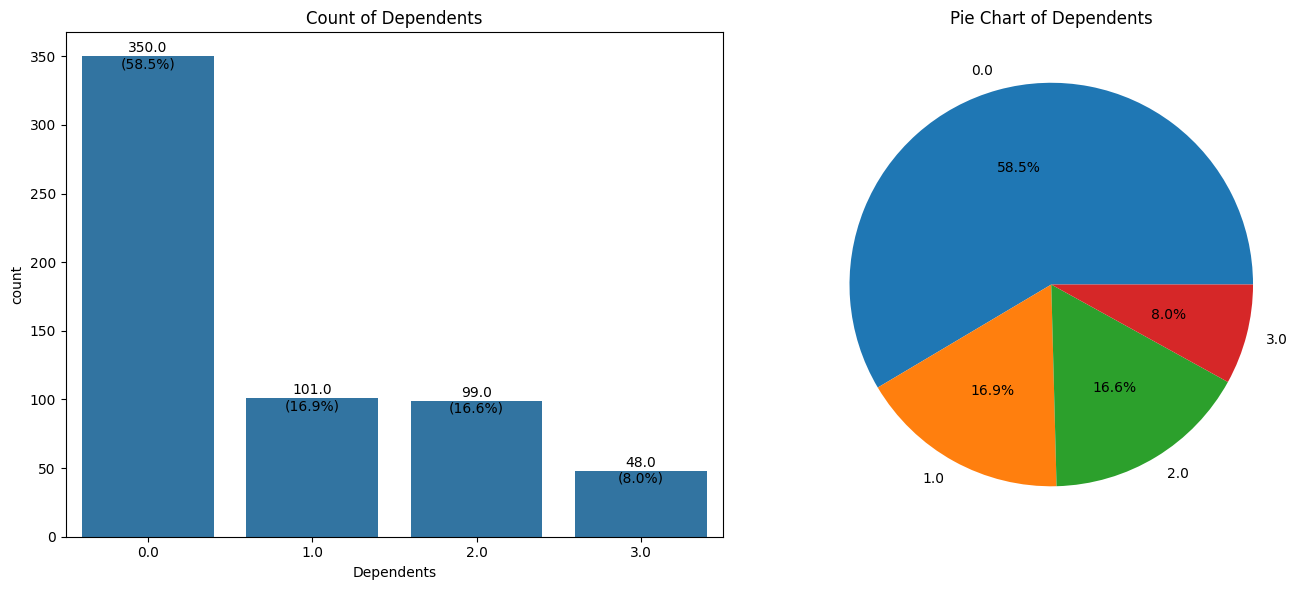

In [1188]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

dp = sns.countplot(x='Dependents', data=df, ax=axes[0])

total = len(df)
for p in dp.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    dp.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

axes[0].set_title('Count of Dependents')

# Pie chart
df['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Dependents')
axes[1].set_ylabel('')  # Remove y-label for pie chart

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

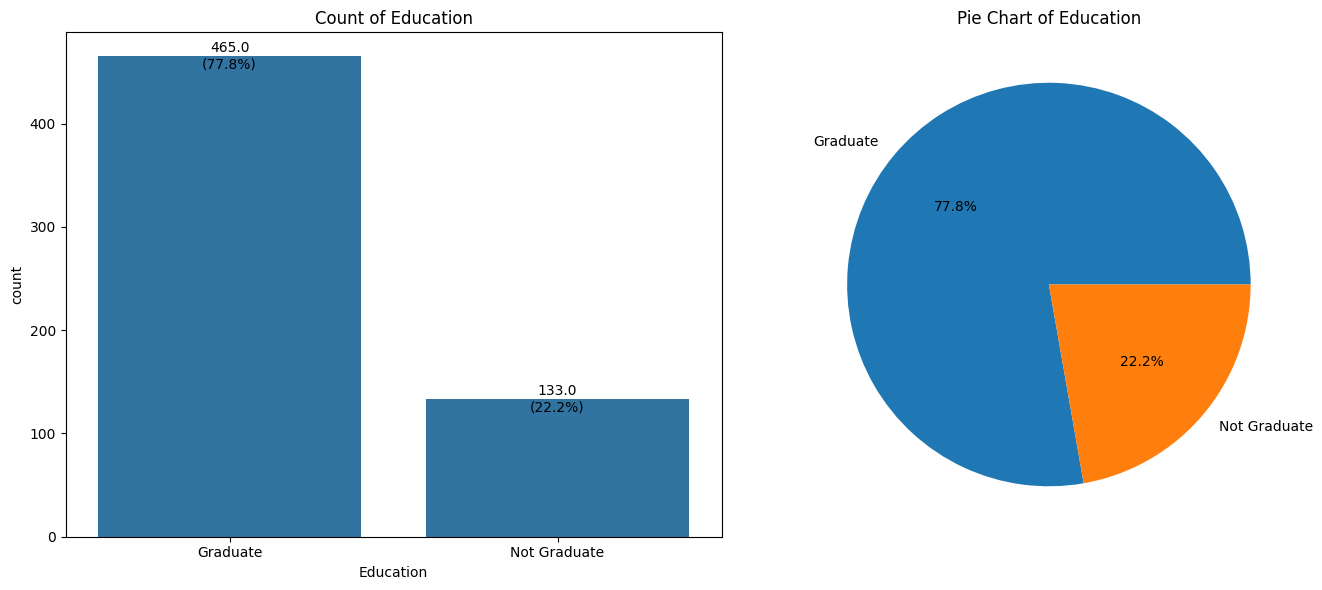

In [1189]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ed = sns.countplot(x='Education',data=df, ax=axes[0])

total = len(df)
for p in ed.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ed.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

axes[0].set_title('Count of Education')

# Pie chart
df['Education'].value_counts().plot(kind='pie',autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Education')
axes[1].set_ylabel('')  # Remove y-label for pie chart

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

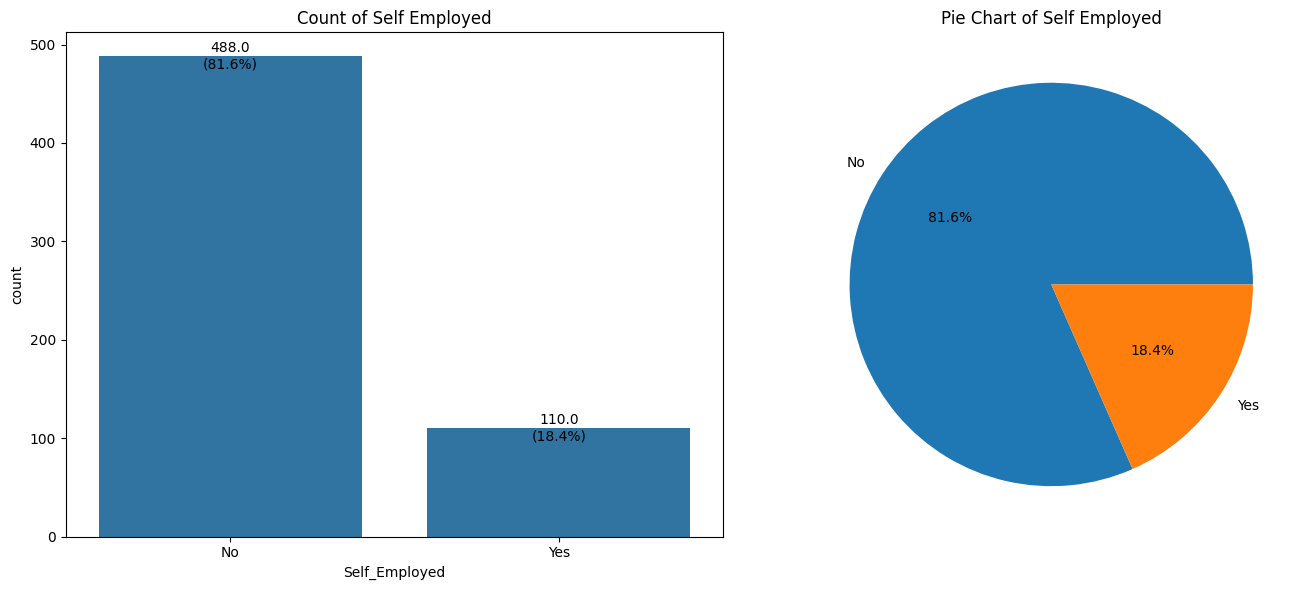

In [1190]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

se = sns.countplot(x='Self_Employed', data=df, ax=axes[0])

total = len(df)
for p in se.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    se.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

axes[0].set_title('Count of Self Employed')

# Pie chart
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Self Employed')
axes[1].set_ylabel('')  # Remove y-label for pie chart

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

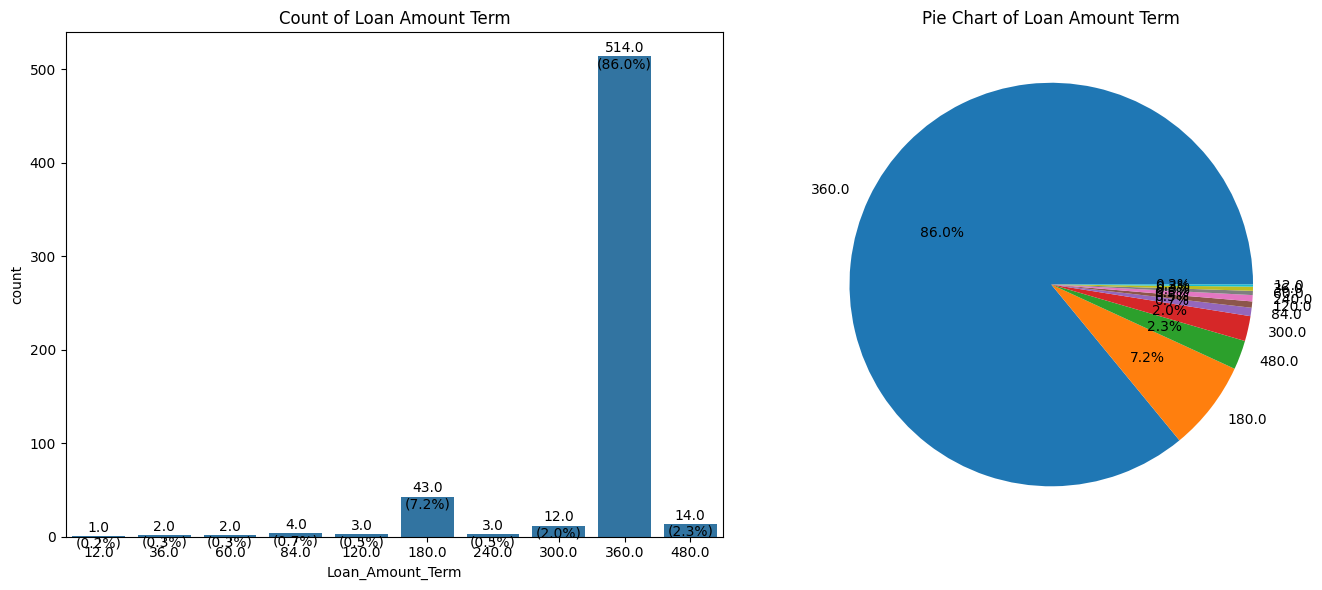

In [1191]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

lt = sns.countplot(x='Loan_Amount_Term', data=df, ax=axes[0])

total = len(df)
for p in lt.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    lt.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

axes[0].set_title('Count of Loan Amount Term')

# Pie chart
df['Loan_Amount_Term'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Loan Amount Term')
axes[1].set_ylabel('')  # Remove y-label for pie chart

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

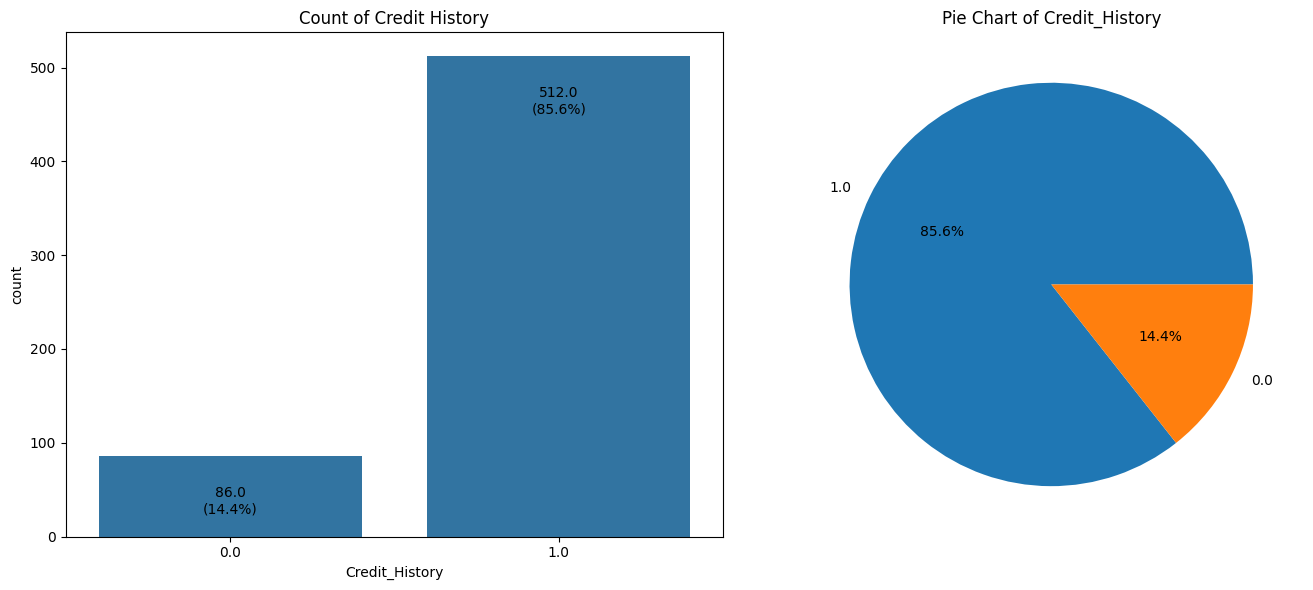

In [1192]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ch = sns.countplot(x='Credit_History', data=df, ax=axes[0])

total = len(df)
for p in ch.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() - 48
    ch.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

axes[0].set_title('Count of Credit History')

# Pie chart
df['Credit_History'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Credit_History')
axes[1].set_ylabel('')  # Remove y-label for pie chart

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

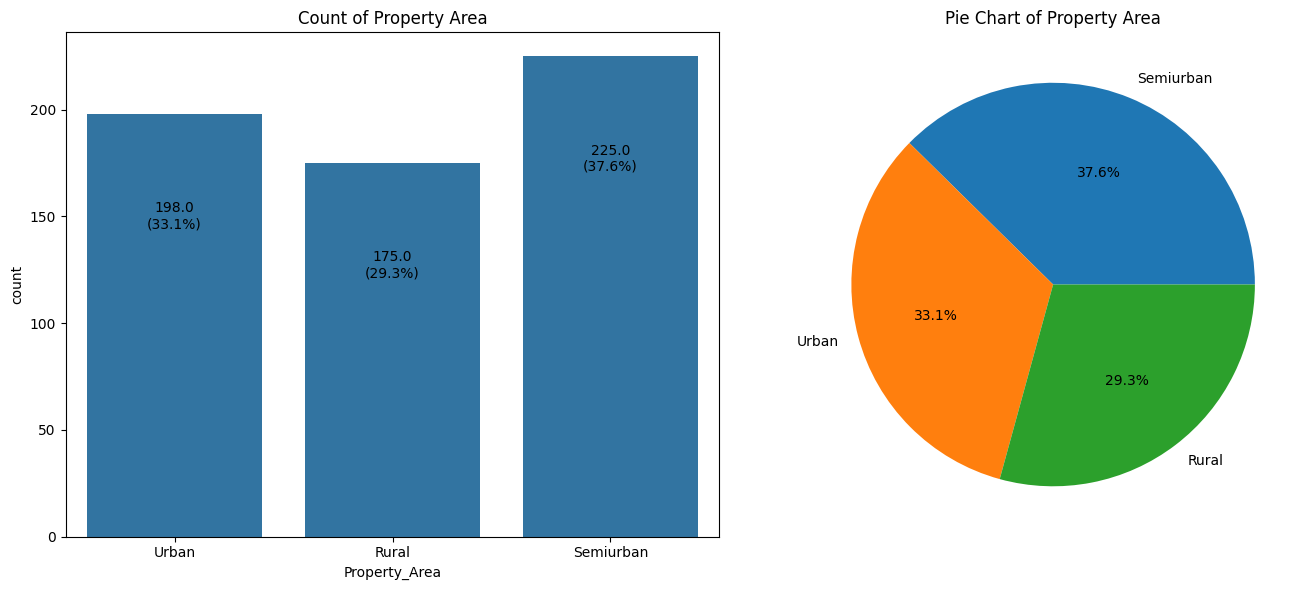

In [1193]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

pa = sns.countplot(x='Property_Area', data=df, ax=axes[0])

total = len(df)
for p in pa.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() - 48
    pa.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

axes[0].set_title('Count of Property Area')

# Pie chart
df['Property_Area'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Property Area')
axes[1].set_ylabel('')  # Remove y-label for pie chart

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [1194]:
df['ApplicantIncome'].min()

150.0

In [1195]:
df['ApplicantIncome'].max()

10048.75

In [1196]:
df['CoapplicantIncome'].min()

0.0

In [1197]:
df['CoapplicantIncome'].max()

5810.0

In [1198]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       598.000000         598.000000  598.000000        598.000000
mean       4578.337793        1426.576789  137.141463        342.341137
std        2420.473264        1631.076994   55.270695         64.494977
min         150.000000           0.000000    9.000000         12.000000
25%        2877.500000           0.000000  100.000000        360.000000
50%        3806.000000        1211.500000  128.000000        360.000000
75%        5746.000000        2324.000000  163.500000        360.000000
max       10048.750000        5810.000000  258.750000        480.000000

## Bivariate Analysis

In [1199]:
#sns.reset_orig()

### **Countplot**

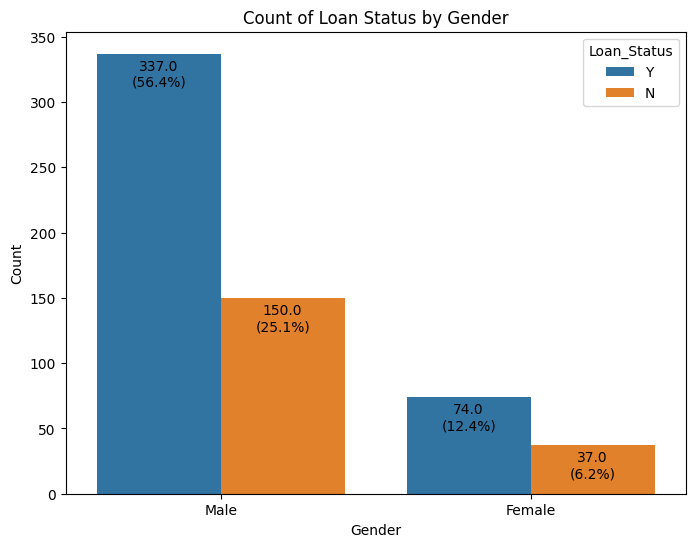

In [1200]:
plt.figure(figsize=(8, 6))
gr = sns.countplot(x='Gender', hue='Loan_Status', data=df)

# Calculate total count for each category
total = len(df)

# Iterate over each bar to annotate count and percentage
for p in gr.patches:
    count = p.get_height()  # Count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X coordinate to center the text
    y = p.get_height() -25   # Y coordinate just above the top of the bar
    gr.annotate(f'{count}\n({percentage})', (x, y), ha='center')

# Set plot title and labels
plt.title('Count of Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show plot
plt.show()

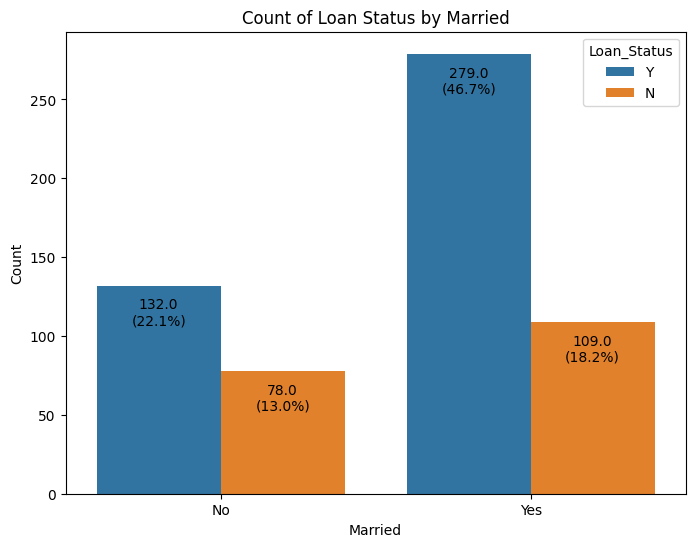

In [1201]:
plt.figure(figsize=(8, 6))
gr = sns.countplot(x='Married', hue='Loan_Status', data=df)

# Calculate total count for each category
total = len(df)

# Iterate over each bar to annotate count and percentage
for p in gr.patches:
    count = p.get_height()  # Count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() /2   # X coordinate to center the text
    y = p.get_height() -25 # Y coordinate just above the top of the bar
    gr.annotate(f'{count}\n({percentage})', (x, y), ha='center')

# Set plot title and labels
plt.title('Count of Loan Status by Married')
plt.xlabel('Married')
plt.ylabel('Count')

# Show plot
plt.show()

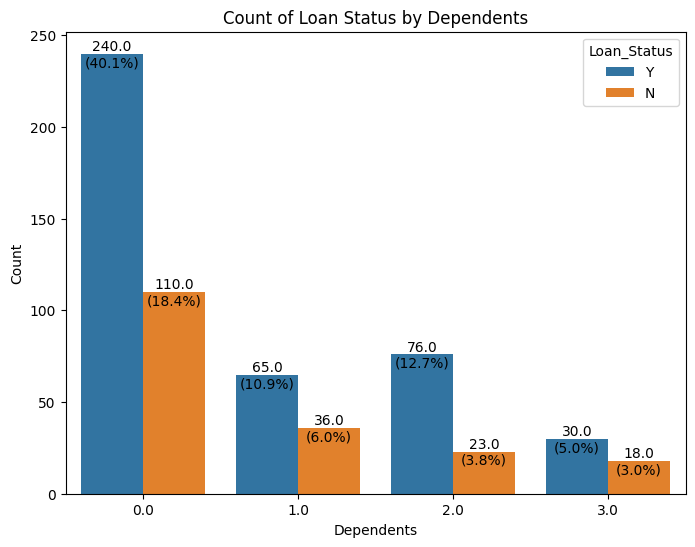

In [1202]:
plt.figure(figsize=(8, 6))
gr = sns.countplot(x='Dependents', hue='Loan_Status', data=df)

# Calculate total count for each category
total = len(df)

# Iterate over each bar to annotate count and percentage
for p in gr.patches:
    count = p.get_height()  # Count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X coordinate to center the text
    y = p.get_height() - 7   # Y coordinate just above the top of the bar
    gr.annotate(f'{count}\n({percentage})', (x, y), ha='center')

# Set plot title and labels
plt.title('Count of Loan Status by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

# Show plot
plt.show()

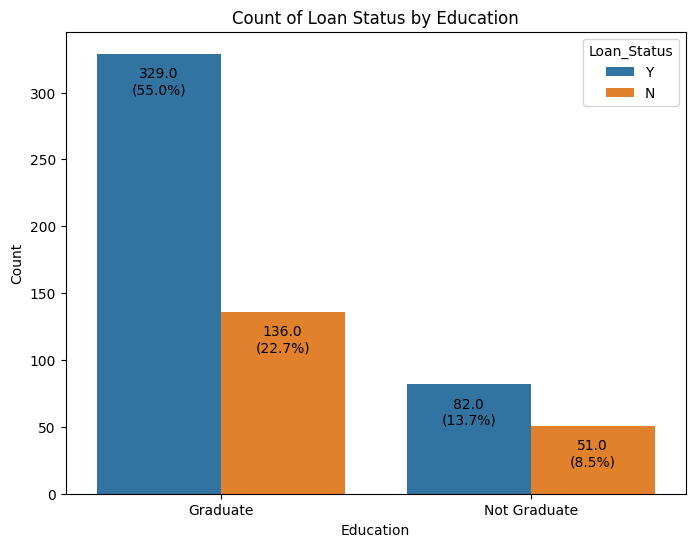

In [1203]:
plt.figure(figsize=(8, 6))
gr = sns.countplot(x='Education', hue='Loan_Status', data=df)

# Calculate total count for each category
total = len(df)

# Iterate over each bar to annotate count and percentage
for p in gr.patches:
    count = p.get_height()  # Count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X coordinate to center the text
    y = p.get_height() - 30   # Y coordinate just above the top of the bar
    gr.annotate(f'{count}\n({percentage})', (x, y), ha='center')

# Set plot title and labels
plt.title('Count of Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')

# Show plot
plt.show()

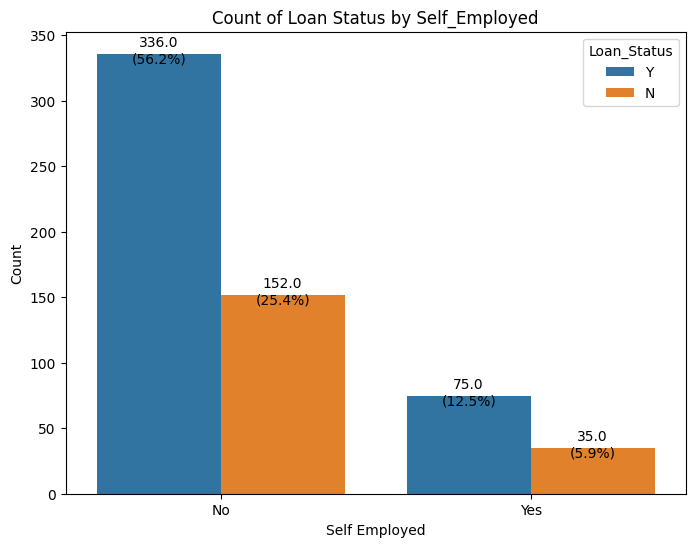

In [1204]:
plt.figure(figsize=(8, 6))
gr = sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

# Calculate total count for each category
total = len(df)

# Iterate over each bar to annotate count and percentage
for p in gr.patches:
    count = p.get_height()  # Count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X coordinate to center the text
    y = p.get_height() - 7   # Y coordinate just above the top of the bar
    gr.annotate(f'{count}\n({percentage})', (x, y), ha='center')

# Set plot title and labels
plt.title('Count of Loan Status by Self_Employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')

# Show plot
plt.show()

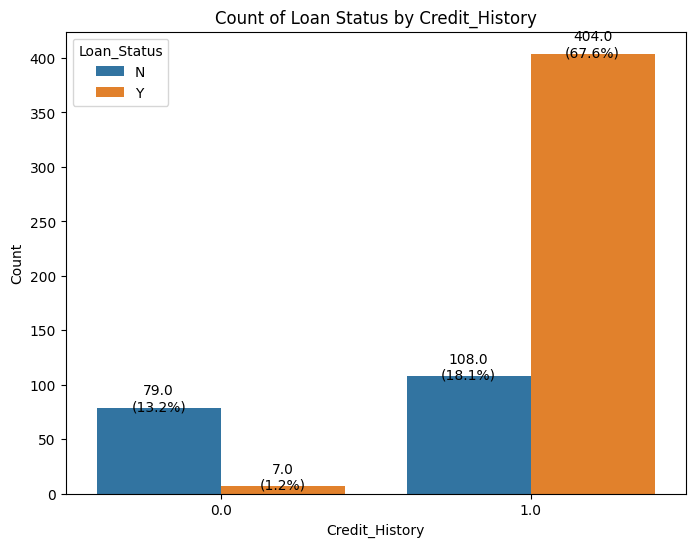

In [1205]:
plt.figure(figsize=(8, 6))
gr = sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

# Calculate total count for each category
total = len(df)

# Iterate over each bar to annotate count and percentage
for p in gr.patches:
    count = p.get_height()  # Count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X coordinate to center the text
    y = p.get_height() -3   # Y coordinate just above the top of the bar
    gr.annotate(f'{count}\n({percentage})', (x, y), ha='center')

# Set plot title and labels
plt.title('Count of Loan Status by Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Count')

# Show plot
plt.show()

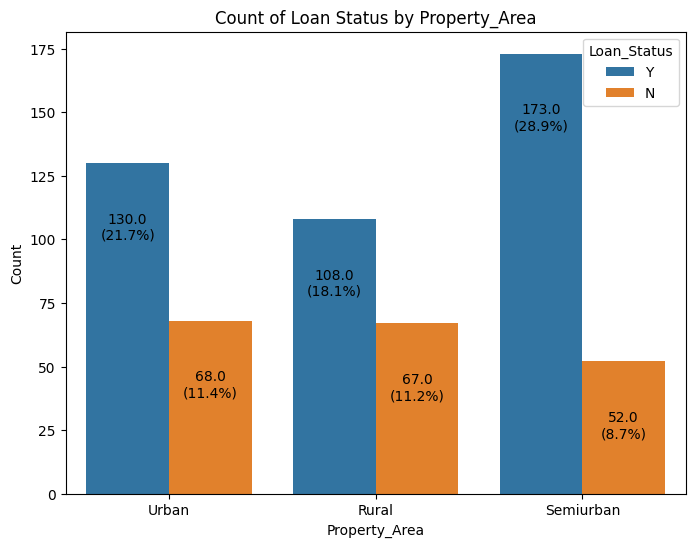

In [1206]:
plt.figure(figsize=(8, 6))
gr = sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

# Calculate total count for each category
total = len(df)

# Iterate over each bar to annotate count and percentage
for p in gr.patches:
    count = p.get_height()  # Count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X coordinate to center the text
    y = p.get_height() -30   # Y coordinate just above the top of the bar
    gr.annotate(f'{count}\n({percentage})', (x, y), ha='center')

# Set plot title and labels
plt.title('Count of Loan Status by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Count')

# Show plot
plt.show()

### **Scatterplot: Numerical - Numerical**

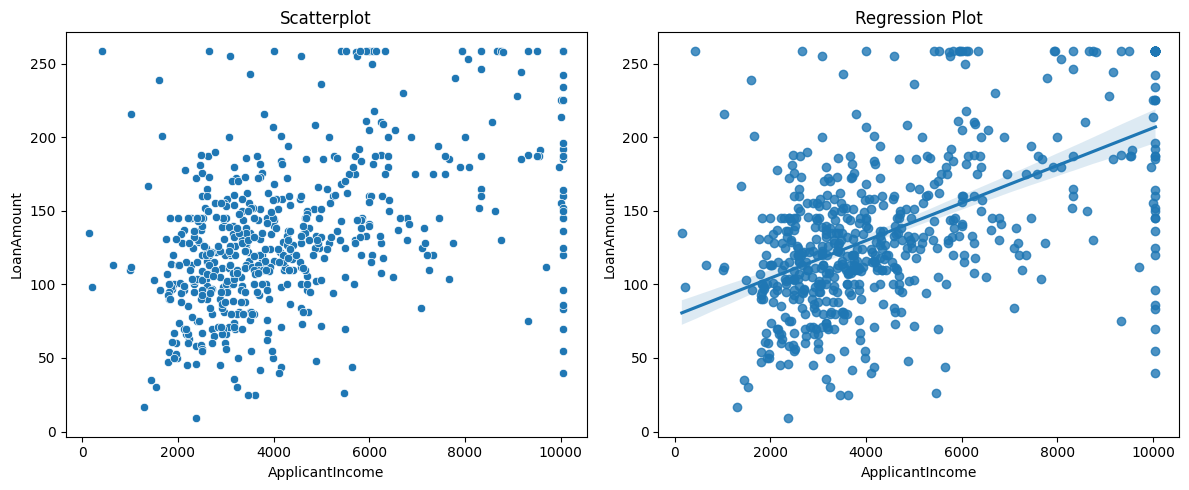

In [1207]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, ax=axes[0])
axes[0].set_title('Scatterplot')

sns.regplot(x='ApplicantIncome', y='LoanAmount', data=df, ax=axes[1])
axes[1].set_title('Regression Plot')

plt.tight_layout()
plt.show()

In [1208]:
pearson_coef, p_value = stats.pearsonr(df['ApplicantIncome'], df['LoanAmount'])
print(f"Pearson Coefficient: {pearson_coef:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Coefficient: 0.56
P-value: 0.0000


Though the scatter plot showing there is a positive corellation between ApplicantIncome and LoanAmount. The Pearson coefficient confirms that it's not strongly correlated.
Pearson coefficient = +1 strongly positively correlated
Pearson coefficient = -1 strongly negatively correlated
Pearson coefficient = 0 weak correlation

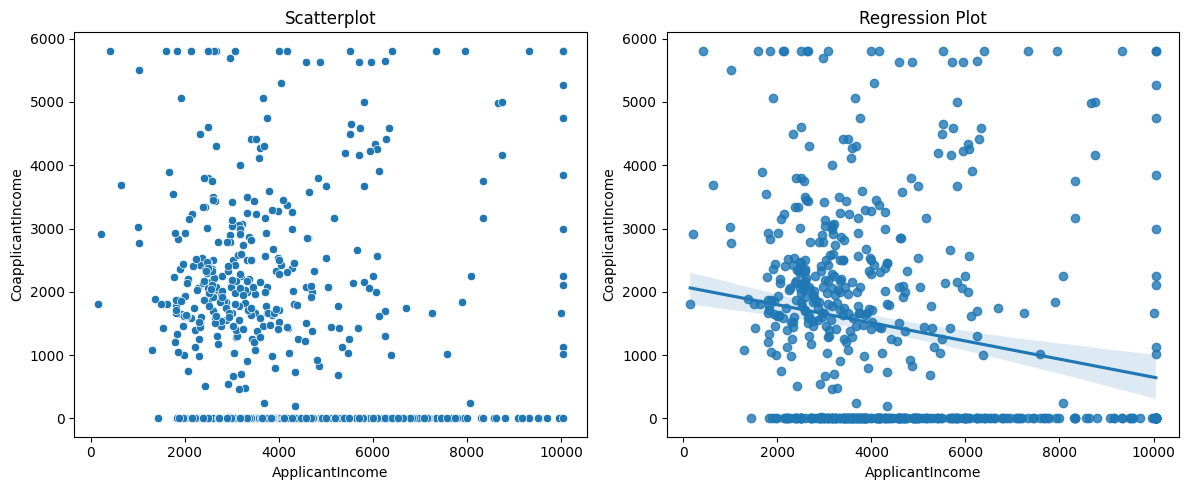

In [1209]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=df, ax=axes[0])
axes[0].set_title('Scatterplot')

sns.regplot(x='ApplicantIncome', y='CoapplicantIncome', data=df, ax=axes[1])
axes[1].set_title('Regression Plot')

plt.tight_layout()
plt.show()

In [1210]:
pearson_coef, p_value = stats.pearsonr(df['ApplicantIncome'], df['CoapplicantIncome'])
print(f"Pearson Coefficient: {pearson_coef:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Coefficient: -0.21
P-value: 0.0000


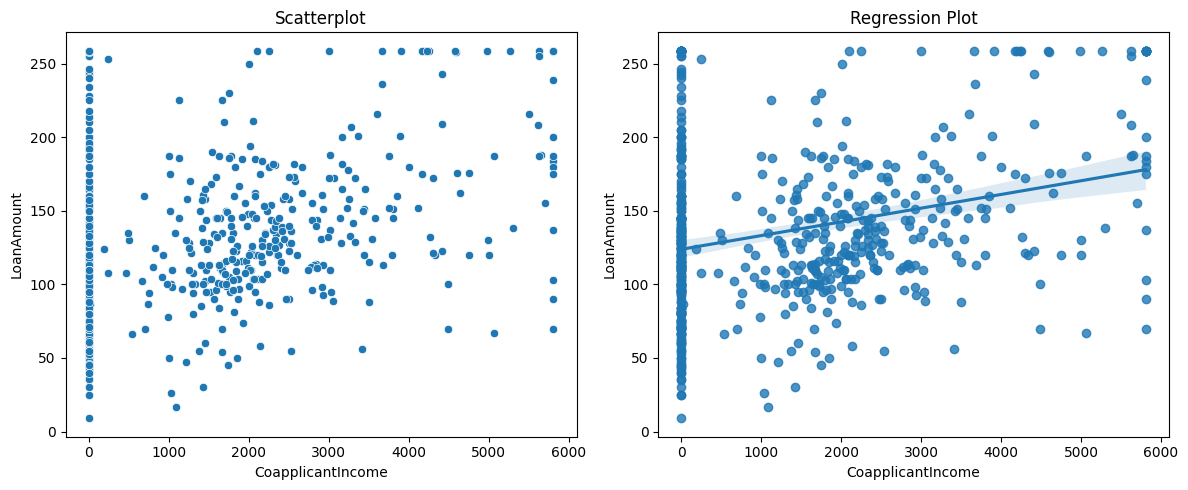

In [1211]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=df, ax=axes[0])
axes[0].set_title('Scatterplot')

sns.regplot(x='CoapplicantIncome', y='LoanAmount', data=df, ax=axes[1])
axes[1].set_title('Regression Plot')

plt.tight_layout()
plt.show()

In [1212]:
#Important
pearson_coef, p_value = stats.pearsonr(df['CoapplicantIncome'], df['LoanAmount'])
print(f"Pearson Coefficient: {pearson_coef:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Coefficient: 0.27
P-value: 0.0000


### **Barplot: Numerical - Categorical**

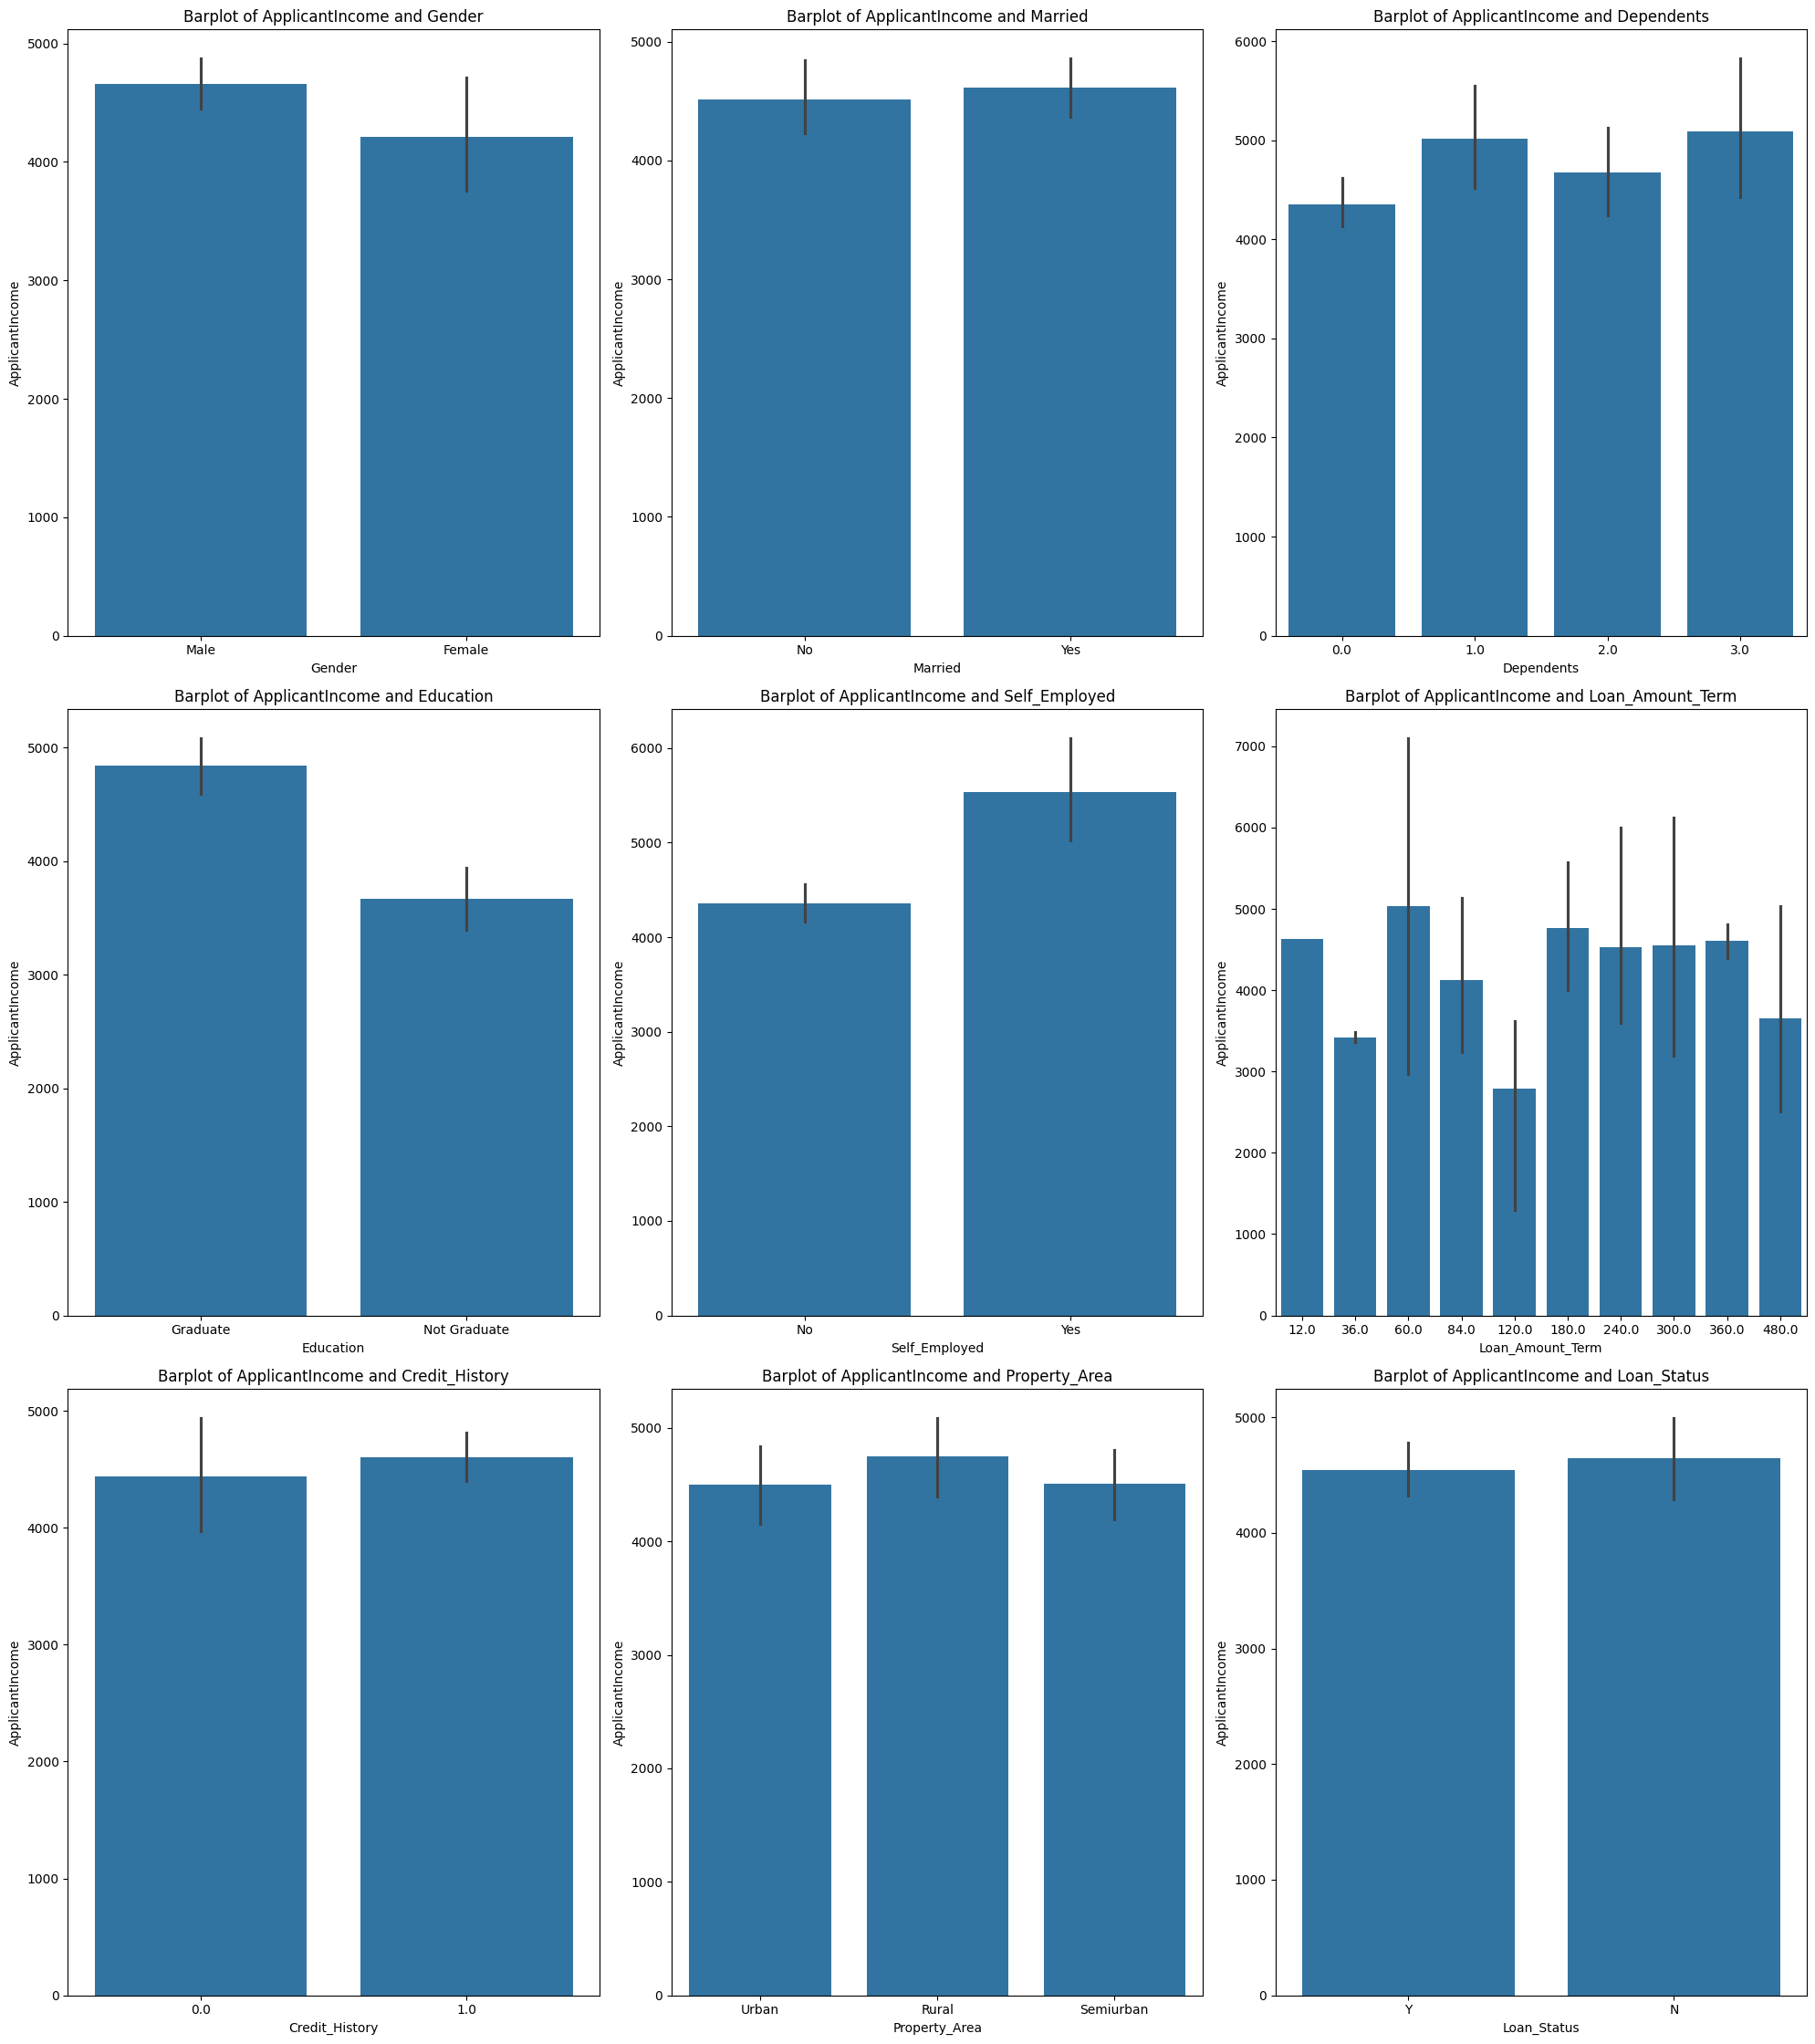

In [1213]:
# Variables to plot
variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area', 'Loan_Status']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    ax = sns.barplot(x=var, y='ApplicantIncome', data=df, ax=axes[i])
    ax.set_title(f'Barplot of ApplicantIncome and {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('ApplicantIncome')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

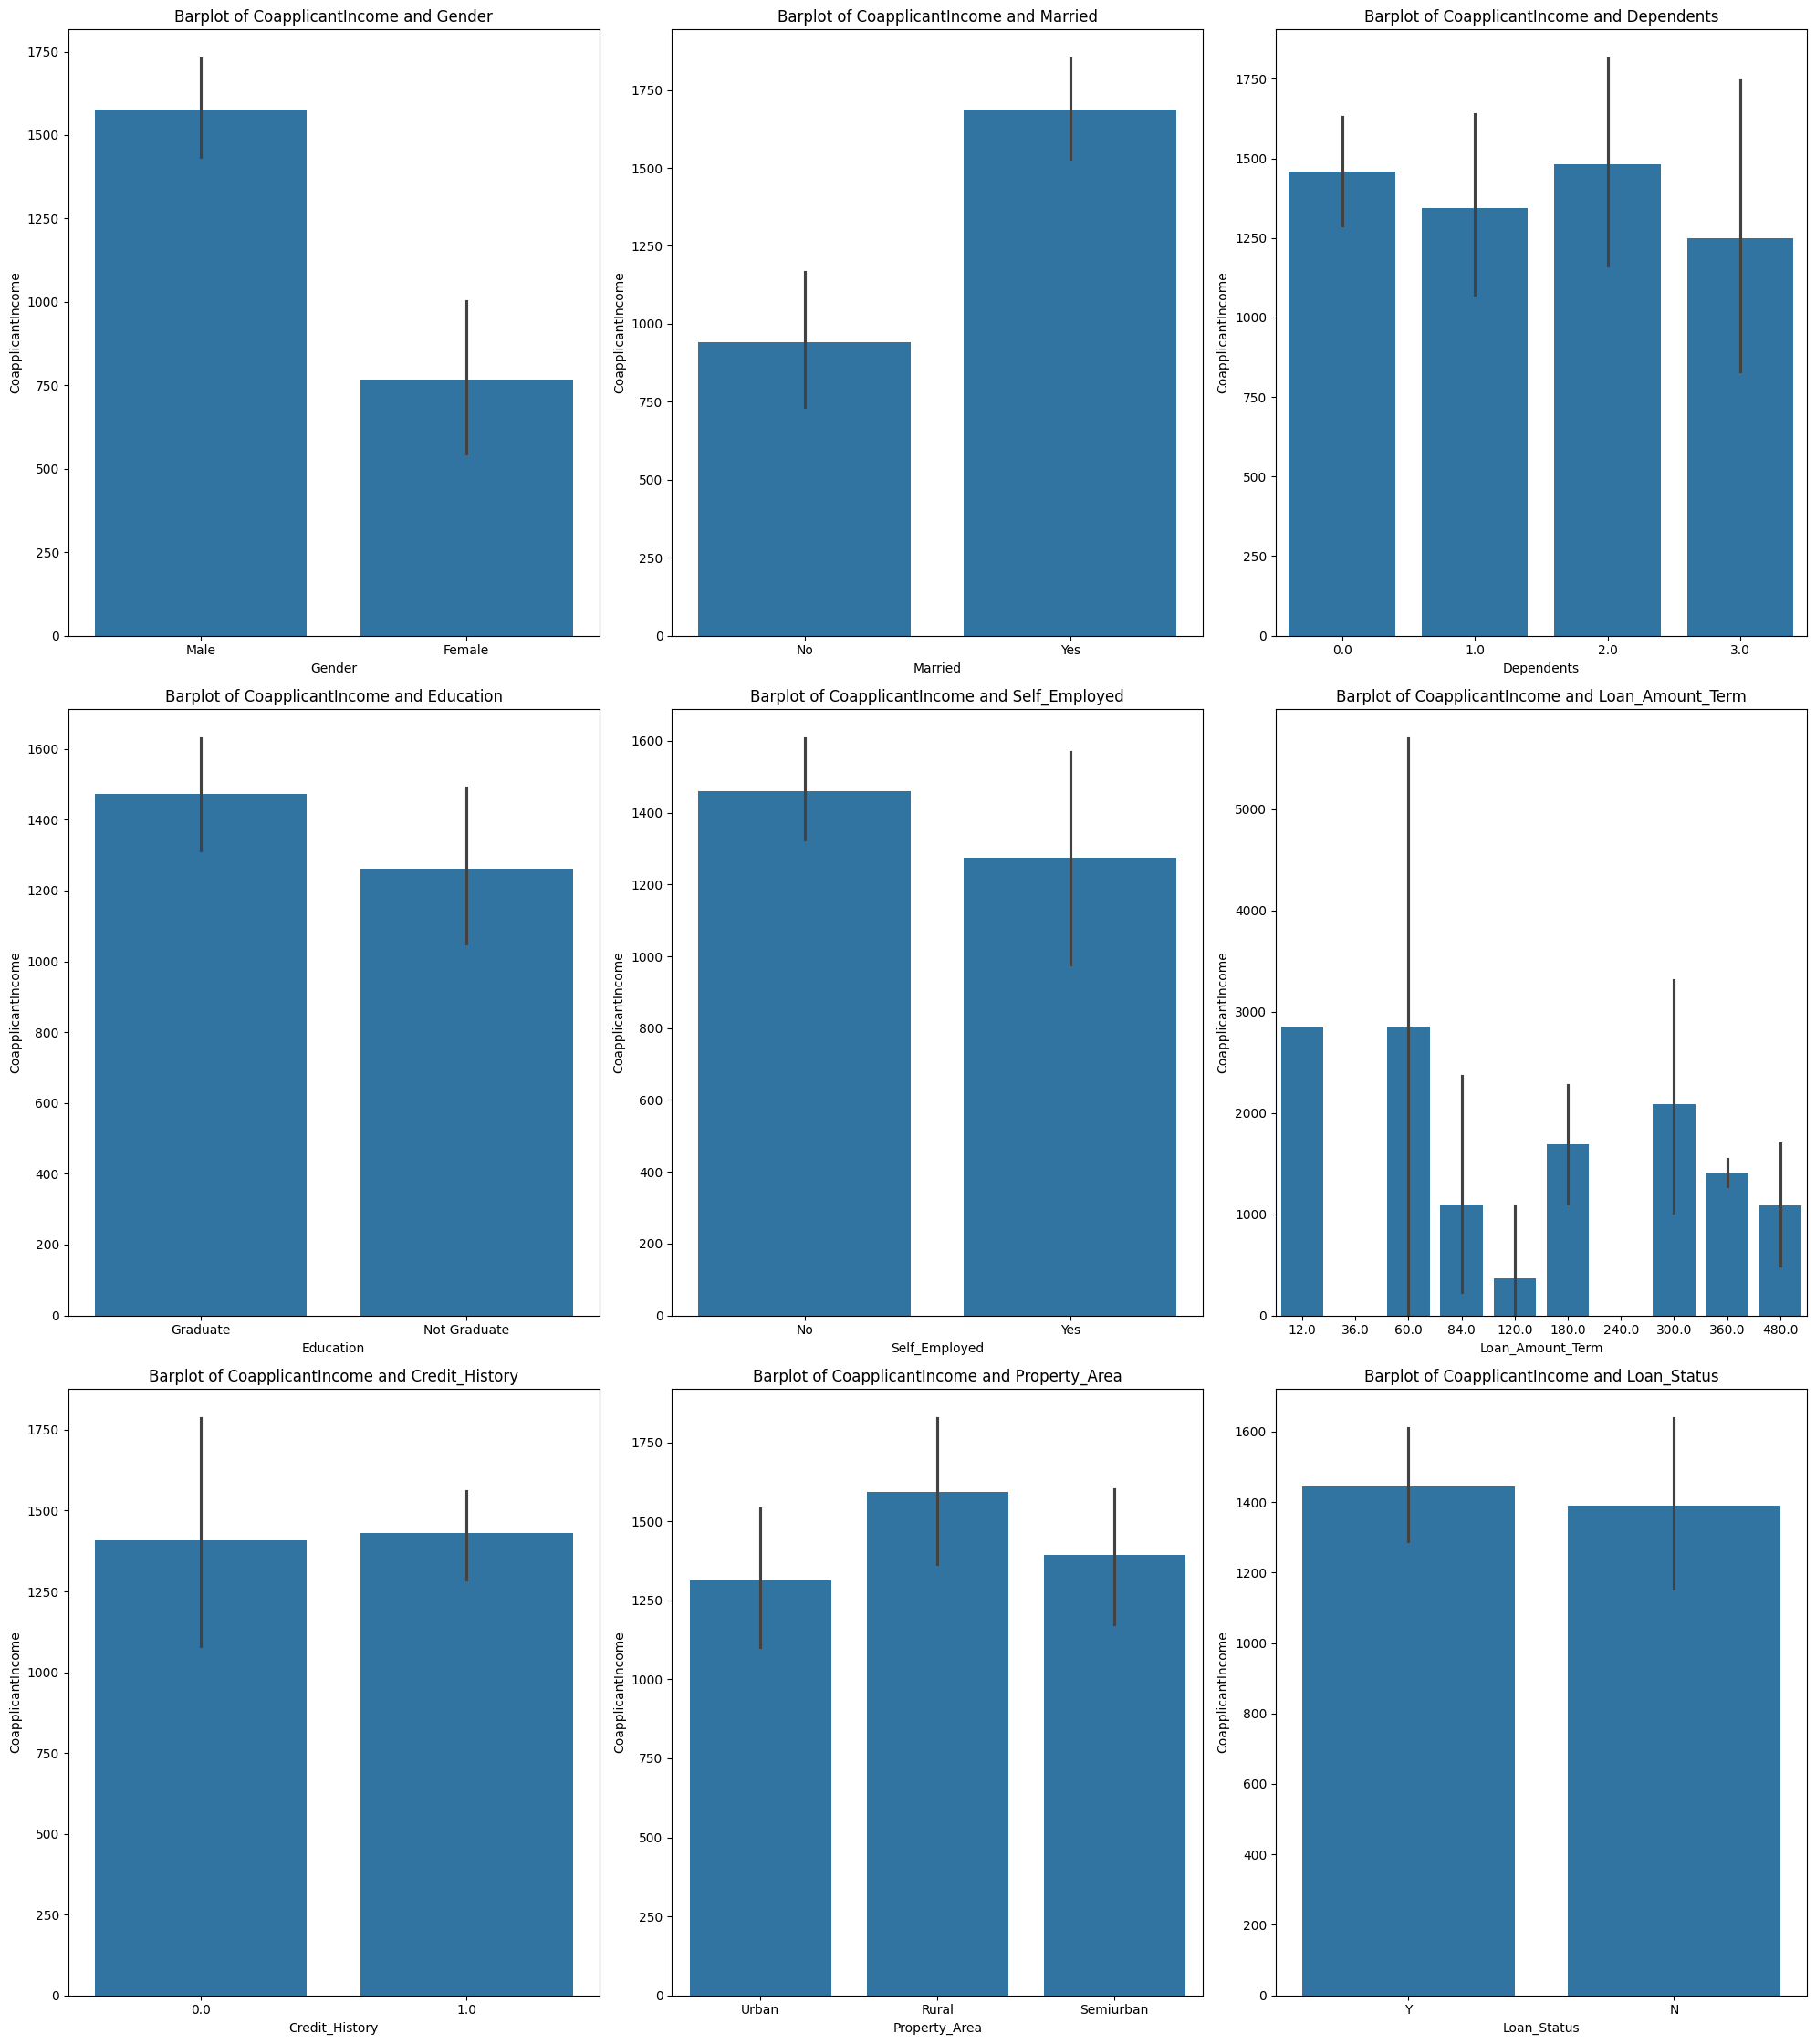

In [1214]:
variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area', 'Loan_Status']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    ax = sns.barplot(x=var, y='CoapplicantIncome', data=df, ax=axes[i])
    ax.set_title(f'Barplot of CoapplicantIncome and {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('CoapplicantIncome')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

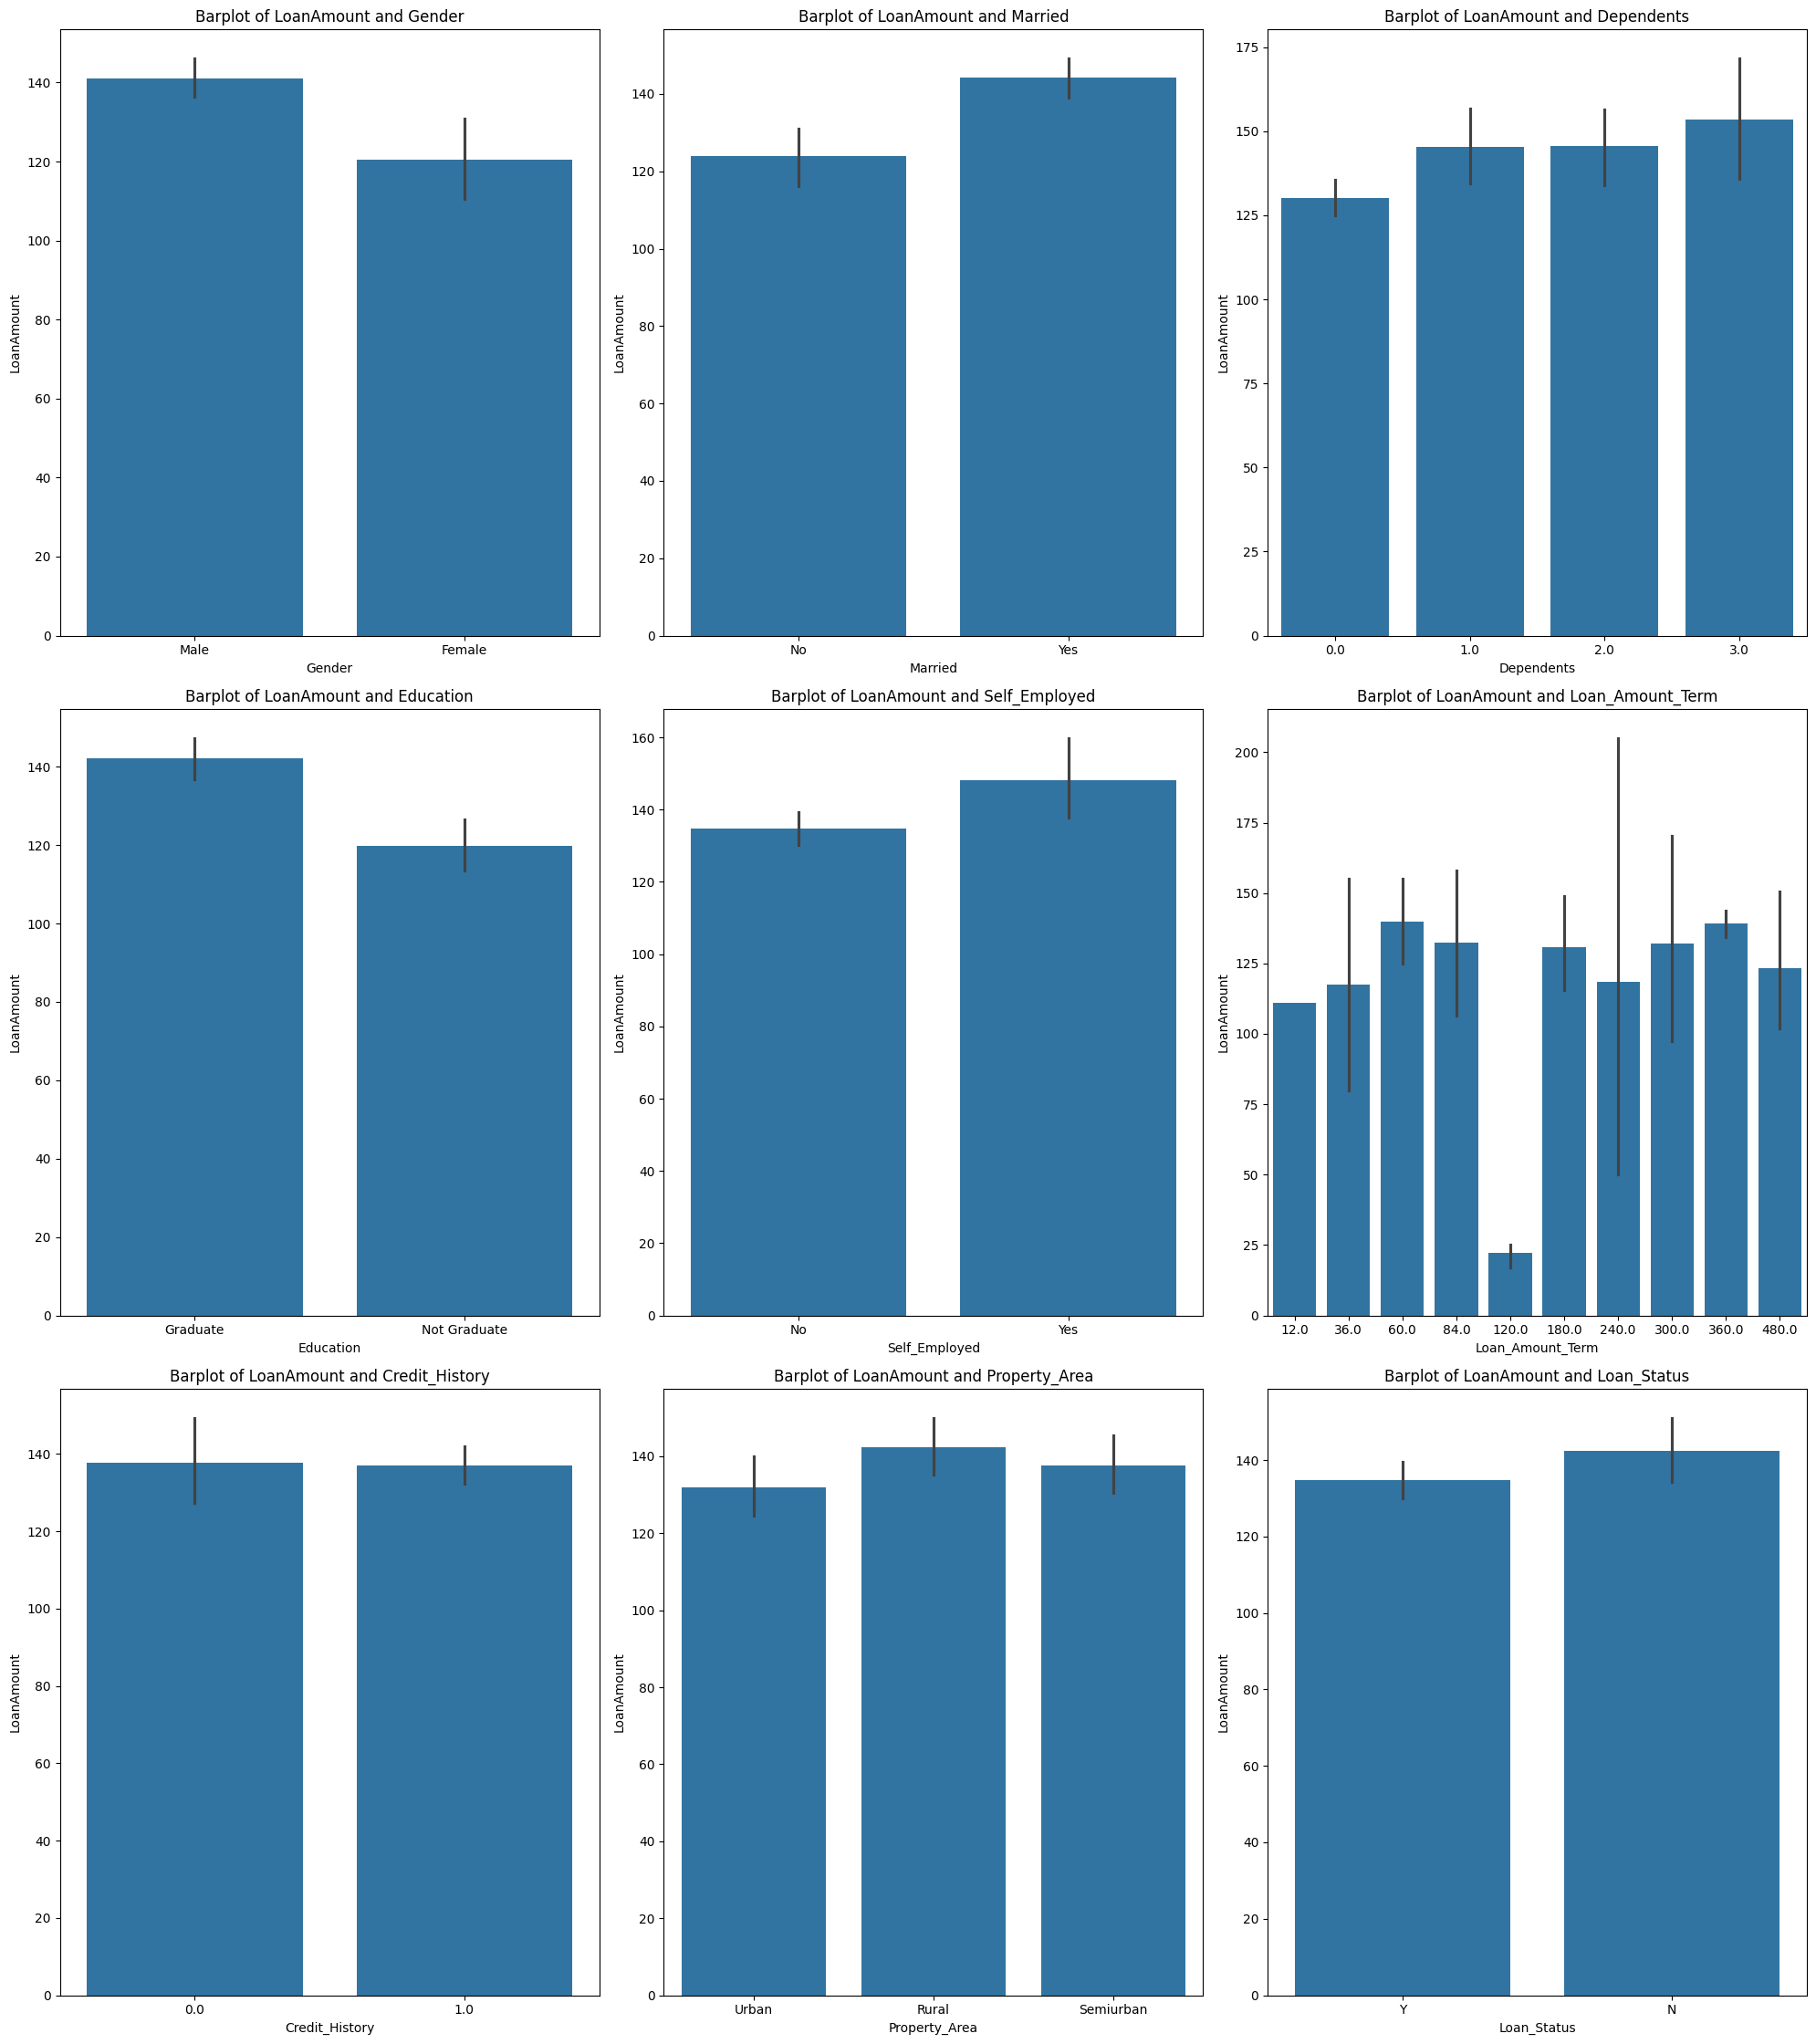

In [1215]:
variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area', 'Loan_Status']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    ax = sns.barplot(x=var, y='LoanAmount', data=df, ax=axes[i])
    ax.set_title(f'Barplot of LoanAmount and {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('LoanAmount')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

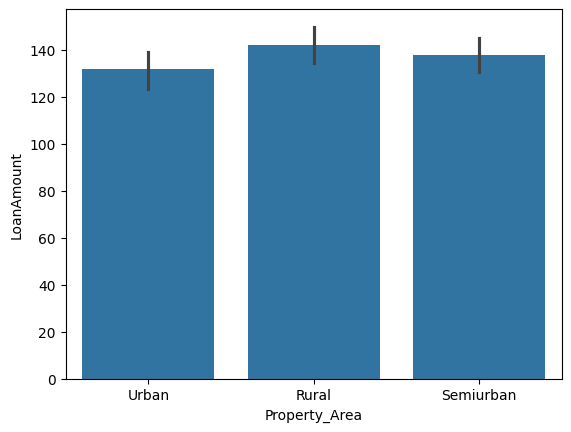

In [1216]:
sns.barplot(x ='Property_Area',y='LoanAmount',data =df)

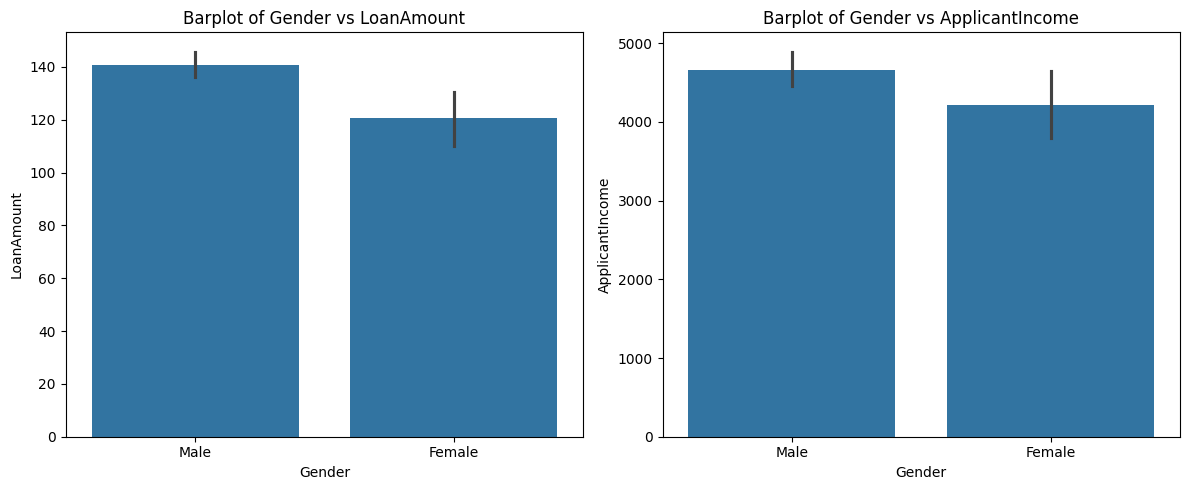

In [1217]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x ='Gender',y='LoanAmount',data =df, ax =axes[0])
axes[0].set_title('Barplot of Gender vs LoanAmount')

sns.barplot(x ='Gender',y='ApplicantIncome',data =df)
axes[1].set_title('Barplot of Gender vs ApplicantIncome')

plt.tight_layout()
plt.show()

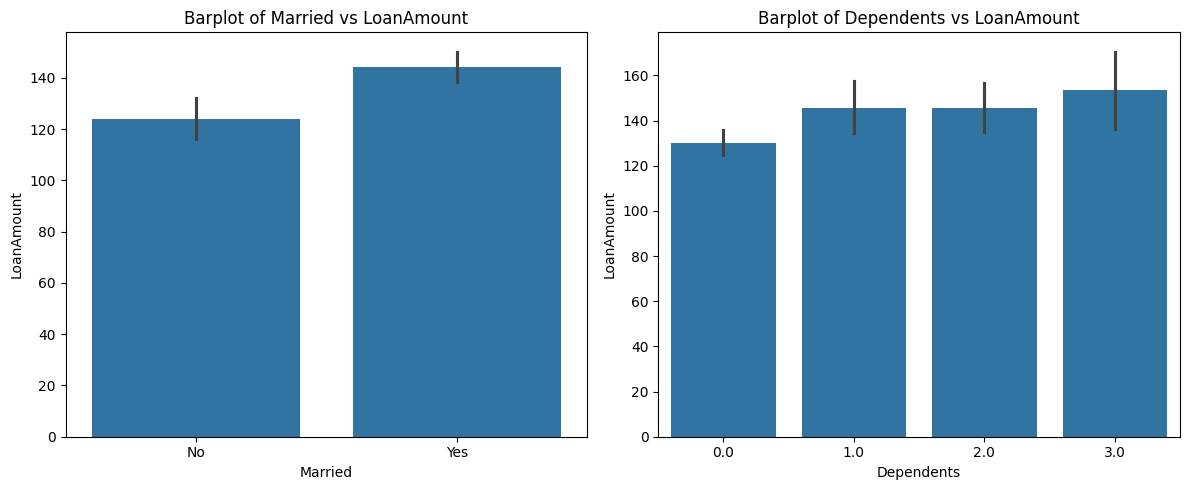

In [1218]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x ='Married',y='LoanAmount',data =df, ax =axes[0])
axes[0].set_title('Barplot of Married vs LoanAmount')

sns.barplot(x ='Dependents',y='LoanAmount',data =df)
axes[1].set_title('Barplot of Dependents vs LoanAmount')

plt.tight_layout()
plt.show()

<Axes: xlabel='Credit_History', ylabel='LoanAmount'>

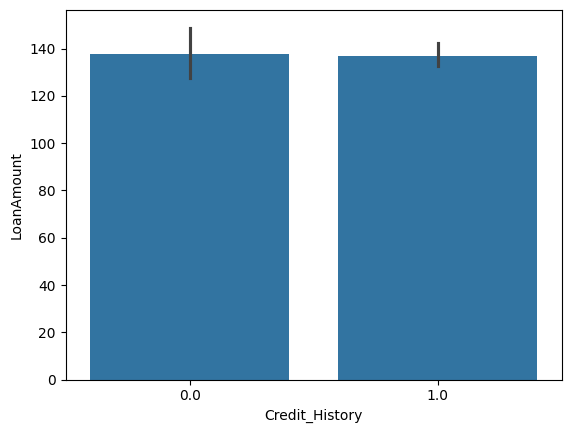

In [1219]:
sns.barplot(x ='Credit_History',y='LoanAmount',data =df)

### **Heatmap: Categorical - Categorical**

In [1220]:
pd.crosstab(df['Property_Area'],df['Loan_Status'])

Loan_Status     N    Y
Property_Area         
Rural          67  108
Semiurban      52  173
Urban          68  130

<Axes: xlabel='Loan_Status', ylabel='Property_Area'>

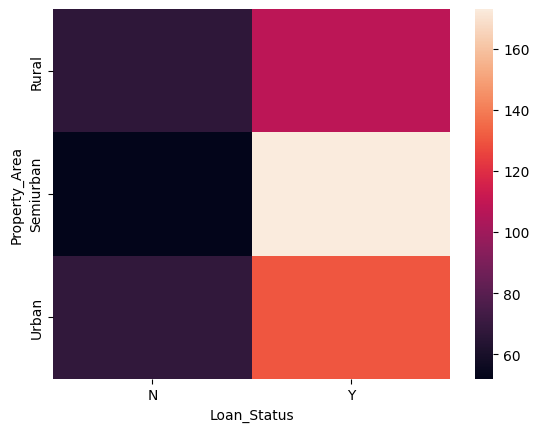

In [1221]:
sns.heatmap(pd.crosstab(df['Property_Area'],df['Loan_Status']))

**Heatmap of all Categorical variables vs Loan Status**

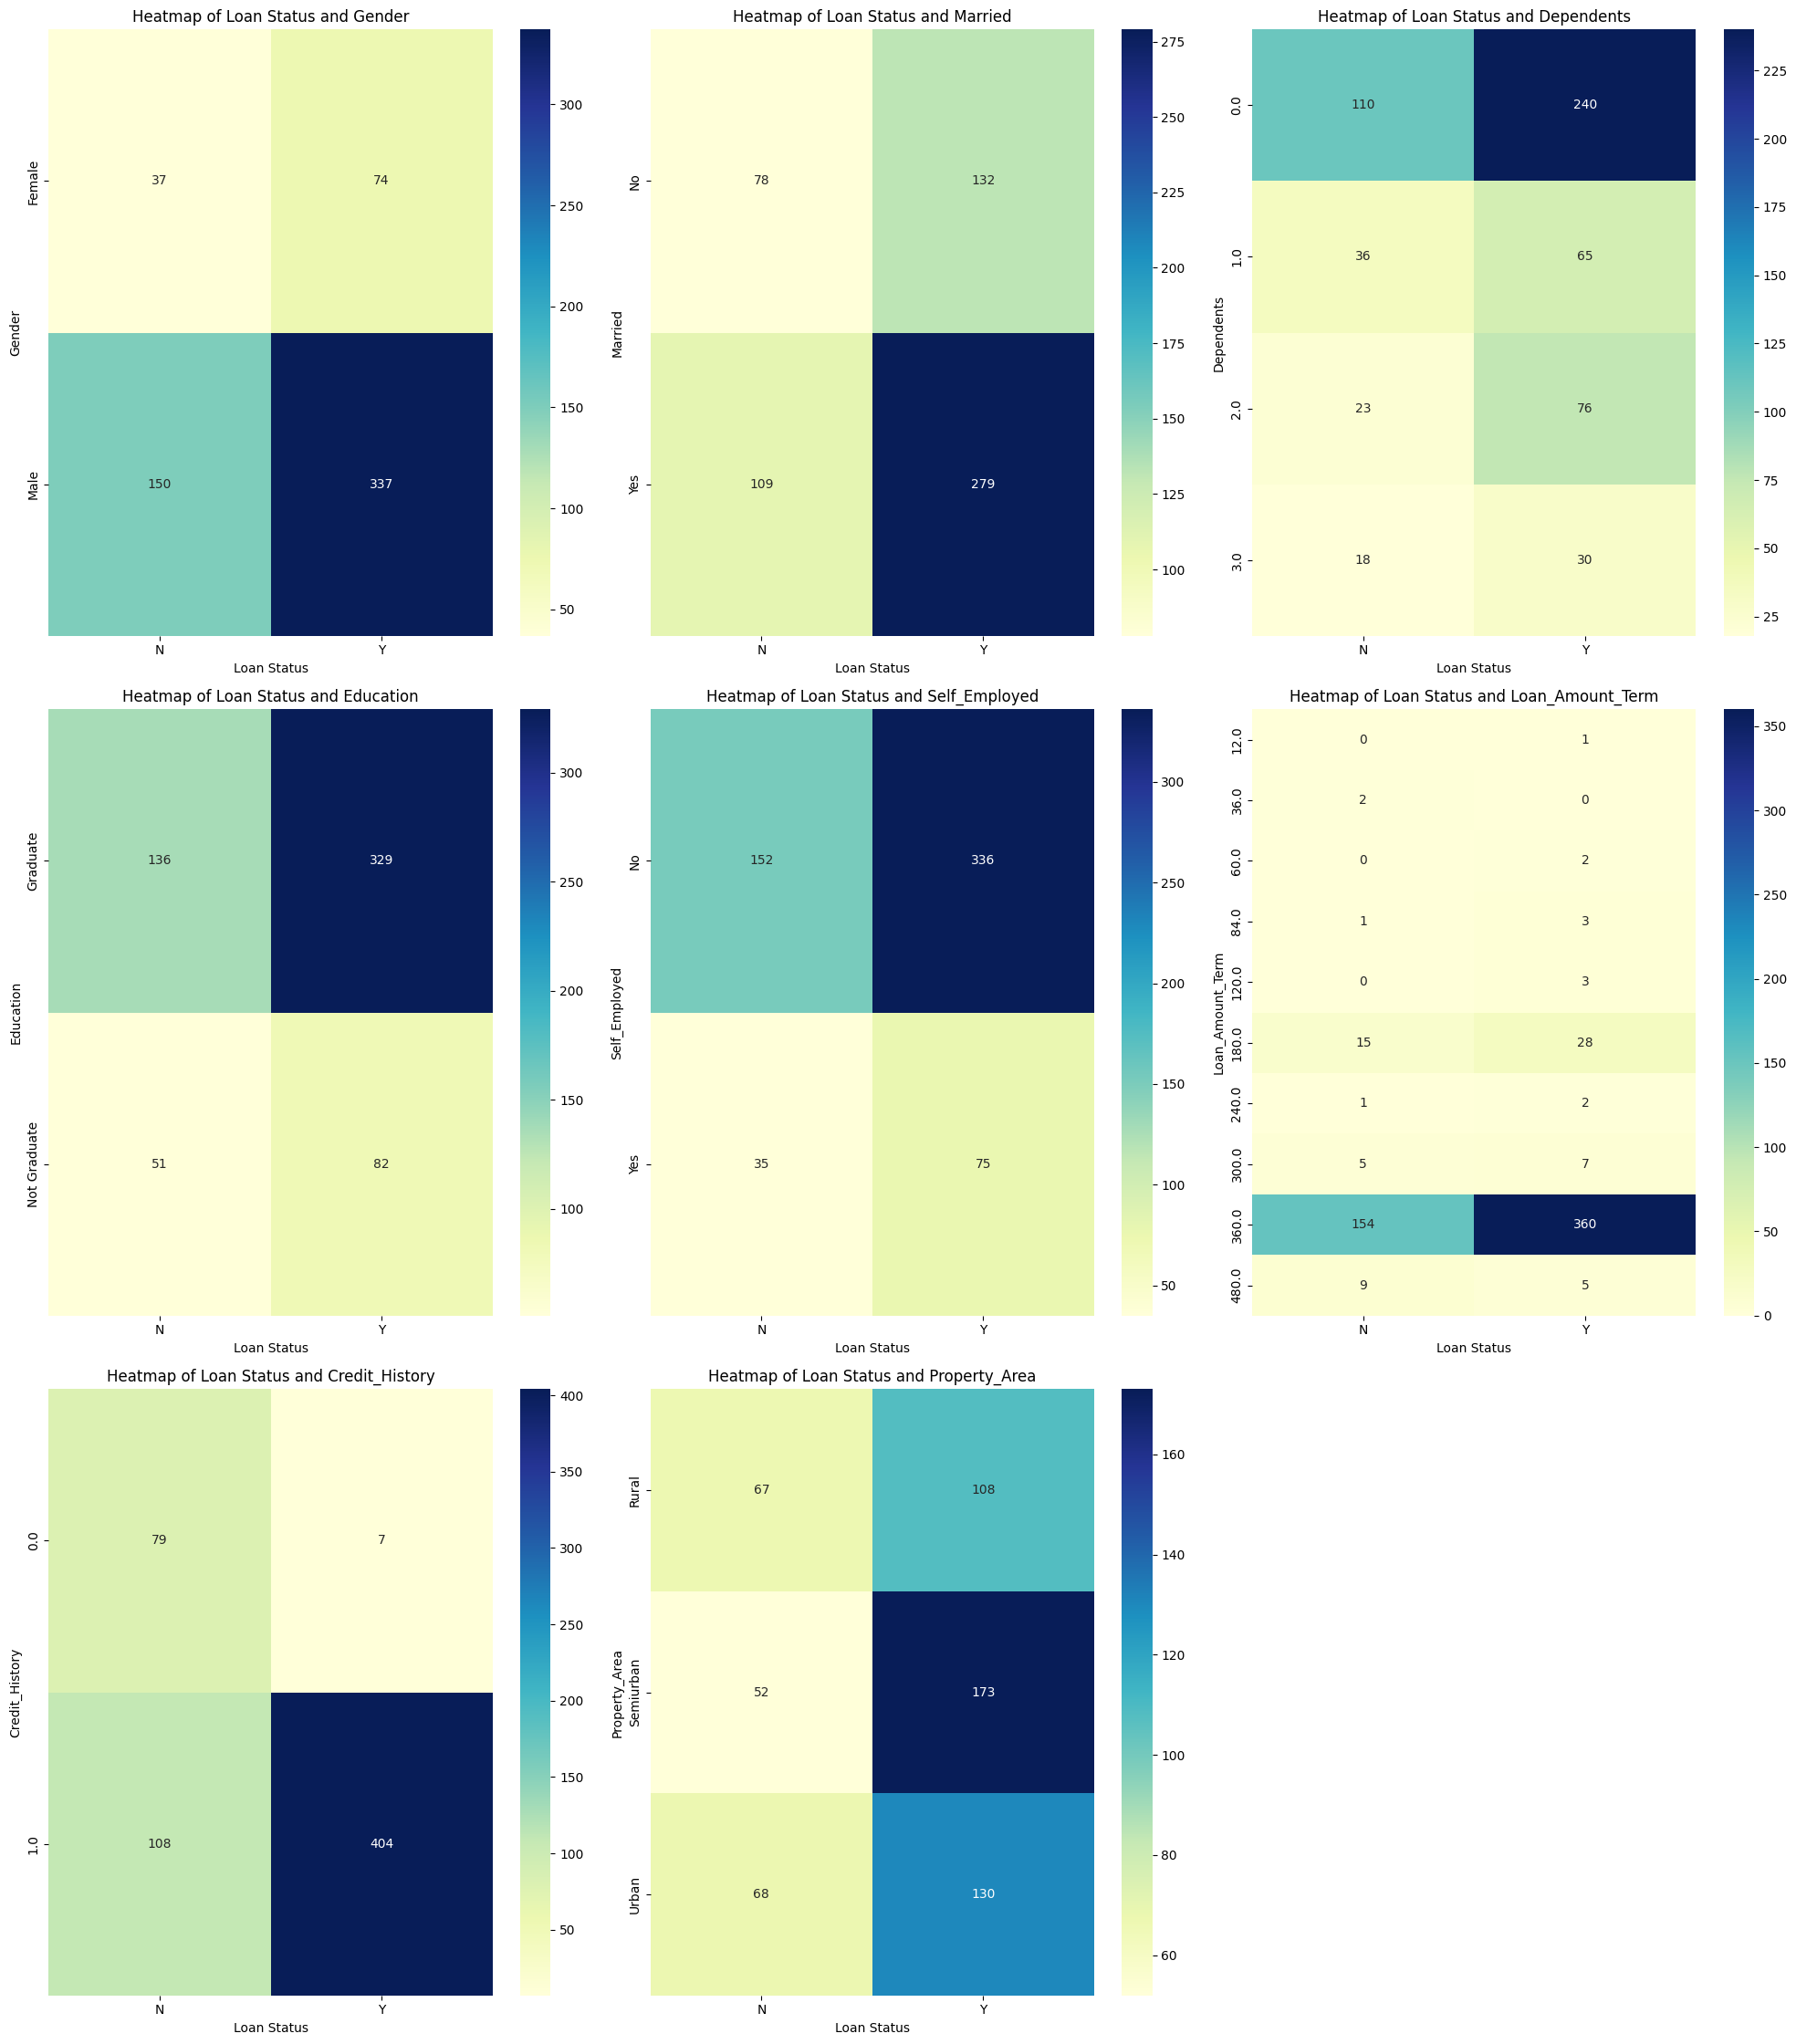

In [1222]:
# Variables to plot
variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    # Create the crosstab
    crosstab = pd.crosstab(df[var], df['Loan_Status'])
    # Plot the heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', ax=axes[i], cmap="YlGnBu")
    axes[i].set_title(f'Heatmap of Loan Status and {var}')
    axes[i].set_xlabel('Loan Status')
    axes[i].set_ylabel(var)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**Heatmap of all variables vs Gender**

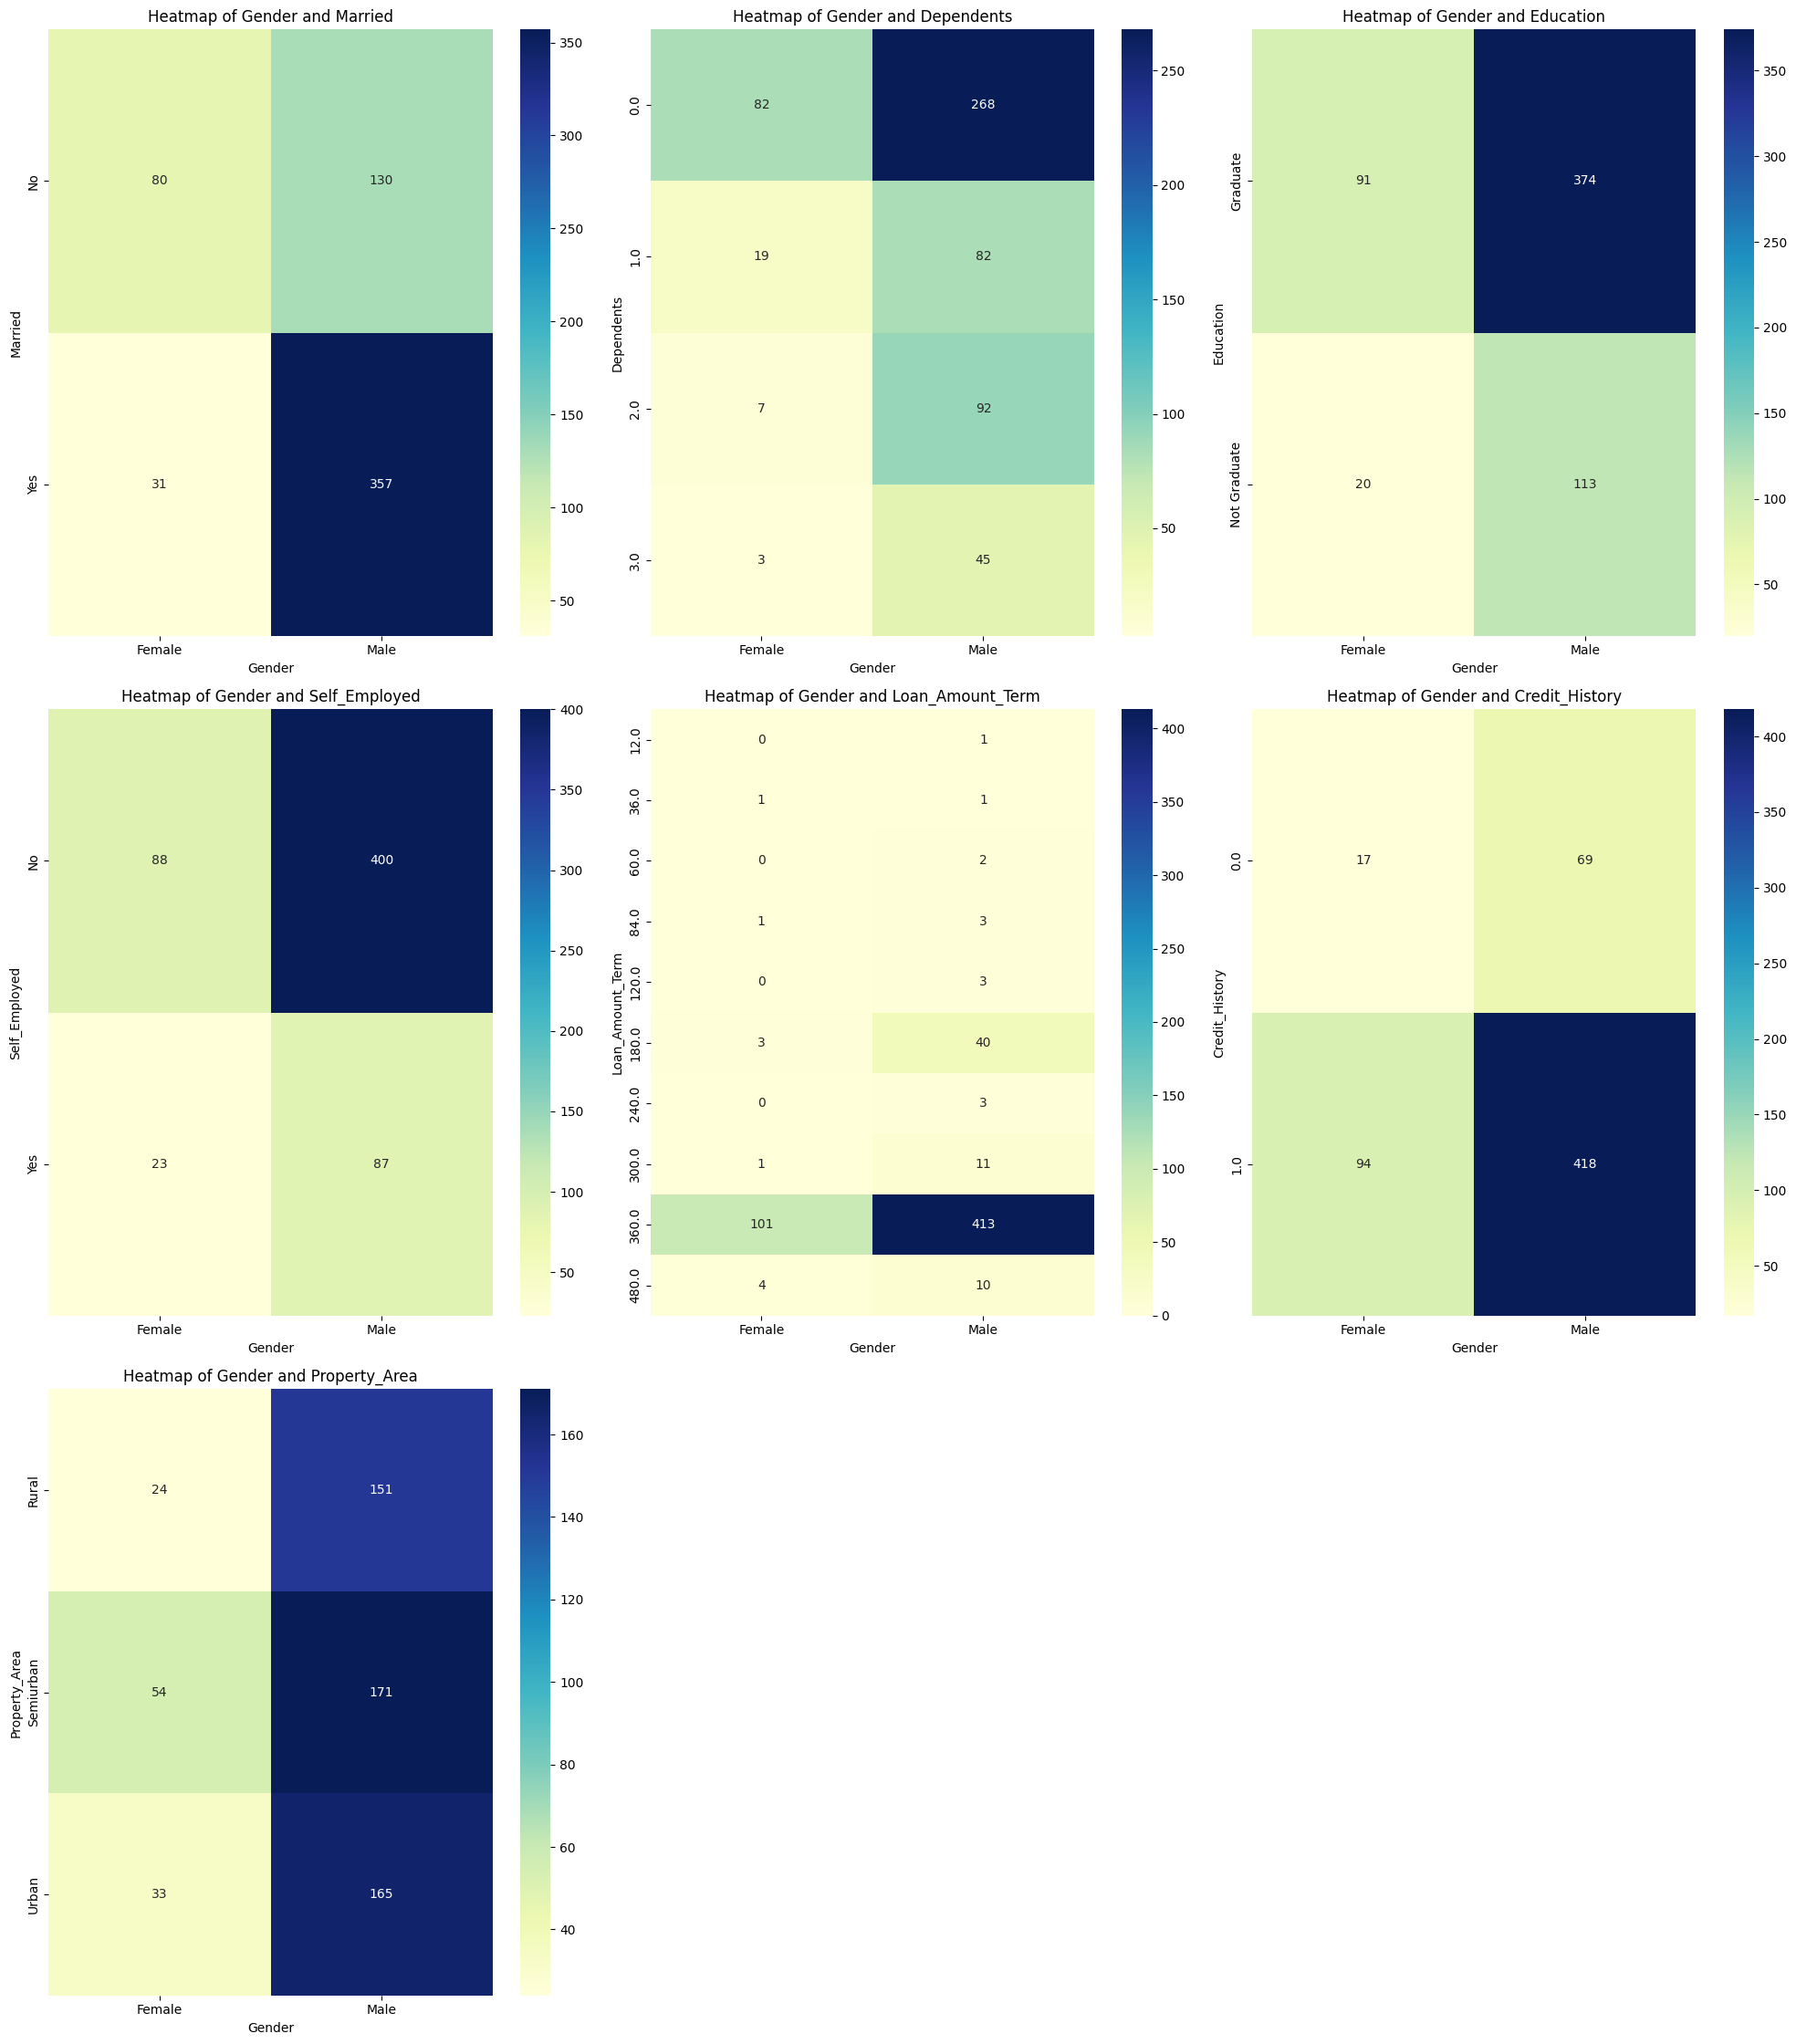

In [1223]:
variables = [ 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    # Create the crosstab
    crosstab = pd.crosstab(df[var], df['Gender'])
    # Plot the heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', ax=axes[i], cmap="YlGnBu")
    axes[i].set_title(f'Heatmap of Gender and {var}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(var)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

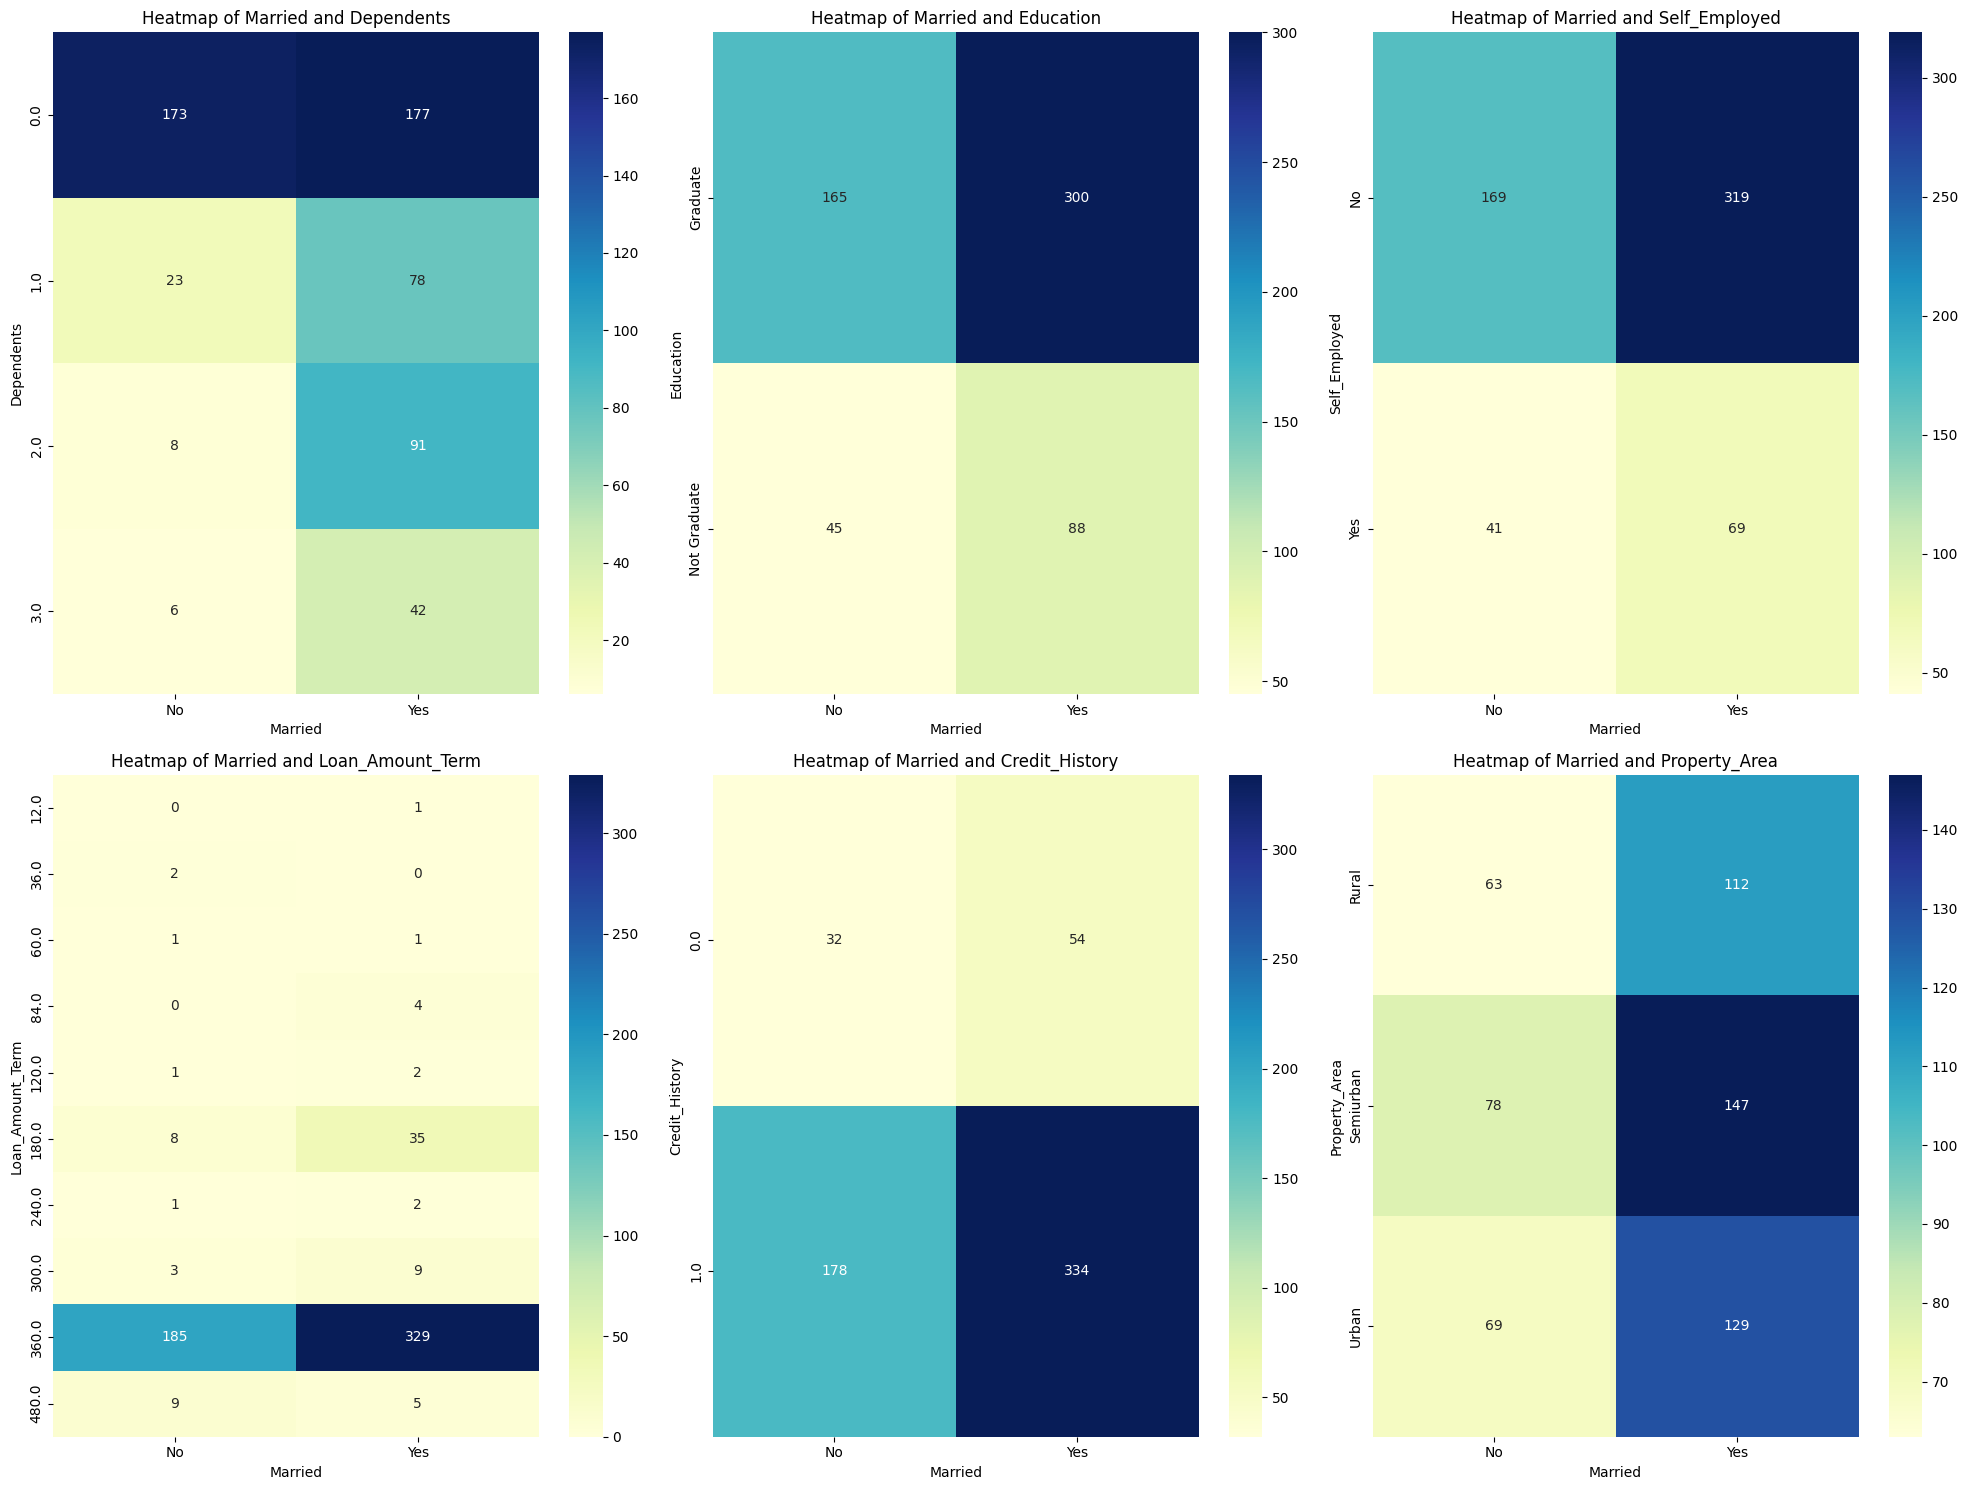

In [1224]:
variables = ['Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    # Create the crosstab
    crosstab = pd.crosstab(df[var], df['Married'])
    # Plot the heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', ax=axes[i], cmap="YlGnBu")
    axes[i].set_title(f'Heatmap of Married and {var}')
    axes[i].set_xlabel('Married')
    axes[i].set_ylabel(var)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

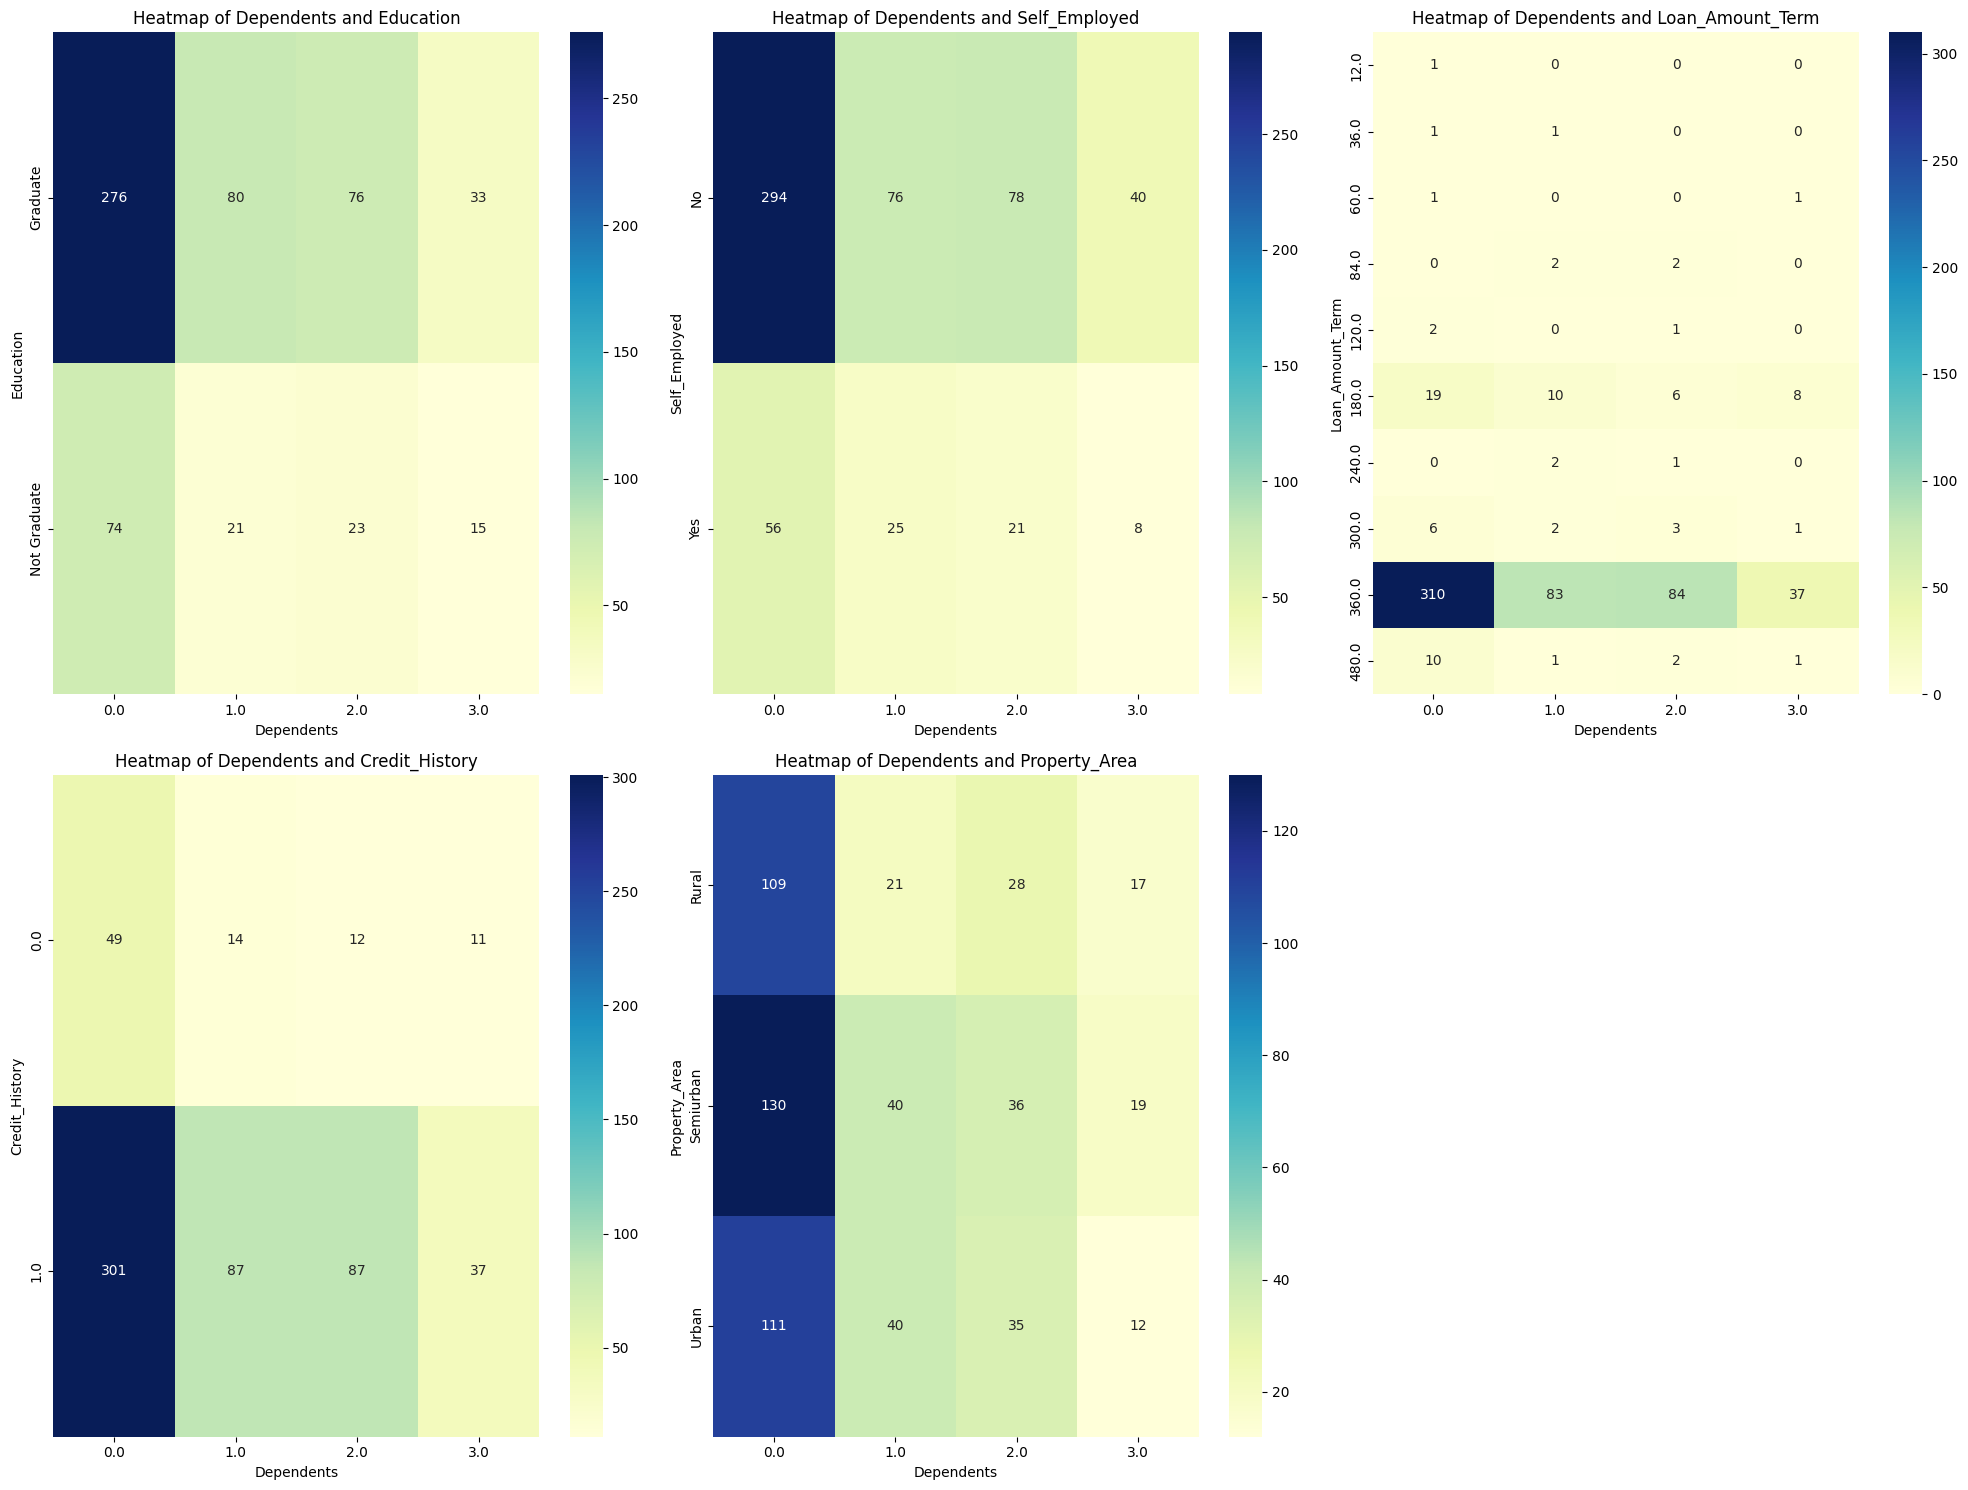

In [1225]:
variables = ['Education', 'Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    # Create the crosstab
    crosstab = pd.crosstab(df[var], df['Dependents'])
    # Plot the heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', ax=axes[i], cmap="YlGnBu")
    axes[i].set_title(f'Heatmap of Dependents and {var}')
    axes[i].set_xlabel('Dependents')
    axes[i].set_ylabel(var)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

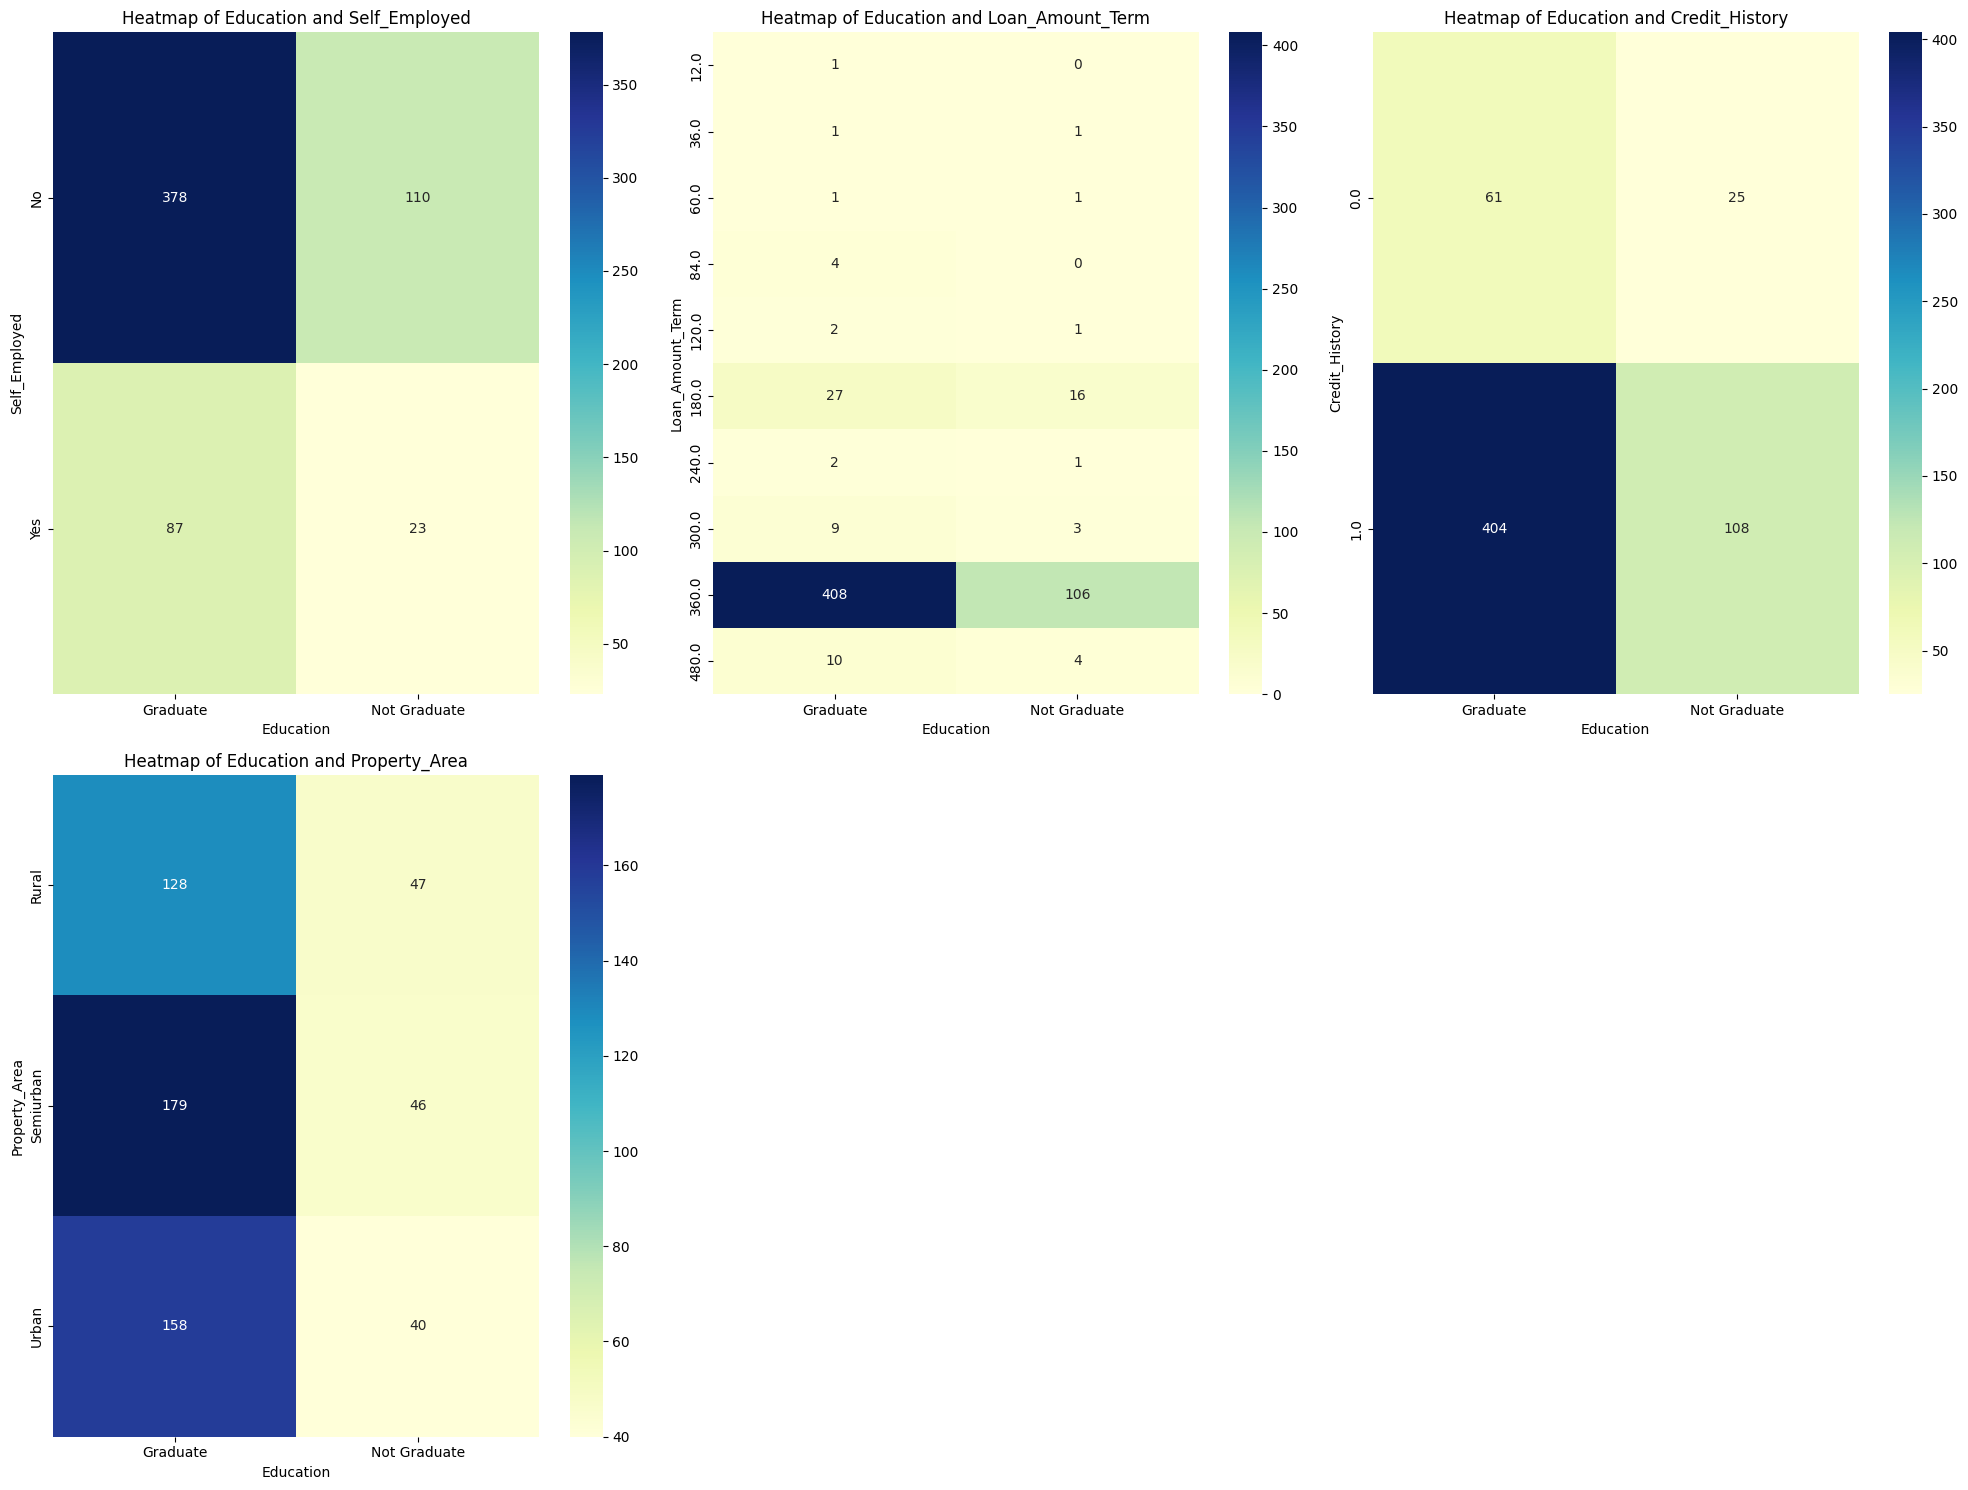

In [1226]:
variables = ['Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    # Create the crosstab
    crosstab = pd.crosstab(df[var], df['Education'])
    # Plot the heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', ax=axes[i], cmap="YlGnBu")
    axes[i].set_title(f'Heatmap of Education and {var}')
    axes[i].set_xlabel('Education')
    axes[i].set_ylabel(var)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

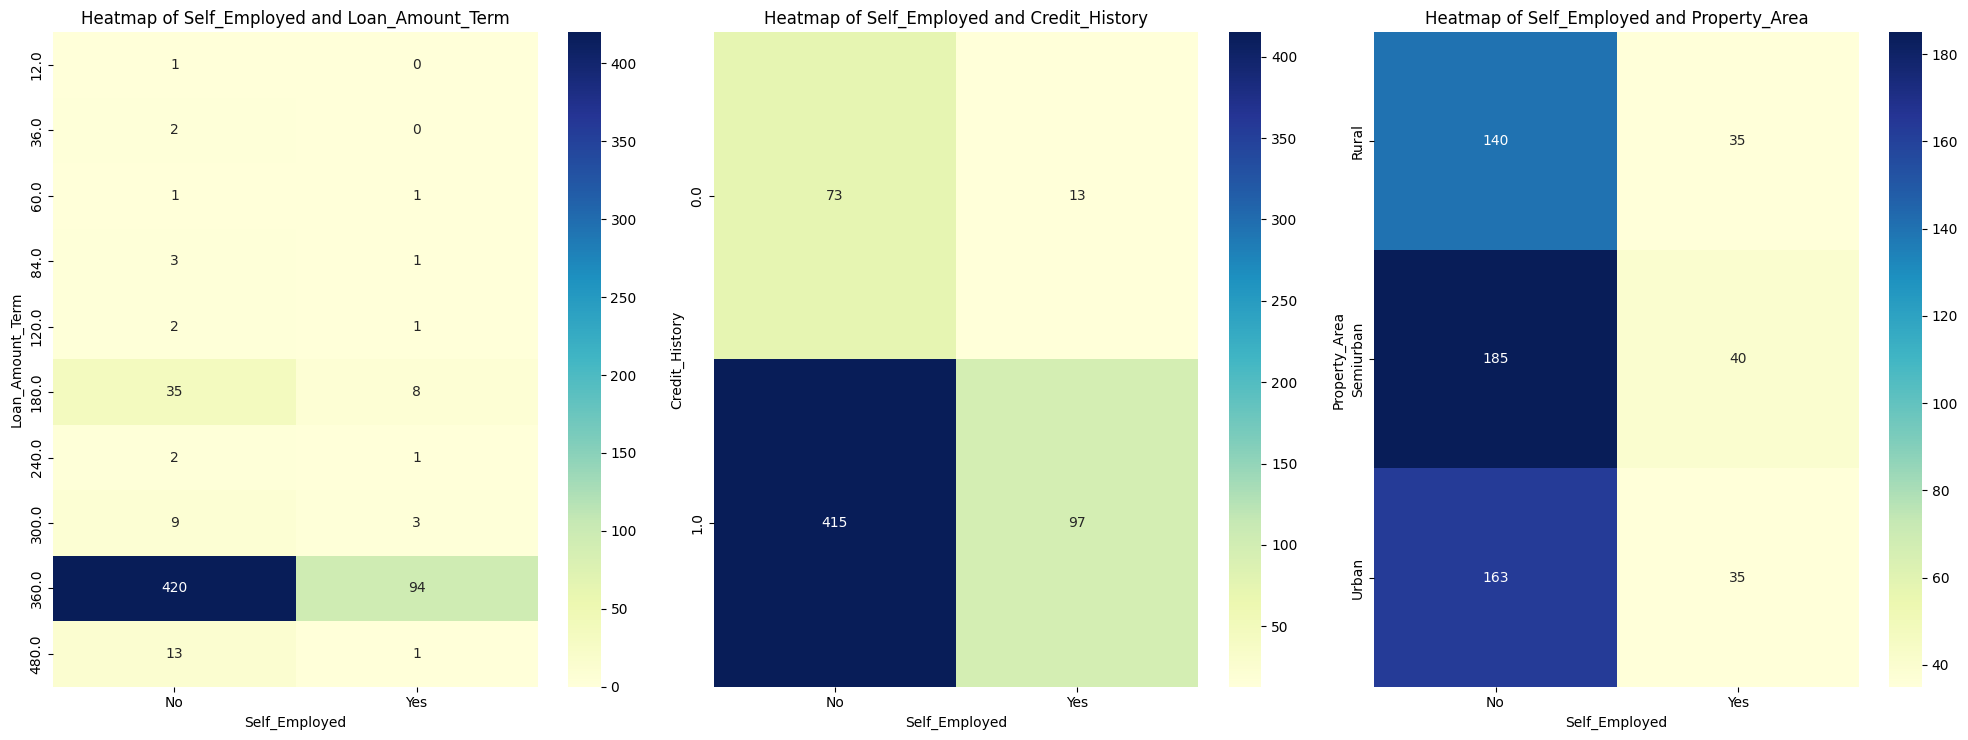

In [1227]:
variables = [ 'Loan_Amount_Term','Credit_History','Property_Area']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    # Create the crosstab
    crosstab = pd.crosstab(df[var], df['Self_Employed'])
    # Plot the heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', ax=axes[i], cmap="YlGnBu")
    axes[i].set_title(f'Heatmap of Self_Employed and {var}')
    axes[i].set_xlabel('Self_Employed')
    axes[i].set_ylabel(var)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

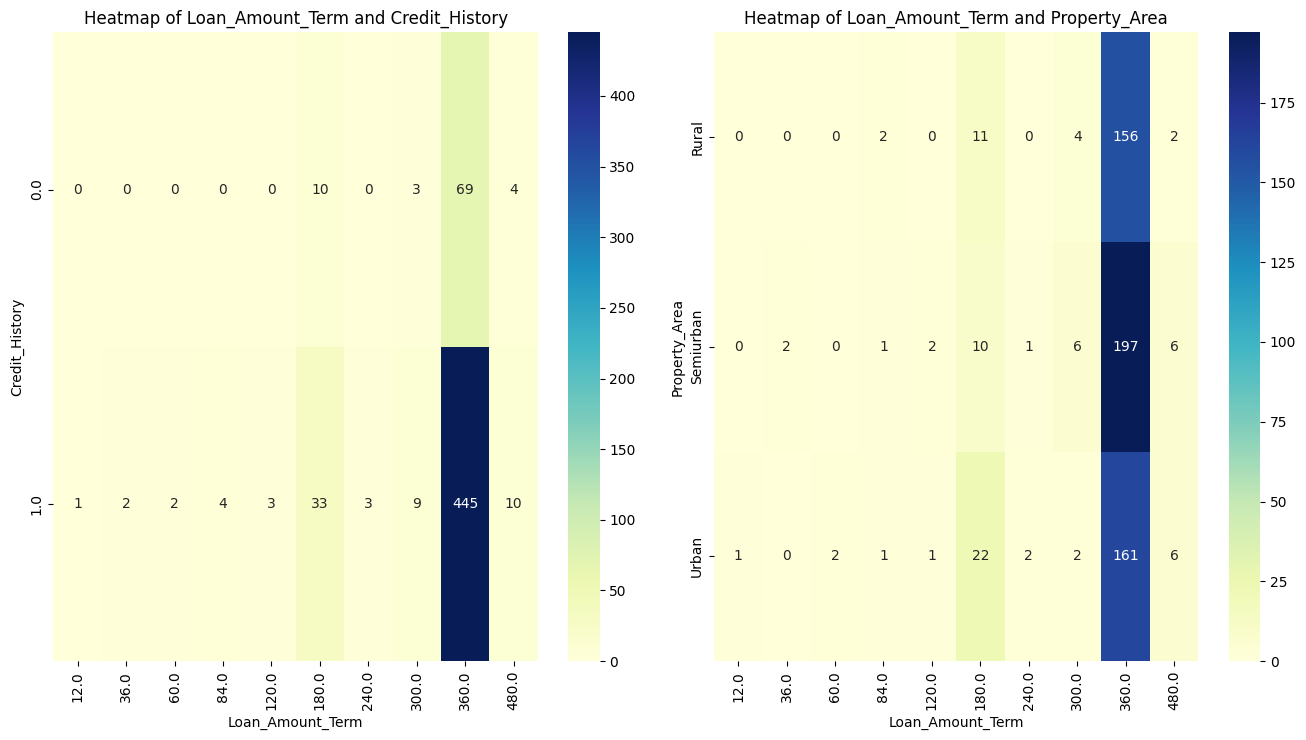

In [1228]:
variables = [ 'Credit_History','Property_Area']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    # Create the crosstab
    crosstab = pd.crosstab(df[var], df['Loan_Amount_Term'])
    # Plot the heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', ax=axes[i], cmap="YlGnBu")
    axes[i].set_title(f'Heatmap of Loan_Amount_Term and {var}')
    axes[i].set_xlabel('Loan_Amount_Term')
    axes[i].set_ylabel(var)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

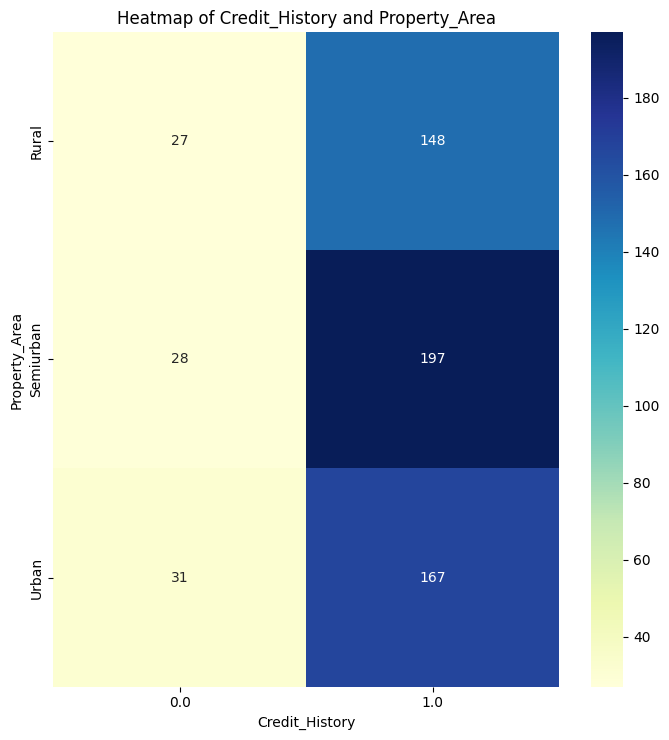

In [1229]:
variables = [ 'Property_Area']

# Determine the grid size
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7.5 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    # Create the crosstab
    crosstab = pd.crosstab(df[var], df['Credit_History'])
    # Plot the heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', ax=axes[i], cmap="YlGnBu")
    axes[i].set_title(f'Heatmap of Credit_History and {var}')
    axes[i].set_xlabel('Credit_History')
    axes[i].set_ylabel(var)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Multivariate Analysis

### **Numerical Variables**

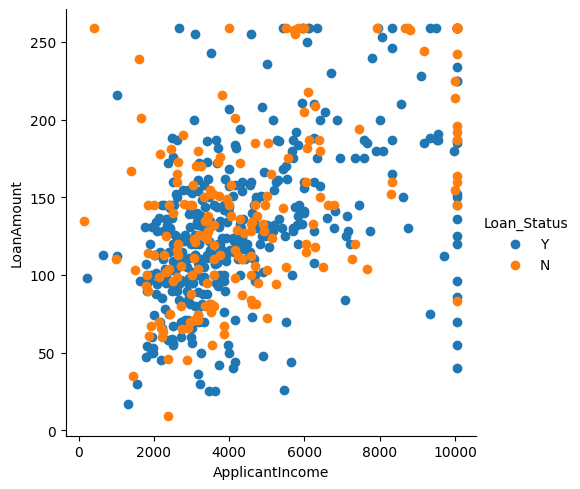

In [1230]:
sns.FacetGrid(df, hue="Loan_Status", height=5).map(plt.scatter, "ApplicantIncome", "LoanAmount").add_legend()
plt.show()

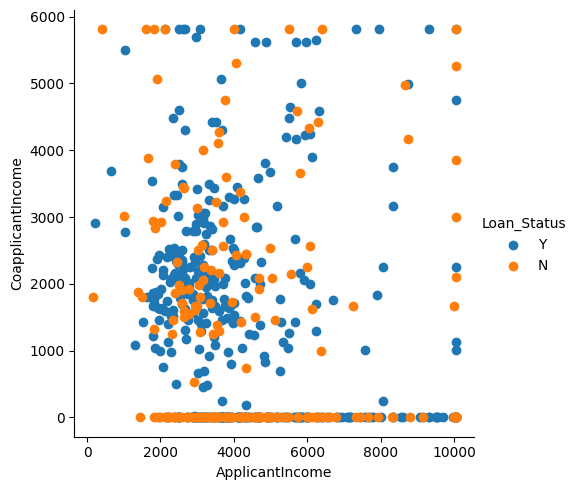

In [1231]:
sns.FacetGrid(df, hue="Loan_Status", height=5).map(plt.scatter, "ApplicantIncome", "CoapplicantIncome").add_legend()
plt.show()

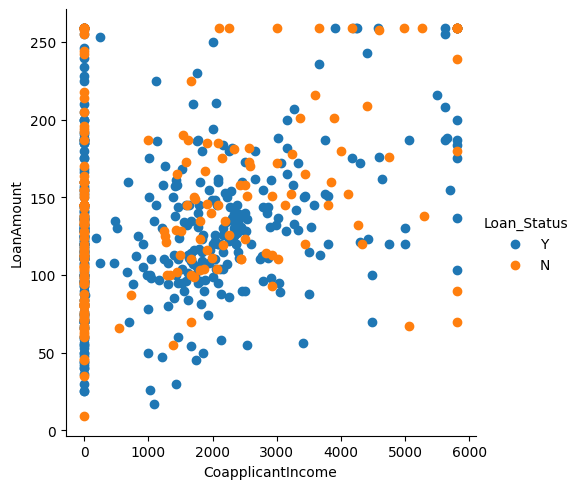

In [1232]:
sns.FacetGrid(df, hue="Loan_Status", height=5).map(plt.scatter, "CoapplicantIncome",'LoanAmount').add_legend()
plt.show()

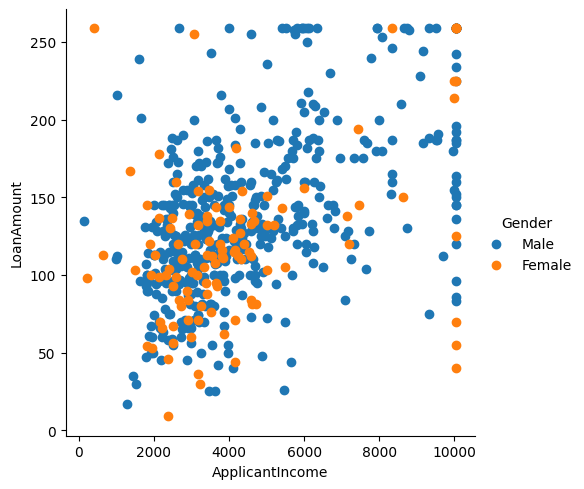

In [1233]:
sns.FacetGrid(df, hue="Gender", height=5).map(plt.scatter, "ApplicantIncome",'LoanAmount').add_legend()
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

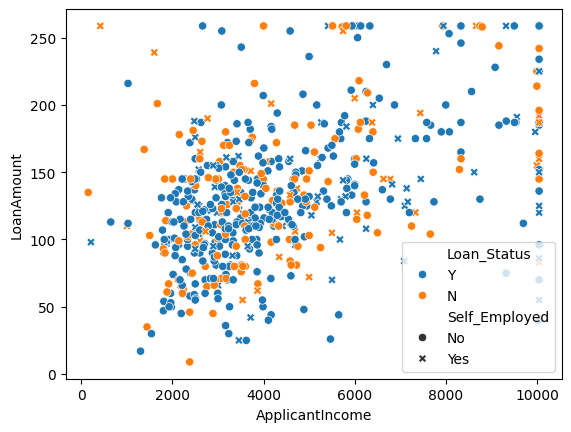

In [1234]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status',style= 'Self_Employed', data=df)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

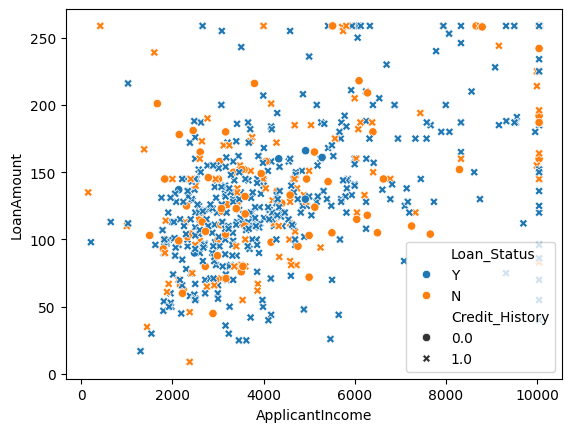

In [1235]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status',style= 'Credit_History', data=df)

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

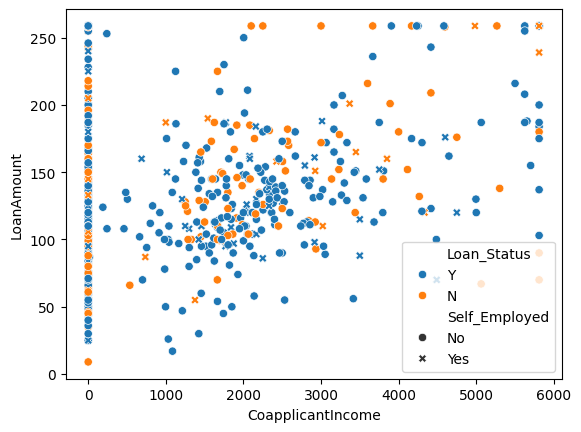

In [1236]:
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status',style= 'Self_Employed', data=df)

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

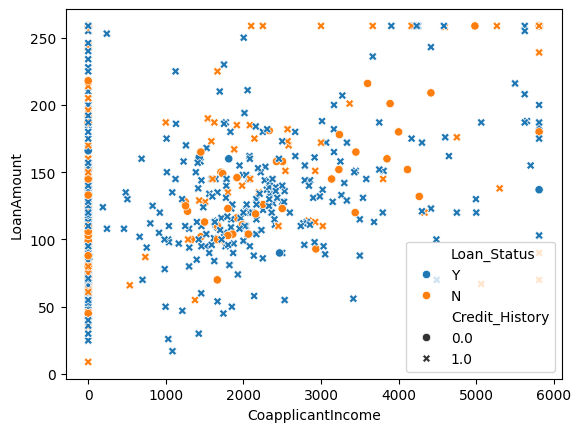

In [1237]:
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status',style= 'Credit_History', data=df)

<Axes: xlabel='Education', ylabel='LoanAmount'>

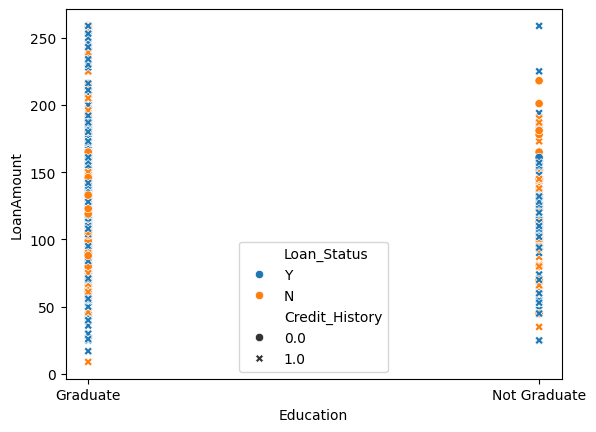

In [1238]:
sns.scatterplot(x='Education', y='LoanAmount', hue='Loan_Status',style= 'Credit_History', data=df)

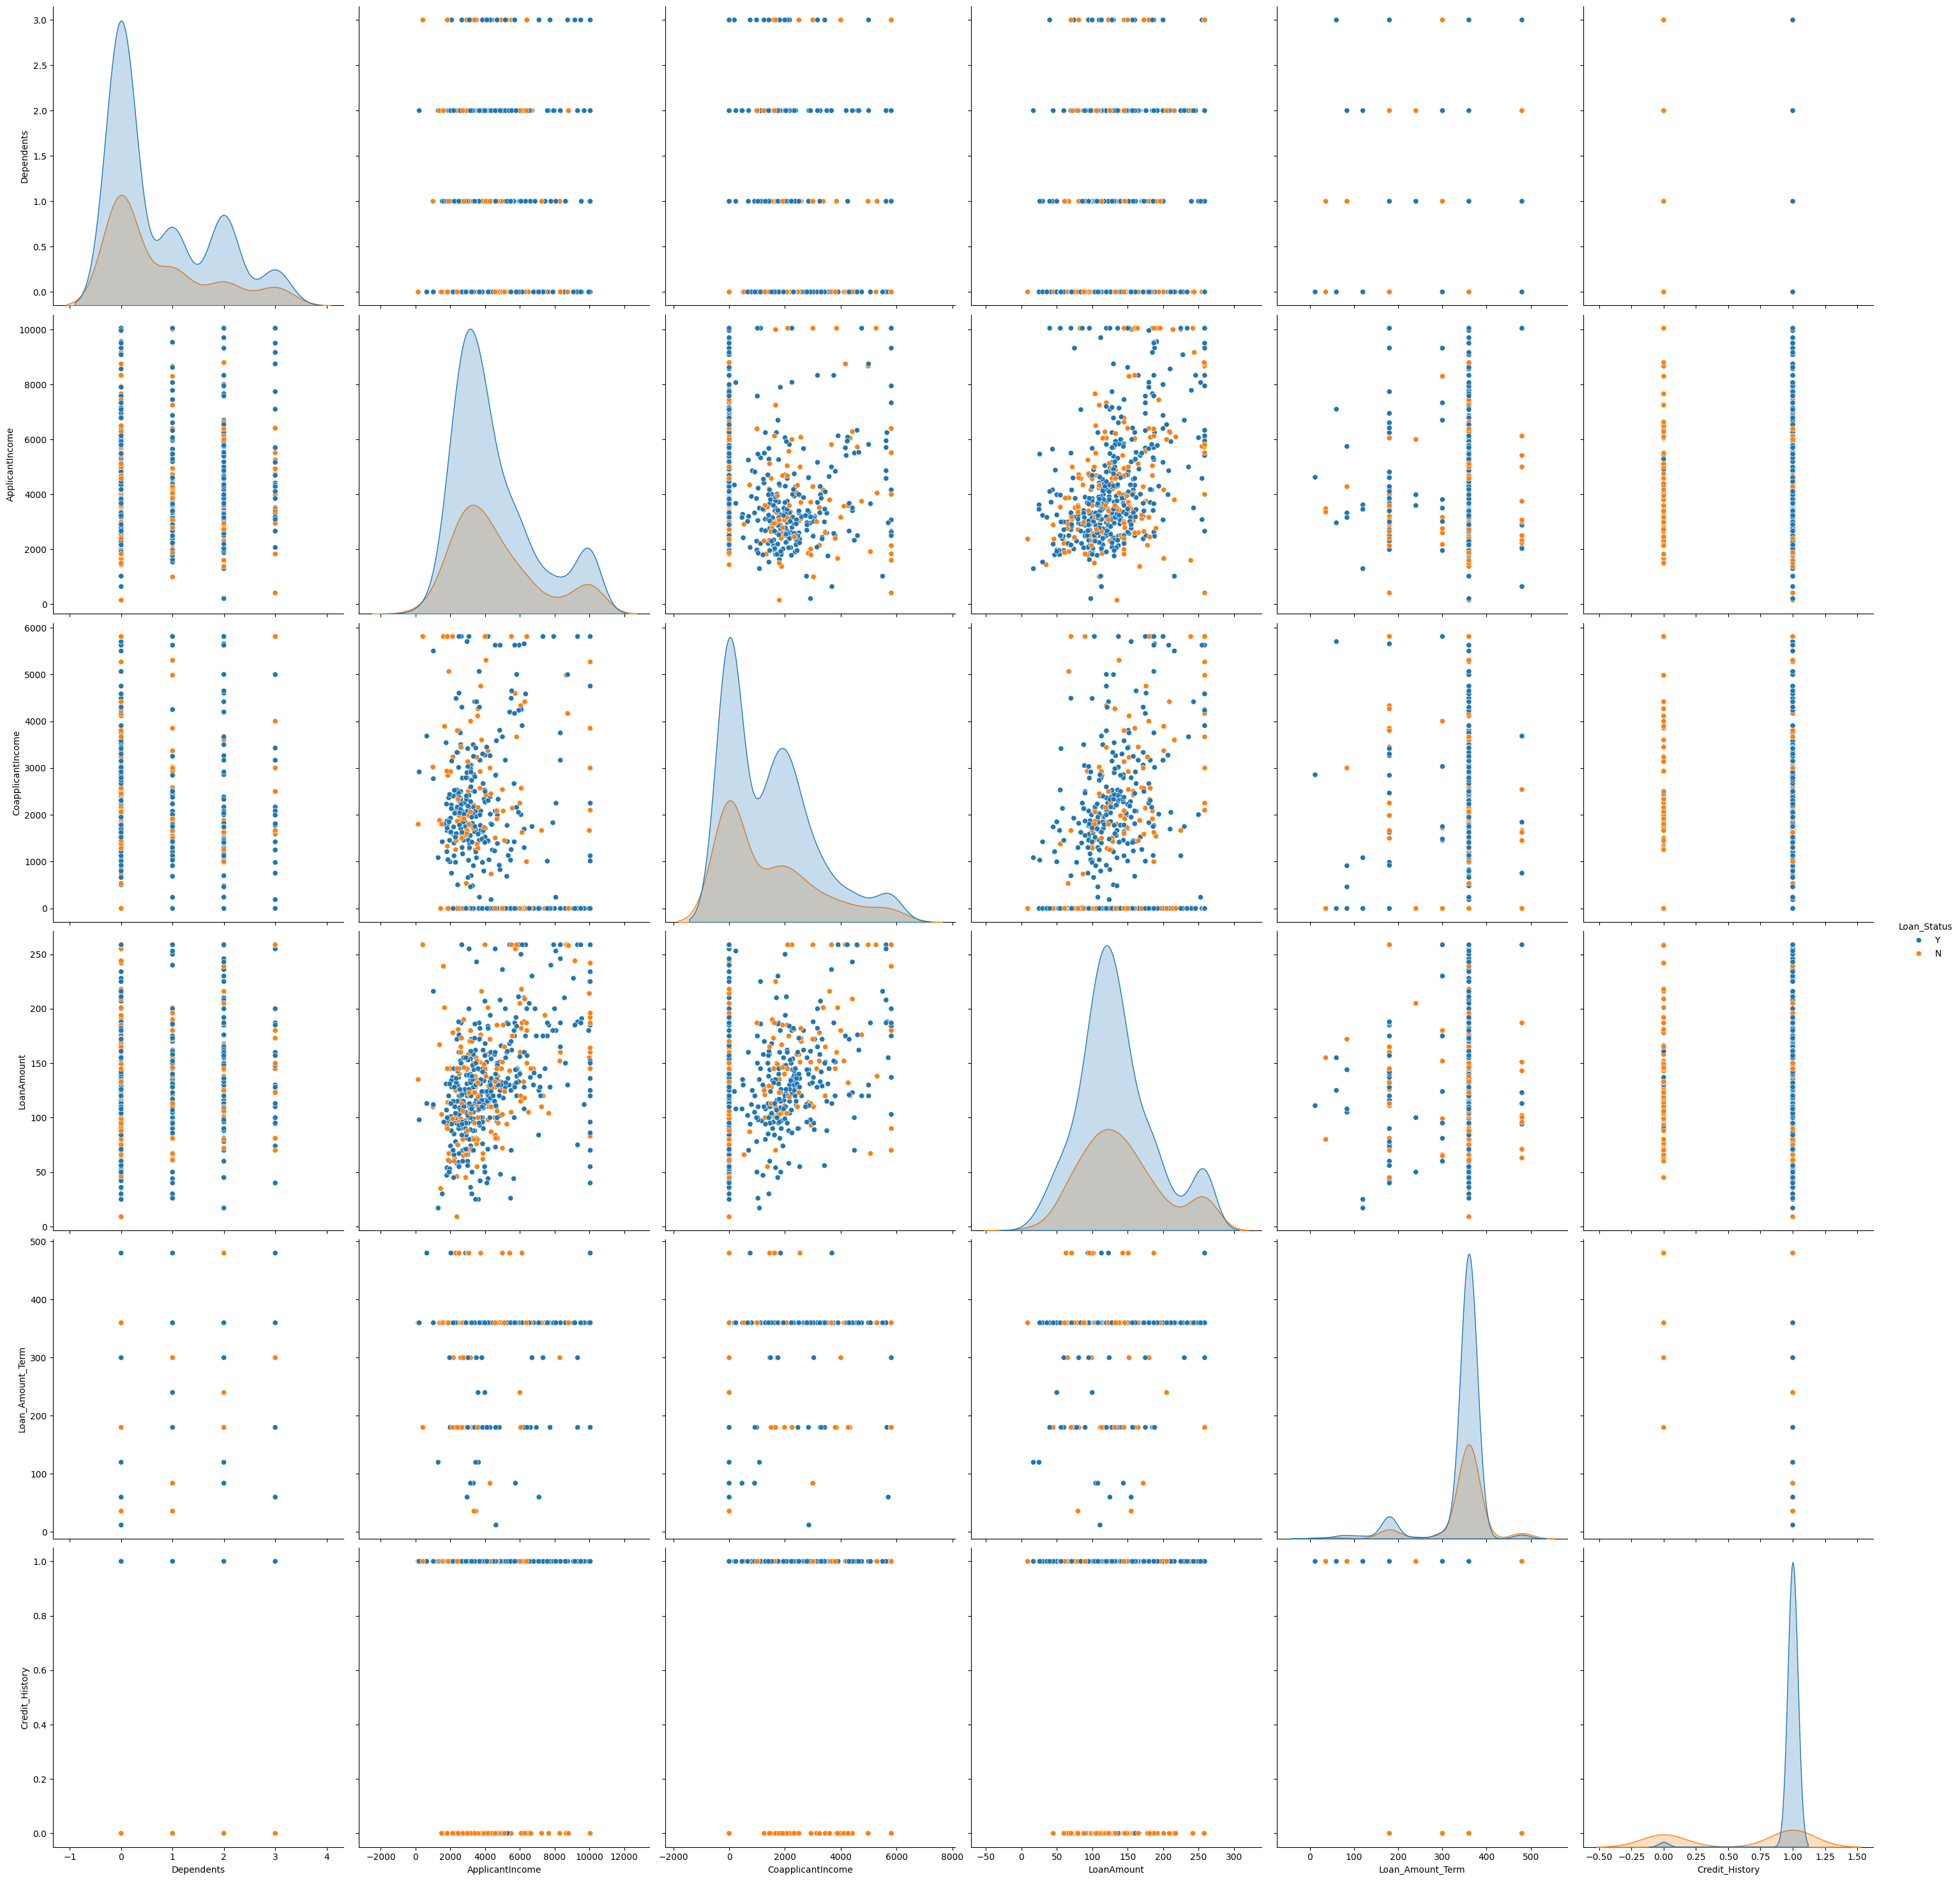

In [1239]:
sns.pairplot(df, hue='Loan_Status', height = 5)

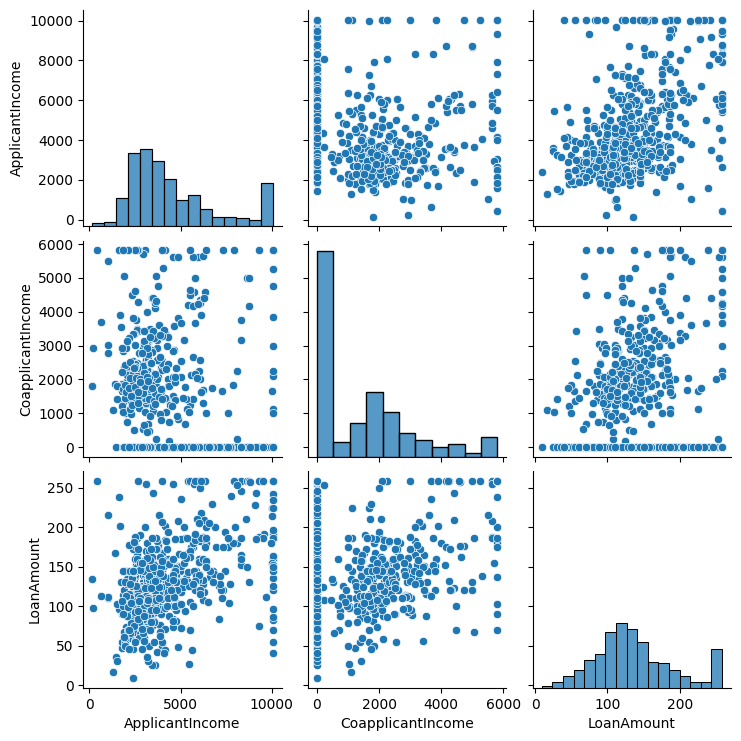

In [1240]:
sns.pairplot(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

# **Data Normalization**

Normalizing using Simple Feature Scalling: Applicant income, Coapplicant income, Loan Amount and Loan Amount Term.

In [1241]:
df['CoapplicantIncome'] = df['CoapplicantIncome']/df['CoapplicantIncome'].max()

In [1242]:
df['ApplicantIncome'] = df['ApplicantIncome']/df['ApplicantIncome'].max()

In [1243]:
df['LoanAmount'] = df['LoanAmount']/df['LoanAmount'].max()

In [1244]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/df['Loan_Amount_Term'].max()

In [1245]:
df.head(10)

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No         0.0      Graduate            No         0.582062   
1   Male     Yes         1.0      Graduate            No         0.456077   
2   Male     Yes         0.0      Graduate           Yes         0.298545   
3   Male     Yes         0.0  Not Graduate            No         0.257047   
4   Male      No         0.0      Graduate            No         0.597089   
5   Male     Yes         2.0      Graduate           Yes         0.539072   
6   Male     Yes         0.0  Not Graduate            No         0.232168   
7   Male     Yes         3.0      Graduate            No         0.302127   
8   Male     Yes         2.0      Graduate            No         0.398657   
9   Male     Yes         1.0      Graduate            No         1.000000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    0.560266              0.75             1.0   
1           0.259552    0.494686              0.75             1.0   
2           0.000000    0.255072              0.75             1.0   
3           0.405852    0.463768              0.75             1.0   
4           0.000000    0.544928              0.75             1.0   
5           0.722203    1.000000              0.75             1.0   
6           0.260929    0.367150              0.75             1.0   
7           0.430981    0.610628              0.75             0.0   
8           0.262651    0.649275              0.75             1.0   
9           1.000000    1.000000              0.75             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y  
5         Urban           Y  
6         Urban           Y  
7     Semiurban           N  
8         Urban           Y  
9     Semiurban           N

# **Converting Categorical Variables to Numeric: One hot encoding**

Categorical variables (Gender, Married, Education, Self_Employed,Property_Area)  to numerical variables:

In [1246]:
#df['Dependents'] = df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})

In [1247]:
dummy_variable_1 = pd.get_dummies(df[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']], drop_first=True).astype(int)
dummy_variable_1.head()
#dummy_variable_1 = pd.get_dummies(df[["Gender",'Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']], drop_first=True).astype(int)
dummy_variable_1.head()

Gender_Male  Married_Yes  Education_Not Graduate  Self_Employed_Yes  \
0            1            0                       0                  0   
1            1            1                       0                  0   
2            1            1                       0                  1   
3            1            1                       1                  0   
4            1            0                       0                  0   

   Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  
0                        0                    1              1  
1                        0                    0              0  
2                        0                    1              1  
3                        0                    1              1  
4                        0                    1              1

In [1248]:
# dummy_variable_2 = pd.get_dummies(df[['Property_Area']]).astype(int)
# dummy_variable_2.head(20)

In [1249]:
df.head()

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No         0.0      Graduate            No         0.582062   
1   Male     Yes         1.0      Graduate            No         0.456077   
2   Male     Yes         0.0      Graduate           Yes         0.298545   
3   Male     Yes         0.0  Not Graduate            No         0.257047   
4   Male      No         0.0      Graduate            No         0.597089   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    0.560266              0.75             1.0   
1           0.259552    0.494686              0.75             1.0   
2           0.000000    0.255072              0.75             1.0   
3           0.405852    0.463768              0.75             1.0   
4           0.000000    0.544928              0.75             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [1250]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)
#df = pd.concat([df, dummy_variable_1, dummy_variable_2], axis=1)

# drop original column "Gender, Married,Education,Self_Employed,Property_Area from "df"
df.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'], axis = 1, inplace=True)

In [1251]:
df.head(10)

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0         0.0         0.582062           0.000000    0.560266   
1         1.0         0.456077           0.259552    0.494686   
2         0.0         0.298545           0.000000    0.255072   
3         0.0         0.257047           0.405852    0.463768   
4         0.0         0.597089           0.000000    0.544928   
5         2.0         0.539072           0.722203    1.000000   
6         0.0         0.232168           0.260929    0.367150   
7         3.0         0.302127           0.430981    0.610628   
8         2.0         0.398657           0.262651    0.649275   
9         1.0         1.000000           1.000000    1.000000   

   Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
0              0.75             1.0            1            0   
1              0.75             1.0            1            1   
2              0.75             1.0            1            1   
3              0.75             1.0            1            1   
4              0.75             1.0            1            0   
5              0.75             1.0            1            1   
6              0.75             1.0            1            1   
7              0.75             0.0            1            1   
8              0.75             1.0            1            1   
9              0.75             1.0            1            1   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  1                        0   
3                       1                  0                        0   
4                       0                  0                        0   
5                       0                  1                        0   
6                       1                  0                        0   
7                       0                  0                        1   
8                       0                  0                        0   
9                       0                  0                        1   

   Property_Area_Urban  Loan_Status_Y  
0                    1              1  
1                    0              0  
2                    1              1  
3                    1              1  
4                    1              1  
5                    1              1  
6                    1              1  
7                    0              0  
8                    1              1  
9                    0              0

# Split Train and Test sets

In [1255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Loan_Status_Y'], axis=1), df['Loan_Status_Y'], test_size=0.3, random_state=0)

In [1256]:
X_train.head(10)

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
405         0.0         0.224207           0.349914    0.425121   
250         0.0         0.601567           0.000000    0.444444   
333         0.0         0.236646           0.000000    0.177778   
224         1.0         0.247892           0.353528    0.401932   
312         1.0         0.995149           0.000000    0.599034   
595         1.0         0.803284           0.041308    0.977778   
429         0.0         1.000000           0.000000    0.722705   
140         0.0         0.268491           0.350086    0.471498   
541         0.0         0.357557           0.734251    0.510145   
171         0.0         0.348003           0.338038    0.448309   

     Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
405             0.750             1.0            1            1   
250             0.750             0.0            1            0   
333             0.750             1.0            0            0   
224             0.750             1.0            1            1   
312             0.750             1.0            1            1   
595             0.750             1.0            1            1   
429             0.750             0.0            1            0   
140             0.750             1.0            1            1   
541             0.375             0.0            1            1   
171             0.750             1.0            1            1   

     Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
405                       1                  0                        0   
250                       1                  0                        0   
333                       0                  0                        0   
224                       0                  0                        1   
312                       0                  1                        0   
595                       0                  0                        0   
429                       0                  1                        0   
140                       0                  0                        1   
541                       0                  0                        0   
171                       0                  0                        0   

     Property_Area_Urban  
405                    0  
250                    0  
333                    0  
224                    0  
312                    0  
595                    1  
429                    1  
140                    0  
541                    0  
171                    0

# **Correlation Matrix**

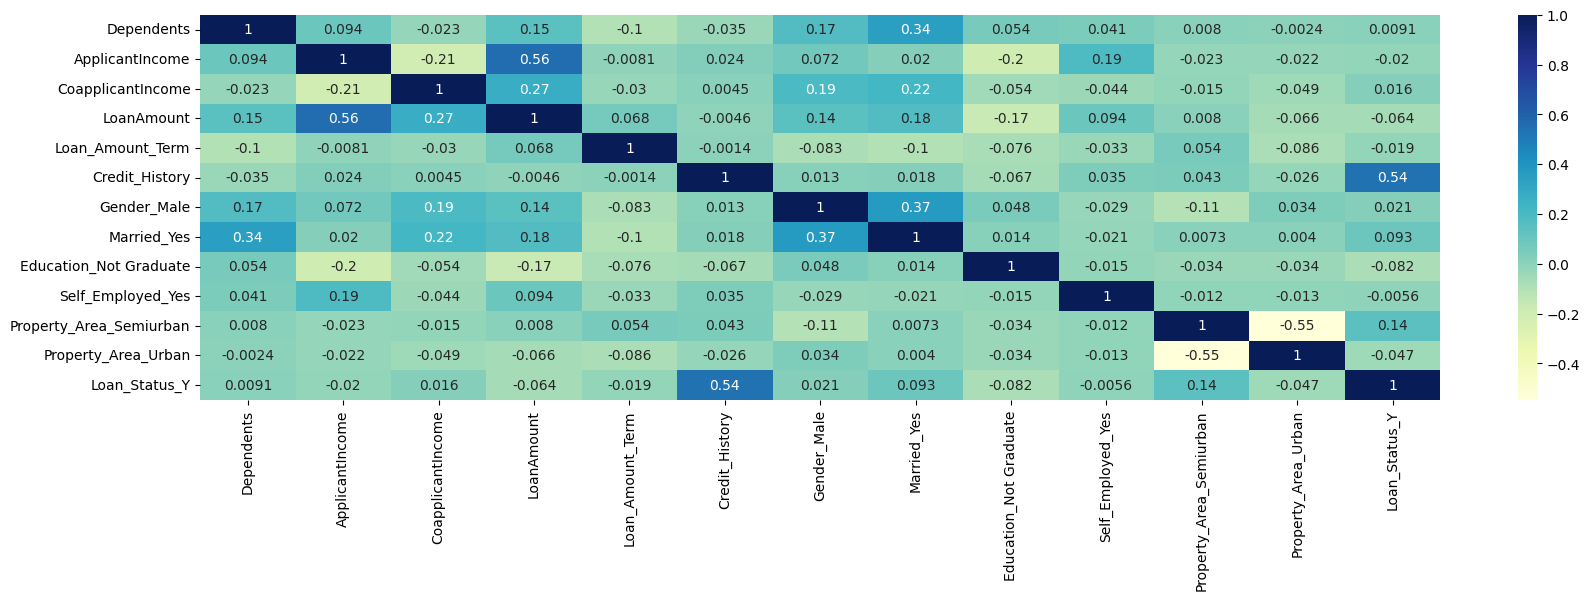

In [1257]:
plt.figure(figsize = (20,5))
colors = "YlGnBu"
sns.heatmap(df.corr(),cmap = colors,annot = True);

The above heatmap shows there is no strong linear correlation between the variables

# **Feature Selection: Mutual Information for Classification**

1.   Variance Threshold
2.   Pearson Correlation
3.   Information Gain - Mutual Information for classification: mutual_info_classif **Important**
4.   Information Gain - Mutual Information for regression
5.   Chi Square test


**Mutual Information:** Mutual Information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables independent, and higher values mean higher dependency.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.


Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.






In [1258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               598 non-null    float64
 1   ApplicantIncome          598 non-null    float64
 2   CoapplicantIncome        598 non-null    float64
 3   LoanAmount               598 non-null    float64
 4   Loan_Amount_Term         598 non-null    float64
 5   Credit_History           598 non-null    float64
 6   Gender_Male              598 non-null    int64  
 7   Married_Yes              598 non-null    int64  
 8   Education_Not Graduate   598 non-null    int64  
 9   Self_Employed_Yes        598 non-null    int64  
 10  Property_Area_Semiurban  598 non-null    int64  
 11  Property_Area_Urban      598 non-null    int64  
 12  Loan_Status_Y            598 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 60.9 KB


In [1259]:
# # Generate a sample dataset for demonstration purposes
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Apply SMOTEENN to balance the training data
# sm = SMOTEENN(random_state=42)
# X_oversampled, y_oversampled = sm.fit_resample(X_train, y_train)

In [1260]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mi = mutual_info_classif(X_train, y_train, random_state=0)
mi

array([0.        , 0.        , 0.01431979, 0.        , 0.0112608 ,
       0.12824161, 0.03702188, 0.0097696 , 0.01530279, 0.        ,
       0.02725666, 0.00391522])

In [1261]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

Credit_History             0.128242
Gender_Male                0.037022
Property_Area_Semiurban    0.027257
Education_Not Graduate     0.015303
CoapplicantIncome          0.014320
Loan_Amount_Term           0.011261
Married_Yes                0.009770
Property_Area_Urban        0.003915
Dependents                 0.000000
ApplicantIncome            0.000000
LoanAmount                 0.000000
Self_Employed_Yes          0.000000
dtype: float64

Plotting the ordered mutual info values per feature

<Axes: >

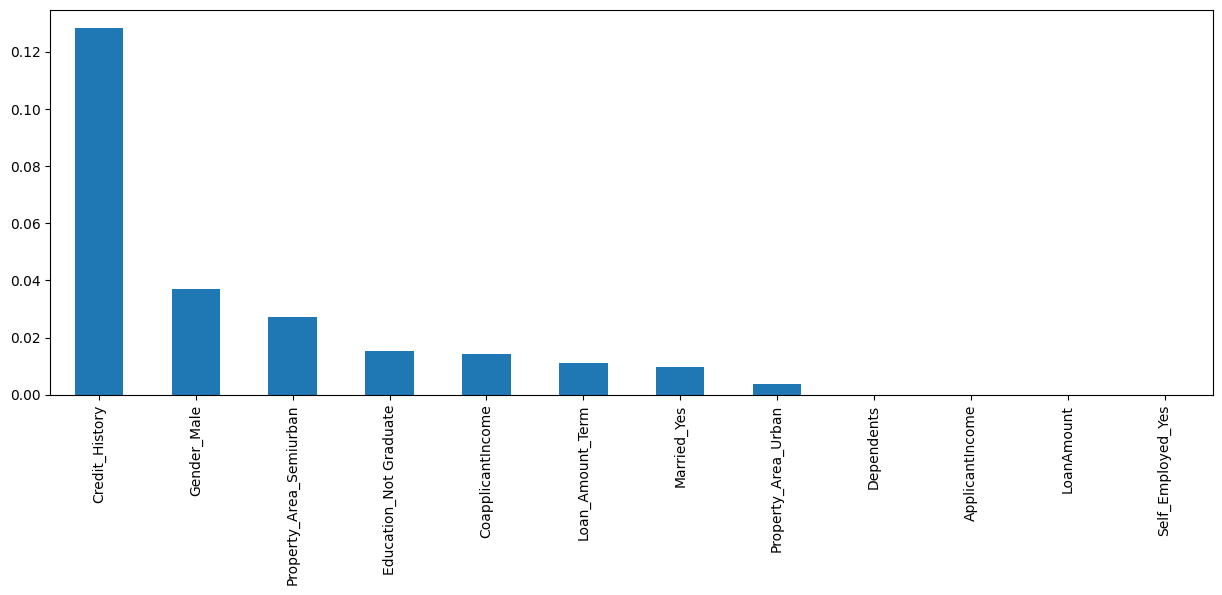

In [1262]:
mi.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [1263]:
X_train.drop(['Dependents','LoanAmount','Self_Employed_Yes','Property_Area_Semiurban'], axis = 1, inplace=True)
X_test.drop(['Dependents','LoanAmount','Self_Employed_Yes','Property_Area_Semiurban'], axis = 1, inplace=True)

In [1264]:
X_train.head()

ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
405         0.224207           0.349914              0.75             1.0   
250         0.601567           0.000000              0.75             0.0   
333         0.236646           0.000000              0.75             1.0   
224         0.247892           0.353528              0.75             1.0   
312         0.995149           0.000000              0.75             1.0   

     Gender_Male  Married_Yes  Education_Not Graduate  Property_Area_Urban  
405            1            1                       1                    0  
250            1            0                       1                    0  
333            0            0                       0                    0  
224            1            1                       0                    0  
312            1            1                       0                    0

In [1265]:
X_test.head()

ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
127         1.000000           0.000000             1.000             1.0   
48          0.398059           0.391566             0.750             1.0   
485         0.460256           0.491738             0.025             1.0   
407         0.298047           0.000000             0.750             1.0   
225         0.369797           0.000000             0.375             1.0   

     Gender_Male  Married_Yes  Education_Not Graduate  Property_Area_Urban  
127            1            0                       0                    1  
48             0            0                       0                    0  
485            1            1                       0                    1  
407            0            0                       0                    1  
225            1            1                       0                    0

# Balancing the dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
counts = df['Loan_Status_Y'].value_counts()
print("Count of '1':", counts[1])
print("Count of '0':", counts[0])

Count of '1': 360
Count of '0': 155


## Balancing the data: Oversampling

In [ ]:
sm = SMOTEENN()
x_oversampled, y_oversampled = sm.fit_resample(X_train, y_train)
print(len(x_oversampled), len(y_oversampled))

255 255


# **Decision Tree Classifier:**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_train)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
#R square
dtc.score(X_train,y_train)

1.0

In [ ]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(dtc,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(dtc,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.656764843578803
Validation Mean Accuracy:  0.7


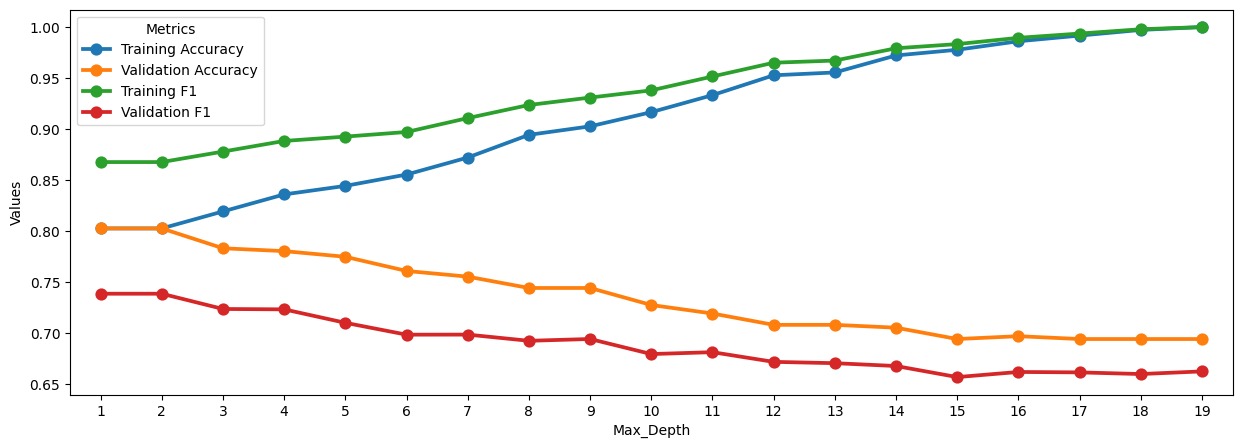

In [ ]:
from sklearn.model_selection import cross_validate

training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1, 20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train, y_training_pred)
    train_f1 = f1_score(y_train, y_training_pred)

    cv_results = cross_validate(tree_clf, X_train, y_train, cv=5, scoring=['accuracy', 'f1_macro'])
    val_mean_accuracy = cv_results['test_accuracy'].mean()
    val_mean_f1 = cv_results['test_f1_macro'].mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)

Tuning_Max_depth = {
    "Training Accuracy": training_accuracy,
    "Validation Accuracy": val_accuracy,
    "Training F1": training_f1,
    "Validation F1": val_f1,
    "Max_Depth": tree_depths
}
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth', var_name='Metrics', value_name="Values")
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Max_Depth", y="Values", hue="Metrics", data=plot_df, ax=ax)
plt.show()


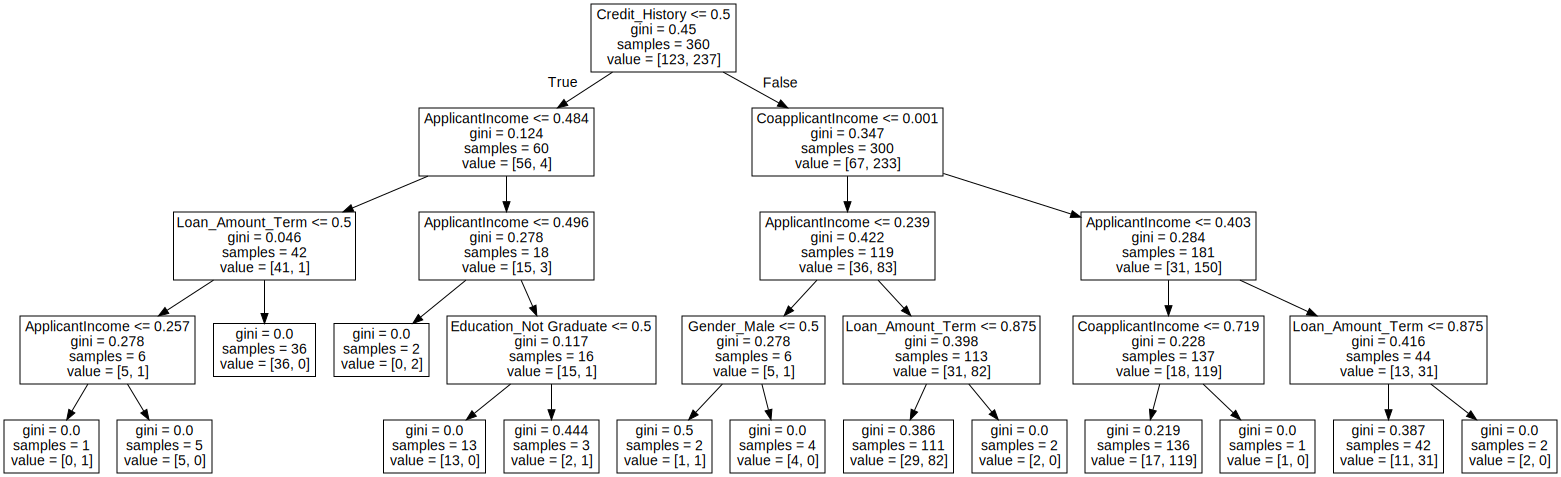

In [ ]:
import graphviz
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X_train.columns.tolist())
graph = graphviz.Source(dot_data)
graph

<Axes: xlabel='Min_Samples_leaf', ylabel='Values'>

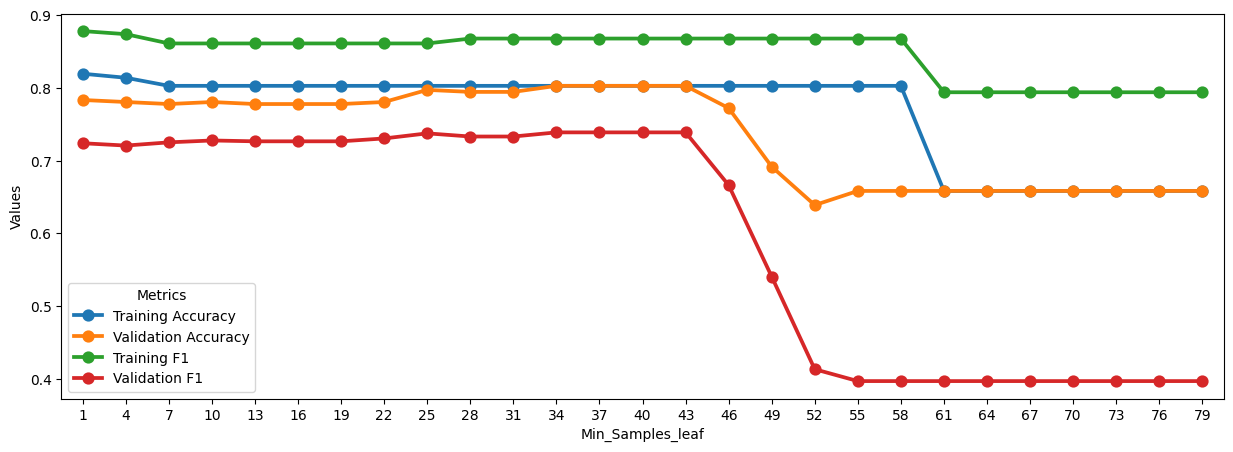

In [ ]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf
    dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    dtc.fit(X_train,y_train)
    y_training_pred = dtc.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(dtc,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(dtc,X_train,y_train,cv=5,scoring='accuracy').mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)


Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 43)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8709677419354839
Test F1 Score:  0.9236641221374046
Confusion Matrix on Test Data


Predicted   0    1  All
True                   
0          14   18   32
1           2  121  123
All        16  139  155

<ipython-input-479-88ae7eb12922>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot (df['Loan_Status_Y'], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-479-88ae7eb12922>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist= False, color = 'b', l

<Axes: xlabel='Loan_Status_Y', ylabel='Density'>

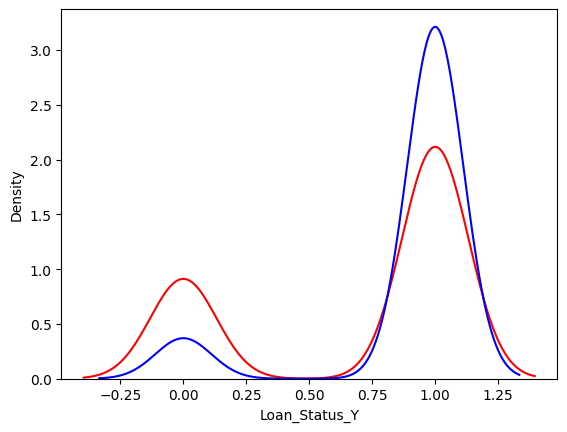

In [ ]:
ax1 = sns.distplot (df['Loan_Status_Y'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(y_pred, hist= False, color = 'b', label = 'Fitted values', ax = ax1)


Validation Score (Mean): 90.98%
ROC AUC Score: 99.59%




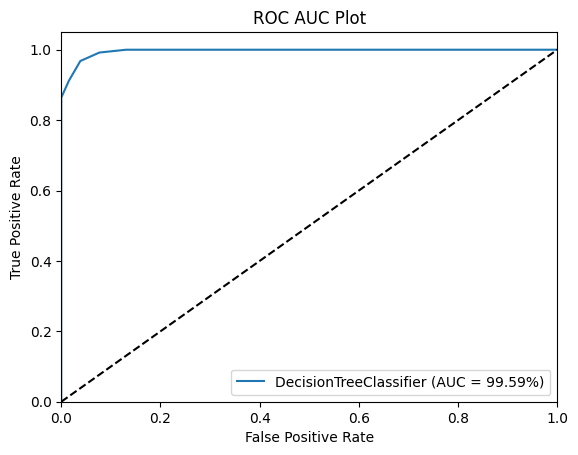





Model Score (Training Accuracy): 96.47%

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       130
           1       0.96      0.97      0.96       125

    accuracy                           0.96       255
   macro avg       0.96      0.96      0.96       255
weighted avg       0.96      0.96      0.96       255







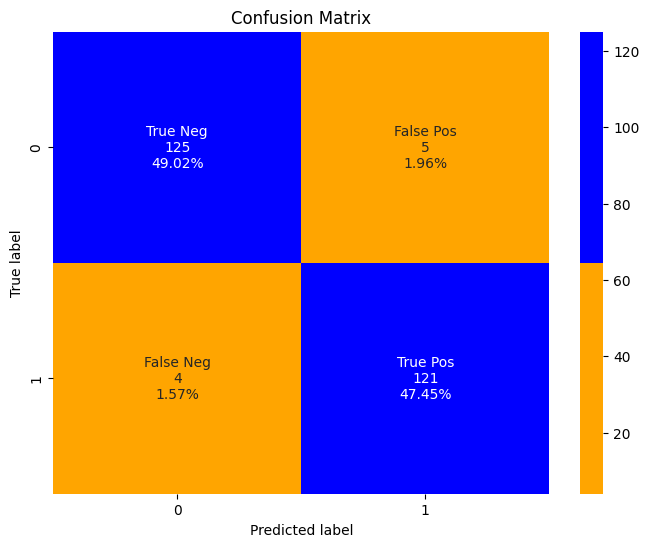

In [ ]:
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(x_oversampled, y_oversampled)

yr_predict = model_dt_smote.predict(x_oversampled)
model_score_r = model_dt_smote.score(x_oversampled, y_oversampled)

# Validation Score
validation_score = cross_val_score(model_dt_smote, x_oversampled, y_oversampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_oversampled, model_dt_smote.predict_proba(x_oversampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_oversampled, model_dt_smote.predict_proba(x_oversampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_r))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_oversampled, yr_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_oversampled, yr_predict)
tn, fp, fn, tp = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn, fp, fn, tp]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Balancing the data: Undersampling

In [ ]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=0)
x_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)
print(len(x_undersampled),len(y_undersampled))

246 246


Validation Score (Mean): 66.22%
ROC AUC Score: 86.13%




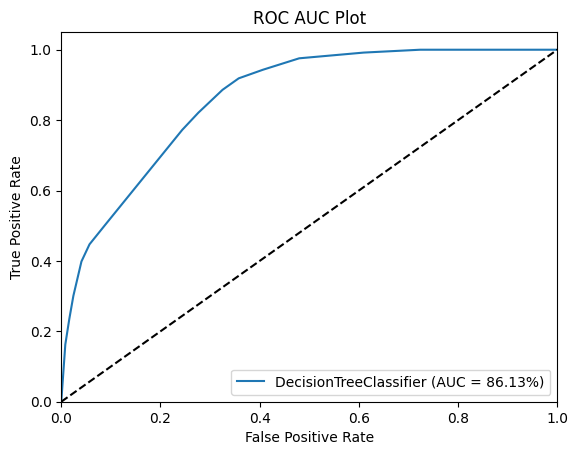





Model Score (Training Accuracy): 78.05%

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       123
           1       0.73      0.89      0.80       123

    accuracy                           0.78       246
   macro avg       0.79      0.78      0.78       246
weighted avg       0.79      0.78      0.78       246







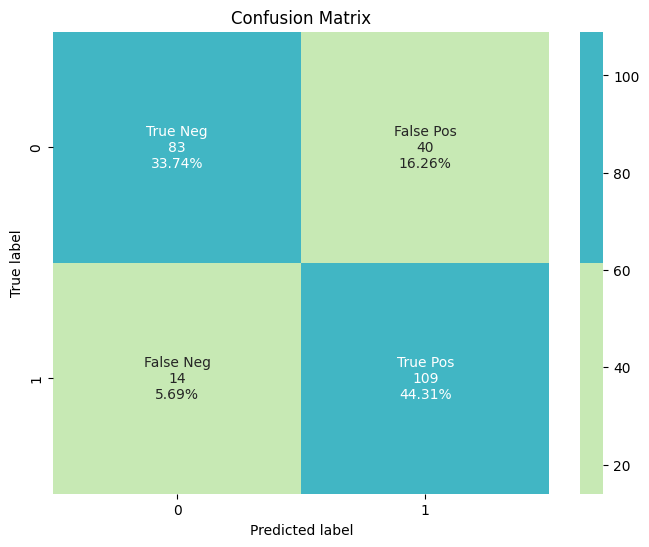

In [ ]:
model_dt_un = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=6, min_samples_leaf=8)
model_dt_un.fit(x_undersampled, y_undersampled)

yr_predict_un = model_dt_un.predict(x_undersampled)
model_score_un = model_dt_un.score(x_undersampled, y_undersampled)

# Validation Score
validation_score = cross_val_score(model_dt_un, x_undersampled, y_undersampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_undersampled, model_dt_un.predict_proba(x_undersampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_undersampled, model_dt_un.predict_proba(x_undersampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_un))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_undersampled, yr_predict_un))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_undersampled, yr_predict_un)
tn_un, fp_un, fn_un, tp_un = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_un, fp_un, fn_un, tp_un]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#C7E9B4", "#41B6C4"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Imbalanced

Validation Score (Mean): 74.72%
ROC AUC Score: 87.79%




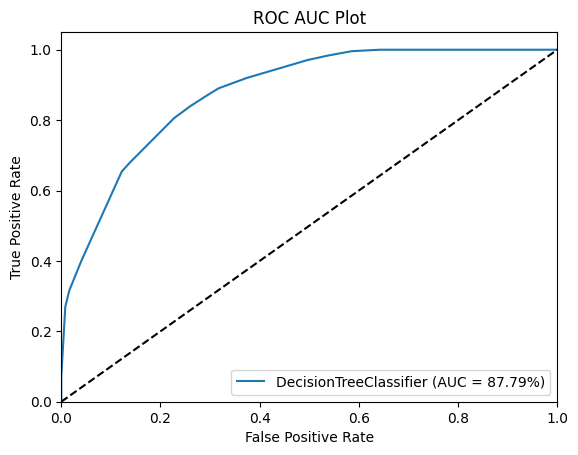





Model Score (Training Accuracy): 81.94%

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       123
           1       0.84      0.89      0.87       237

    accuracy                           0.82       360
   macro avg       0.80      0.79      0.79       360
weighted avg       0.82      0.82      0.82       360







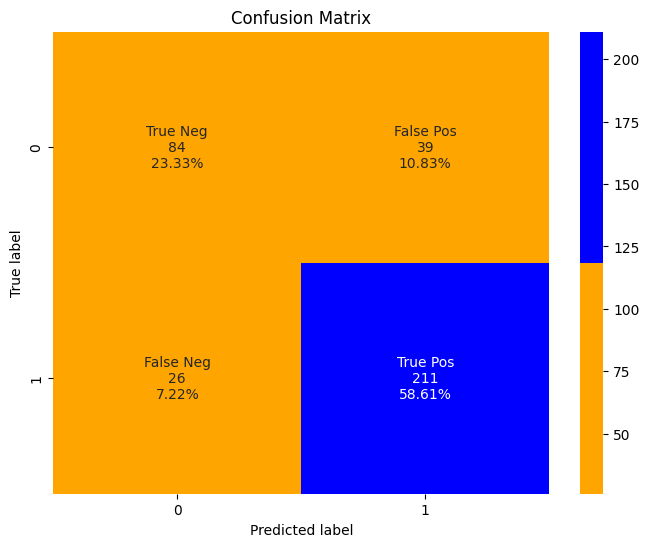

In [ ]:
model_dt_imb = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=6, min_samples_leaf=8)
model_dt_imb.fit(X_train, y_train)

yr_predict_imb = model_dt_imb.predict(X_train)
model_score_imb = model_dt_imb.score(X_train, y_train)

# Validation Score
validation_score = cross_val_score(model_dt_imb, X_train, y_train, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_train, model_dt_imb.predict_proba(X_train)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_train, model_dt_imb.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_imb))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_train, yr_predict_imb))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_train, yr_predict_imb)
tn_imb, fp_imb, fn_imb, tp_imb = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_imb, fp_imb, fn_imb, tp_imb]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Validation Score (Mean): 91.79%
ROC AUC Score: 99.34%




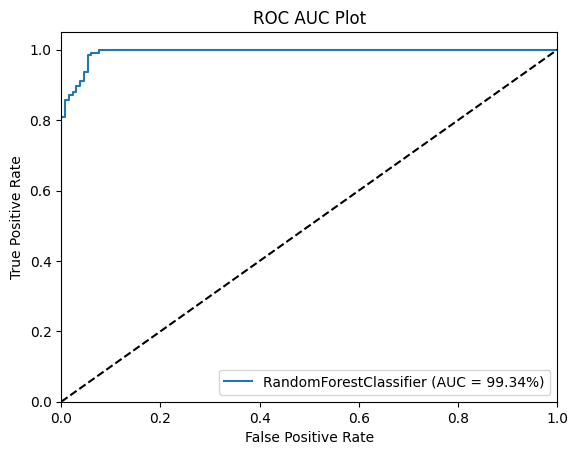





Model Score (Training Accuracy): 95.72%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       132
           1       0.92      1.00      0.96       125

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257







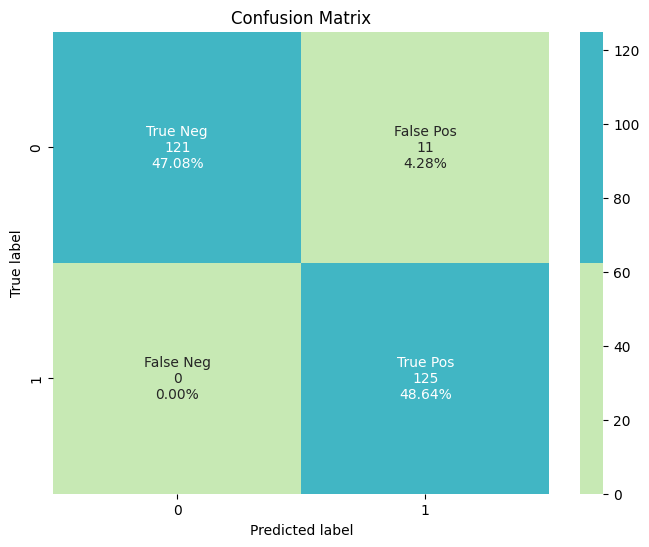

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 0, max_depth=4)
model_rf.fit(x_oversampled, y_oversampled)

rf_predict = model_rf.predict(x_oversampled)
model_score_rf = model_rf.score(x_oversampled, y_oversampled)

# Validation Score
validation_score = cross_val_score(model_rf, x_oversampled, y_oversampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_oversampled, model_rf.predict_proba(x_oversampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_oversampled, model_rf.predict_proba(x_oversampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_rf))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_oversampled, rf_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_oversampled, rf_predict)
tn_rfov, fp_rfov, fn_rfov, tp_rfov = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_rfov, fp_rfov, fn_rfov, tp_rfov ]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#C7E9B4", "#41B6C4"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Random forest calssifier with undersampling

Validation Score (Mean): 71.52%
ROC AUC Score: 98.46%


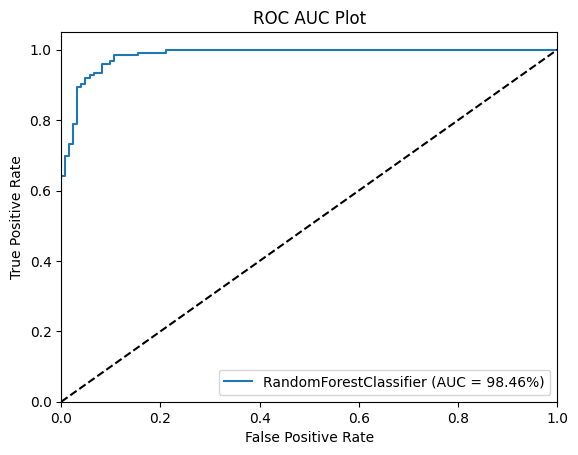

Model Score (Training Accuracy): 87.40%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       123
           1       0.80      1.00      0.89       123

    accuracy                           0.87       246
   macro avg       0.90      0.87      0.87       246
weighted avg       0.90      0.87      0.87       246



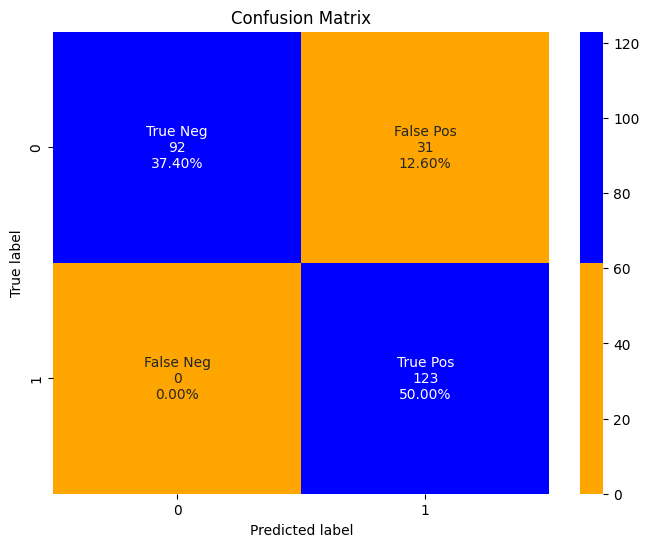

In [ ]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Train the RandomForestClassifier
classifier_rf_under = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0, max_depth=6)
classifier_rf_under.fit(x_undersampled, y_undersampled)

# Predictions
rfu_predict = classifier_rf_under.predict(x_undersampled)
model_score_r = classifier_rf_under.score(x_undersampled, y_undersampled)

# Validation Score
validation_score = cross_val_score(classifier_rf_under, x_undersampled, y_undersampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))

# ROC AUC Score
roc_auc = roc_auc_score(y_undersampled, classifier_rf_under.predict_proba(x_undersampled)[:, 1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_undersampled, classifier_rf_under.predict_proba(x_undersampled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

# Model Score (Training Accuracy)
print("Model Score (Training Accuracy): {:.2%}".format(model_score_r))

# Classification Report
print("Classification Report:")
print(classification_report(y_undersampled, rfu_predict))

# Confusion Matrix
conf_matrix = confusion_matrix(y_undersampled, rfu_predict)
tn_rfun, fp_rfun, fn_rfun, tp_rfun = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = [tn_rfun, fp_rfun, fn_rfun, tp_rfun]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Random Forest classifier with Imbalancing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Check the type and initial content of x and y
print(f"x type: {type(x)}")
print(f"y type: {type(y)}")

# Check if x and y are properly initialized
print(f"x: {x}")
print(f"y: {y}")

# Ensure x and y are in the correct shape
try:
    x = np.array(x)  # Convert to numpy array if not already
    y = np.array(y)  # Convert to numpy array if not already
except Exception as e:
    print(f"Error converting x and y to numpy arrays: {e}")
    raise

# Print the shapes of x and y
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

# Check if x and y are not empty
if x.size == 0 or y.size == 0:
    raise ValueError("x or y is empty. Please ensure they are populated with data.")

# If x is 1D, reshape it to 2D
if x.ndim == 1:
    x = x.reshape(-1, 1)

# Check the first few elements of x and y
print(f"First few elements of x:\n{x[:5]}")
print(f"First few elements of y:\n{y[:5]}")

# Train the RandomForestClassifier
classifier_rf_imb = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
classifier_rf_imb.fit(x, y)

# Predictions
imb_predict = classifier_rf_imb.predict(x)
model_score_r = classifier_rf_imb.score(x, y)

# Validation Score
validation_score = cross_val_score(classifier_rf_imb, x, y, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))

# ROC AUC Score
roc_auc = roc_auc_score(y, classifier_rf_imb.predict_proba(x)[:, 1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y, classifier_rf_imb.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

# Model Score (Training Accuracy)
print("Model Score (Training Accuracy): {:.2%}".format(model_score_r))

# Classification Report
print("Classification Report:")
print(classification_report(y, imb_predict))

# Confusion Matrix
conf_matrix = confusion_matrix(y, imb_predict)
tn_rfim, fp_rfim, fn_rfim, tp_rfim = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = [tn_rfim, fp_rfim, fn_rfim, tp_rfim]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

x type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
x: 0.0
y: -30
x shape: ()
y shape: ()


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

XG Boost classifier

In [ ]:
from xgboost import XGBClassifier

XG Boost Classifier with oversampling

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification

# Generate a sample dataset for demonstration purposes
x, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Apply SMOTEENN
sm = SMOTEENN(random_state=42)
x_oversampled, y_oversampled = sm.fit_resample(x_train, y_train)

# Print the lengths of the oversampled datasets
print(f"Number of samples in x_oversampled: {len(x_oversampled)}")
print(f"Number of samples in y_oversampled: {len(y_oversampled)}")

Number of samples in x_oversampled: 479
Number of samples in y_oversampled: 479


Validation Score (Mean): 98.74%
ROC AUC Score: 100.00%




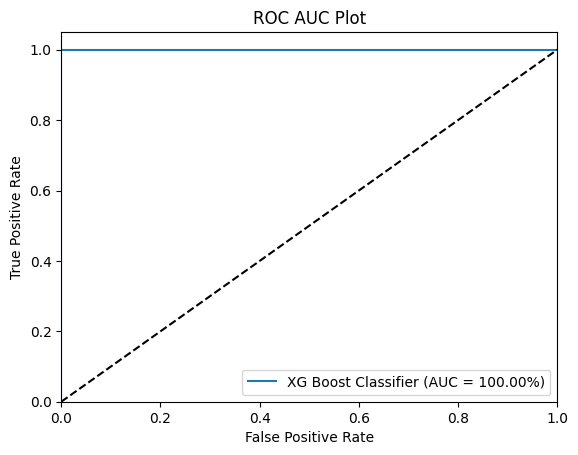





Model Score (Training Accuracy): 99.79%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       244

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479







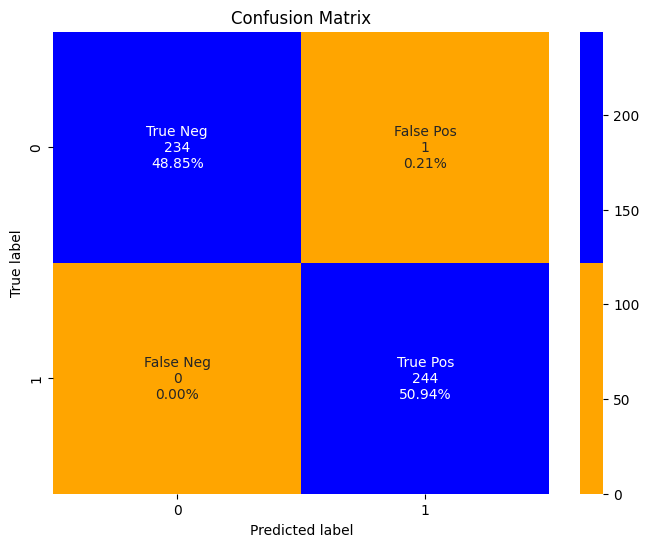

In [ ]:

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
#model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
classifier_xgb.fit(x_oversampled, y_oversampled)

xgo_predict = classifier_xgb.predict(x_oversampled)
model_score_xg = classifier_xgb.score(x_oversampled, y_oversampled)

# Validation Score
validation_score = cross_val_score(classifier_xgb, x_oversampled, y_oversampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_oversampled, classifier_xgb.predict_proba(x_oversampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_oversampled, classifier_xgb.predict_proba(x_oversampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost Classifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_xg))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_oversampled, xgo_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_oversampled, xgo_predict)
tn_xgov, fp_xgov, fn_xgov, tp_xgov = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_xgov, fp_xgov, fn_xgov, tp_xgov]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

XG Boost classifier with undersampling

Validation Score (Mean): 71.93%
ROC AUC Score: 97.71%




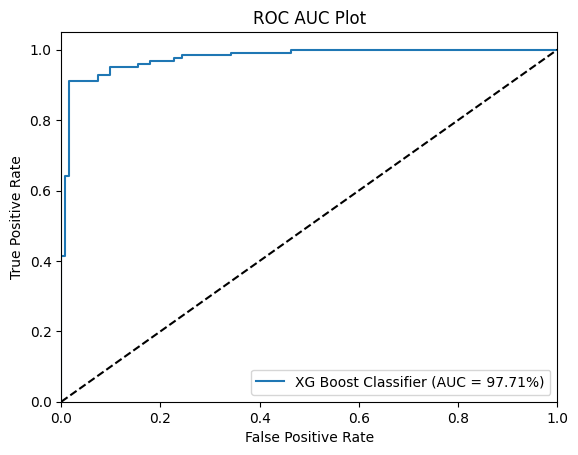





Model Score (Training Accuracy): 91.06%

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       123
           1       0.88      0.95      0.91       123

    accuracy                           0.91       246
   macro avg       0.91      0.91      0.91       246
weighted avg       0.91      0.91      0.91       246







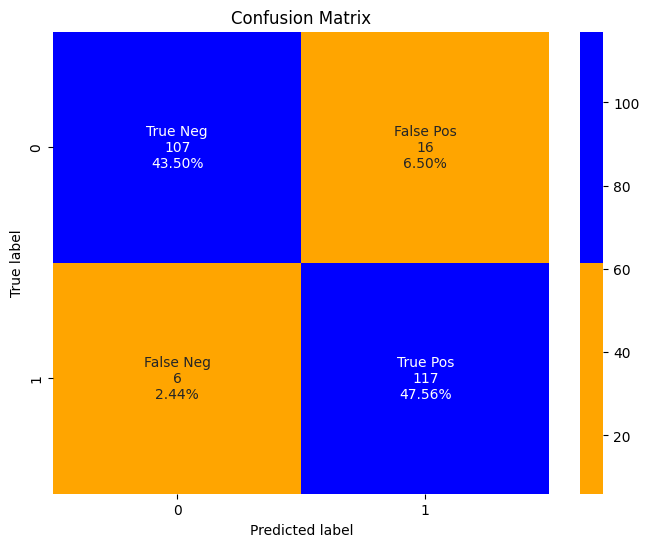

In [ ]:
classifier_xgb_under = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
#model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
classifier_xgb_under.fit(x_undersampled, y_undersampled)

xgo_predict_under = classifier_xgb_under.predict(x_undersampled)
model_score_xg_under = classifier_xgb_under.score(x_undersampled, y_undersampled)

# Validation Score
validation_score = cross_val_score(classifier_xgb_under, x_undersampled, y_undersampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_undersampled, classifier_xgb_under.predict_proba(x_undersampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_undersampled, classifier_xgb_under.predict_proba(x_undersampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost Classifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_xg_under))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_undersampled, xgo_predict_under))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_undersampled, xgo_predict_under)
tn_xgun, fp_xgun, fn_xgun, tp_xgun = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_xgun, fp_xgun, fn_xgun, tp_xgun]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

XG Boost Clasifier with Imbalanced Data:

Validation Score (Mean): 91.80%
ROC AUC Score: 99.75%




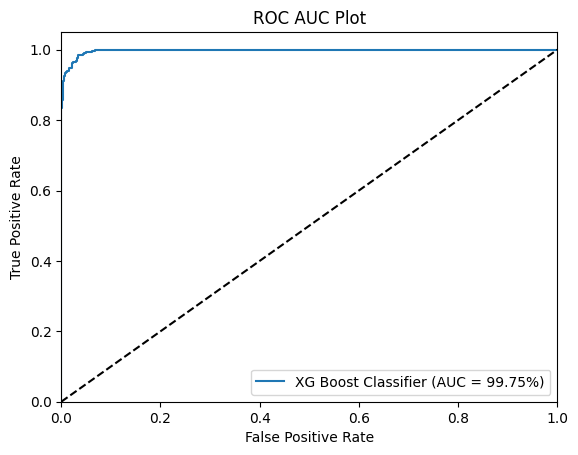





Model Score (Training Accuracy): 96.70%

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       505
           1       0.98      0.96      0.97       495

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000







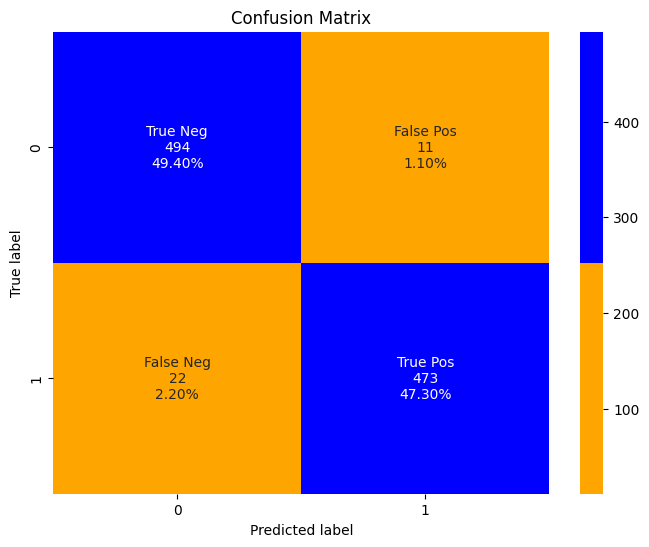

In [ ]:
classifier_xgb_imb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
#model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
classifier_xgb_imb.fit(x, y)

xgo_predict_imb = classifier_xgb_imb.predict(x)
model_score_xg_imb = classifier_xgb_imb.score(x, y)

# Validation Score
validation_score = cross_val_score(classifier_xgb_imb, x, y, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))


# ROC AUC Score
roc_auc = roc_auc_score(y, classifier_xgb_imb.predict_proba(x)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y, classifier_xgb_imb.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost Classifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_xg_imb))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y, xgo_predict_imb))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y, xgo_predict_imb)
tn_xgim, fp_xgim, fn_xgim, tp_xgim = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_xgim, fp_xgim, fn_xgim, tp_xgim]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **Measures for Reducing Customer Churn & Revenue Increase**

*   3 types of customers should be targeted : SeniorCitizen, Living with a Partner, living all alone!
*   The number of SeniorCitizen customers are low but their lowerlimit of MonthlyCharges is higher than the other customers. Thus, SeniorCitizen customers are ready to pay top dollar but they need to catered with that level of service. For customers with a Partner as well as customers living alone, they prefer services with MonthlyCharges below 65.
*   Inorder to create a strong foundation of customers, Telco Company needs to create an easy and affordable entry point for their services. For the tenure of 1st 6 months, it needs to focus extensively on OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as this period is the most critical and uncertain for the customers. They must lower the churn tenure of 40 - 50 months for these services!.
*   Once they build a solid pipeline of support services for customers, they need to push the usage of MultipleLines & Fiber Optic cables for the PhoneService & InternetService respectively. But the major hurdle for these 2 services is the starting point of 75+ in MonthlyCharges.
*   Thus, they need to create combinations of options provided for PhoneService & InternetService where average of these MonthlyCharges will be in the range of 100 - 120 :
    *   No MultipleLines + OpticFiber
    *    MultipleLines + DSL
     

*   This will increase the mean income from a user as it completely drops the option of choosing a combination of No MultipleLines + DSL whose mean MonthlyCharges is probably 60 - 70!
*   StreamingTV and StreamingMovies need to be made affordable as well as reducing it's churn tenure. The content of these services should be targeting all types of customers. This needs to followed up with an easy and hassle free PaymentMethod.
*   It needs to put an end to the Electronic check for payment purposes due to it's high churn and focus entirely on Bank Transfer (automatic) & Credit Card (automatic)! However, they will be challenged to reduce the median churn tenure of above 20 months for these 2 PaymentMethod which is double the churn tenure of Electronic check.
*   Lower limit of Electronic check is around 60 whereas that of Bank Transfer (automatic) & Credit Card (automatic) is around 20 in MonthlyCharges. PaperlessBilling is another expensive feature with a starting point of 60 whereas the other options are cheap starting at 20 in MonthlyCharges.
* Once the MonthlyCharges for any single service hits the 70 mark, customers become very conscious about their MonthlyCharges. Quality of service needs to be the USP of the Telco Company! These measures will push the revenue as well as improve the current value delivery process!

# **Conclusion**

* This is a great dataset that gives an opportunity to peak into the real world business problem and can be dealt with the Data Science techniues.
* Insights gained from the EDA are very valuable for understanding the effectiveness of the existing systems that are in place. They also assist in drawing up plans & measures to counter the problems or be in an infinite loop fo improvement.
* SMOTE analysis is used for data balancing. Combinations of undersampling and oversampling can be employed as well. Undersampling was tried out for this problem but it landed the F1 Score (Churn) in the range of 60 - 70 %. There are other data balancing methods available as well.
* When it comes to model performance, feature creation by combining features was carried out however, they did not outperform the current models. Hyperparamter tuning & outlier detection could also bump up the F1 Score (Churn) & Cross Validation Score. Stack of models pipped the XGBClassifier & LGBMClassifier by a margin of 0.01 for F1 Score (Churn).


Validation Score (Mean): 98.54%
ROC AUC Score: 99.96%


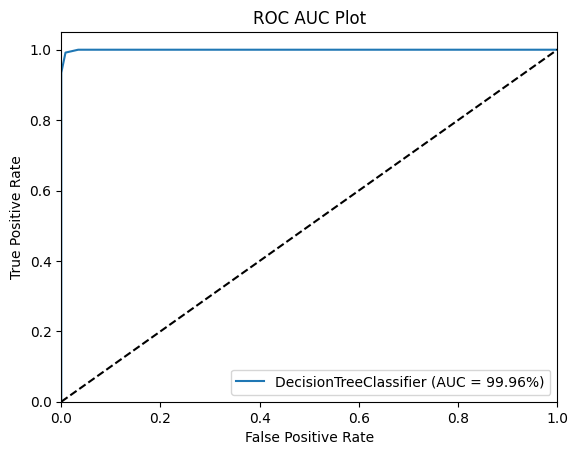

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 2000x1500 with 0 Axes>

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

# Define and fit the model
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(x_oversampled, y_oversampled)

# Predictions and model evaluation
yr_predict = model_dt_smote.predict(x_oversampled)
model_score_r = model_dt_smote.score(x_oversampled, y_oversampled)

# Validation Score
validation_score = cross_val_score(model_dt_smote, x_oversampled, y_oversampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))

# ROC AUC Score
roc_auc = roc_auc_score(y_oversampled, model_dt_smote.predict_proba(x_oversampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_oversampled, model_dt_smote.predict_proba(x_oversampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(model_dt_smote, filled=True, feature_names=x_oversampled.columns, class_names=['Not sell', 'Sell'], fontsize=10)
plt.show()

# Model Score (Training Accuracy)
print("\nModel Score (Training Accuracy): {:.2%}".format(model_score_r))

# Classification Report
print("\nClassification Report:")
print(metrics.classification_report(y_oversampled, yr_predict))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_oversampled, yr_predict)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Validation Score (Mean): 68.69%
ROC AUC Score: 88.65%


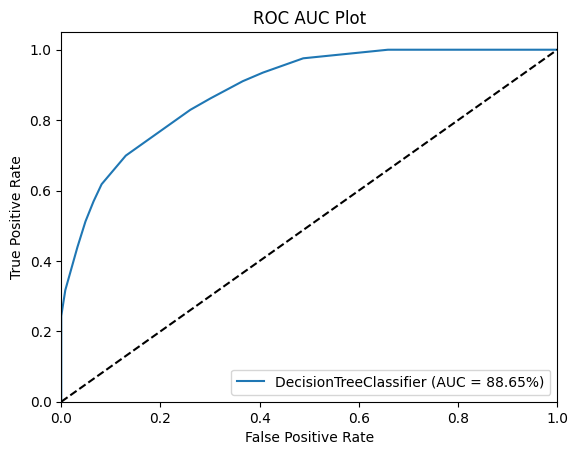

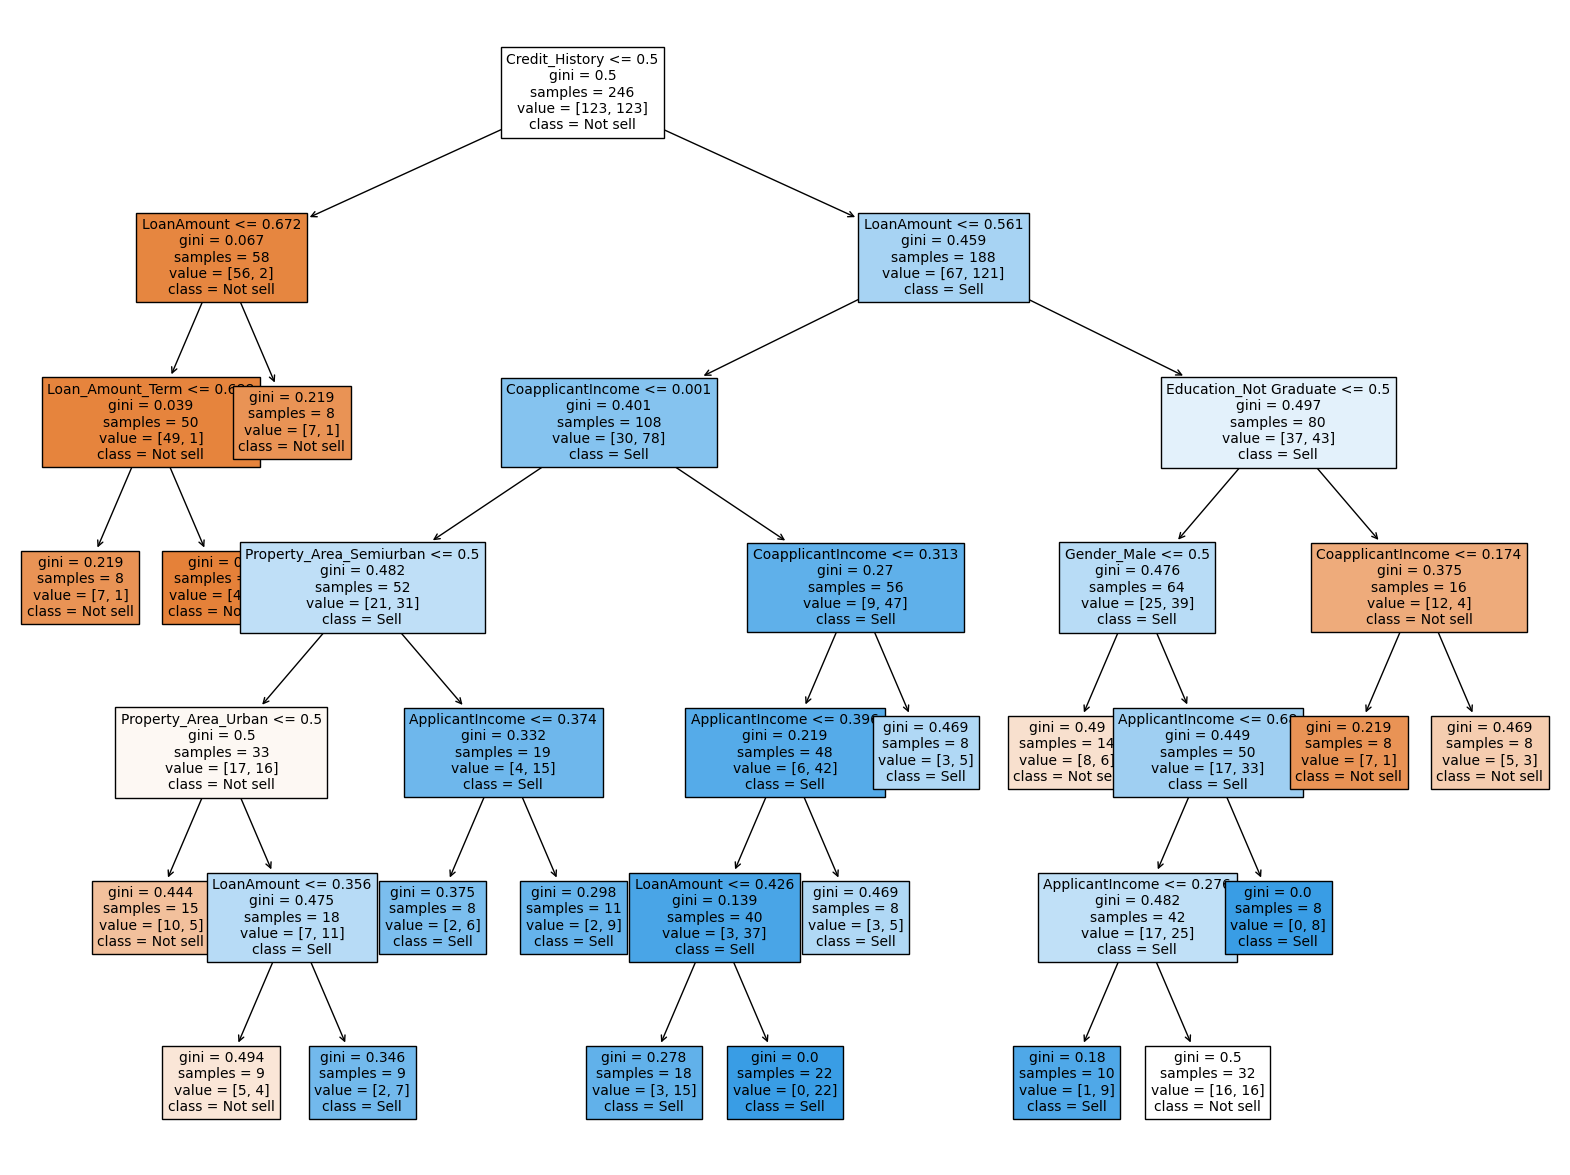


Model Score (Training Accuracy): 78.46%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       123
           1       0.84      0.70      0.76       123

    accuracy                           0.78       246
   macro avg       0.79      0.78      0.78       246
weighted avg       0.79      0.78      0.78       246



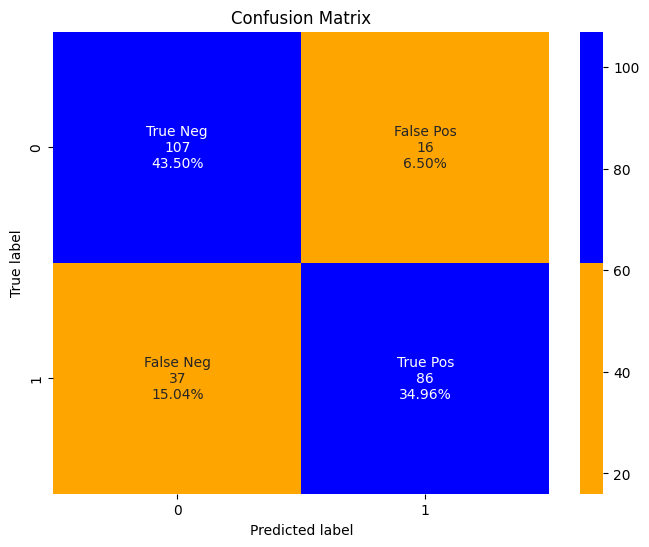

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

# Define and fit the model
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(x_undersampled, y_undersampled)

# Predictions and model evaluation
yr_predict_un = model_dt_smote.predict(x_undersampled)
model_score_r_un = model_dt_smote.score(x_undersampled, y_undersampled)

# Validation Score
validation_score = cross_val_score(model_dt_smote, x_undersampled, y_undersampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))

# ROC AUC Score
roc_auc = roc_auc_score(y_undersampled, model_dt_smote.predict_proba(x_undersampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_undersampled, model_dt_smote.predict_proba(x_undersampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(model_dt_smote, filled=True, feature_names=x_undersampled.columns, class_names=['Not sell', 'Sell'], fontsize=10)
plt.show()

# Model Score (Training Accuracy)
print("\nModel Score (Training Accuracy): {:.2%}".format(model_score_r_un))

# Classification Report
print("\nClassification Report:")
print(metrics.classification_report(y_undersampled, yr_predict_un))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_undersampled, yr_predict_un)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
